# Generative Adversarial Network

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torchvision.transforms as transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable

In [3]:
import torch.nn as nn
import torch.nn.functional as F
import torch

## Set Arguments

In [4]:
num_workers = 0
n_epochs = 200
batch_size = 64
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
n_cpu = 8
latent_dim = 100
img_size = 28
channels = 1
sample_interval = 400

In [5]:
img_shape = (channels, img_size, img_size)

In [6]:
cuda = True if torch.cuda.is_available() else False

## Configure Data Loader

In [7]:
os.makedirs("images/gan/", exist_ok=True)

In [8]:
data_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data',
                   train = True,
                   download = True,
                   transform=transforms.Compose(
                       [transforms.Resize(img_size), transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]),
                   ),
                   batch_size = batch_size,
                   shuffle = True,
)

In [9]:
print('Total batches:',len(data_loader))

Total batches: 938


## Build GAN Architecture

<img src='images/gan-architecture.png' width='75%'/>

## Generator

In [10]:
class Generator(nn.Module):
    
    def __init__(self):
        super(Generator, self).__init__()
        
        def block(in_features, out_features, normalize=True):
            layers = [nn.Linear(in_features, out_features)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_features, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))

            return layers
        
        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh(),
        )
        
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0),*img_shape)
        
        return img

## Discriminator

In [11]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
        
    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        
        return validity

#### Initialize the generator and discriminator

In [12]:
generator = Generator()
discriminator = Discriminator()

if cuda:
    generator.cuda()
    discriminator.cuda()

## Loss Function

In [13]:
adversarial_loss = nn.BCELoss()
if cuda: adversarial_loss.cuda()

## Optimizers

In [14]:
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))

In [15]:
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

## Training the [Network](https://arxiv.org/pdf/1406.2661.pdf)

In [16]:
def imshow(imgs, nrows=5):
    fig = plt.figure(figsize=(20,20))
    for idx in np.arange(25):
        ax = fig.add_subplot(5, 25/nrows, idx+1, xticks=[], yticks=[])
        plt.imshow(imgs[idx, :, :, 0], cmap='gray') # convert from Tensor image
    
    plt.savefig('./images/gan/final_images.png')
    plt.show()

In [17]:
n_epochs = 10 # theoretically should be high

[Epoch 0/10] [Batch 0/938] [Generator loss: 0.704539] [Discriminator loss: 0.708244]


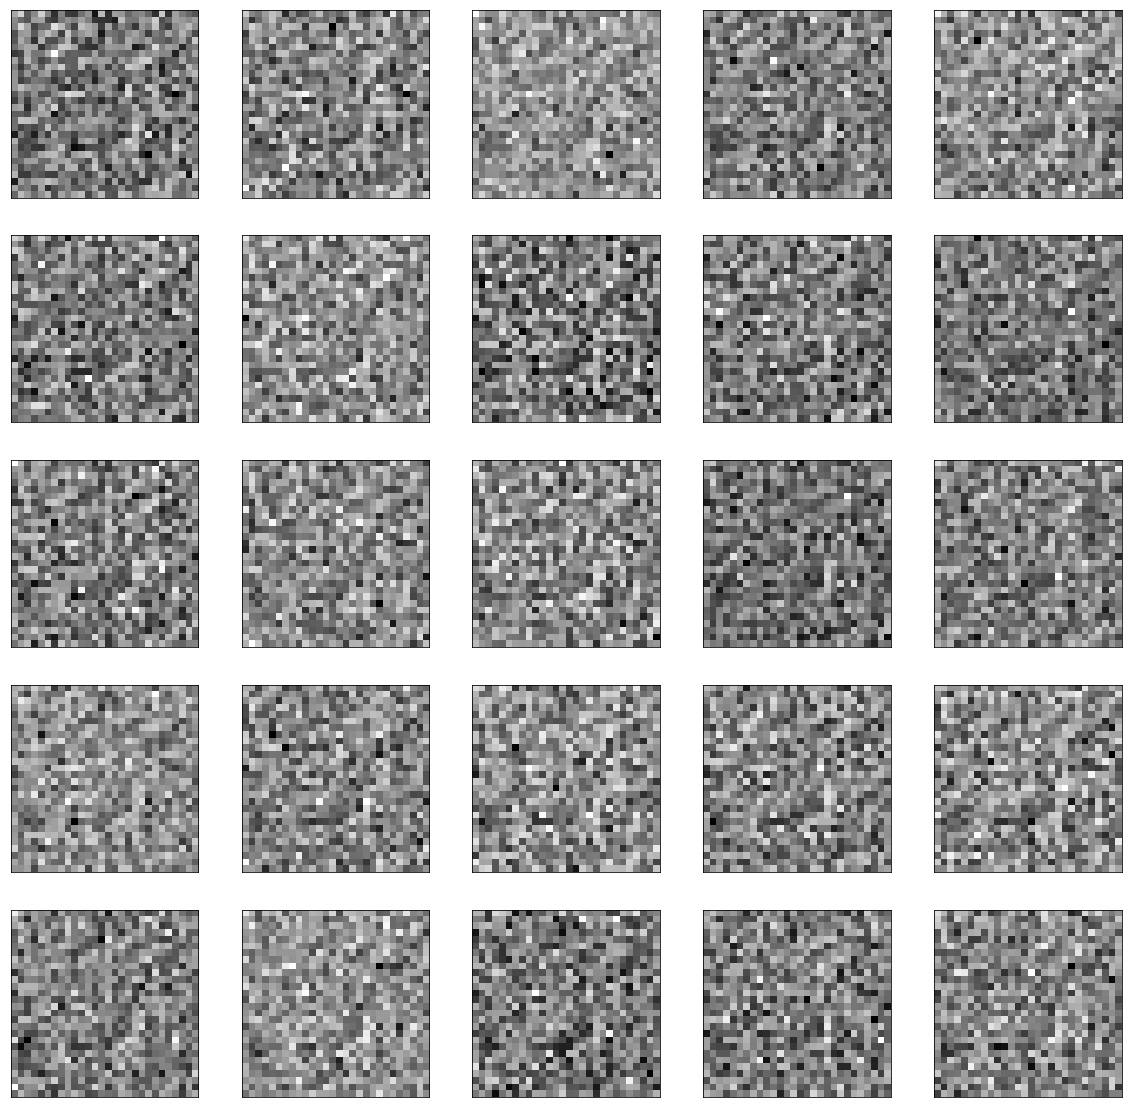

[Epoch 0/10] [Batch 1/938] [Generator loss: 0.701298] [Discriminator loss: 0.630391]
[Epoch 0/10] [Batch 2/938] [Generator loss: 0.698652] [Discriminator loss: 0.562887]
[Epoch 0/10] [Batch 3/938] [Generator loss: 0.695422] [Discriminator loss: 0.506453]
[Epoch 0/10] [Batch 4/938] [Generator loss: 0.691859] [Discriminator loss: 0.462375]
[Epoch 0/10] [Batch 5/938] [Generator loss: 0.687274] [Discriminator loss: 0.429410]
[Epoch 0/10] [Batch 6/938] [Generator loss: 0.681493] [Discriminator loss: 0.410144]
[Epoch 0/10] [Batch 7/938] [Generator loss: 0.675114] [Discriminator loss: 0.393162]
[Epoch 0/10] [Batch 8/938] [Generator loss: 0.664869] [Discriminator loss: 0.388895]
[Epoch 0/10] [Batch 9/938] [Generator loss: 0.655855] [Discriminator loss: 0.386554]
[Epoch 0/10] [Batch 10/938] [Generator loss: 0.646272] [Discriminator loss: 0.386356]
[Epoch 0/10] [Batch 11/938] [Generator loss: 0.632704] [Discriminator loss: 0.392265]
[Epoch 0/10] [Batch 12/938] [Generator loss: 0.621736] [Discrim

[Epoch 0/10] [Batch 109/938] [Generator loss: 0.971984] [Discriminator loss: 0.427985]
[Epoch 0/10] [Batch 110/938] [Generator loss: 0.870433] [Discriminator loss: 0.448033]
[Epoch 0/10] [Batch 111/938] [Generator loss: 0.926324] [Discriminator loss: 0.423465]
[Epoch 0/10] [Batch 112/938] [Generator loss: 1.015723] [Discriminator loss: 0.429754]
[Epoch 0/10] [Batch 113/938] [Generator loss: 0.856551] [Discriminator loss: 0.514805]
[Epoch 0/10] [Batch 114/938] [Generator loss: 0.789967] [Discriminator loss: 0.497023]
[Epoch 0/10] [Batch 115/938] [Generator loss: 0.919479] [Discriminator loss: 0.481756]
[Epoch 0/10] [Batch 116/938] [Generator loss: 0.854493] [Discriminator loss: 0.526611]
[Epoch 0/10] [Batch 117/938] [Generator loss: 0.708120] [Discriminator loss: 0.532018]
[Epoch 0/10] [Batch 118/938] [Generator loss: 0.874990] [Discriminator loss: 0.564927]
[Epoch 0/10] [Batch 119/938] [Generator loss: 0.678204] [Discriminator loss: 0.608502]
[Epoch 0/10] [Batch 120/938] [Generator los

[Epoch 0/10] [Batch 213/938] [Generator loss: 0.748351] [Discriminator loss: 0.525909]
[Epoch 0/10] [Batch 214/938] [Generator loss: 0.842237] [Discriminator loss: 0.544224]
[Epoch 0/10] [Batch 215/938] [Generator loss: 0.722536] [Discriminator loss: 0.552474]
[Epoch 0/10] [Batch 216/938] [Generator loss: 0.872621] [Discriminator loss: 0.585438]
[Epoch 0/10] [Batch 217/938] [Generator loss: 0.508572] [Discriminator loss: 0.649613]
[Epoch 0/10] [Batch 218/938] [Generator loss: 0.954631] [Discriminator loss: 0.632804]
[Epoch 0/10] [Batch 219/938] [Generator loss: 0.457184] [Discriminator loss: 0.690227]
[Epoch 0/10] [Batch 220/938] [Generator loss: 0.866767] [Discriminator loss: 0.602134]
[Epoch 0/10] [Batch 221/938] [Generator loss: 0.665509] [Discriminator loss: 0.594312]
[Epoch 0/10] [Batch 222/938] [Generator loss: 0.766002] [Discriminator loss: 0.575086]
[Epoch 0/10] [Batch 223/938] [Generator loss: 0.795673] [Discriminator loss: 0.548066]
[Epoch 0/10] [Batch 224/938] [Generator los

[Epoch 0/10] [Batch 309/938] [Generator loss: 0.806346] [Discriminator loss: 0.436747]
[Epoch 0/10] [Batch 310/938] [Generator loss: 0.910350] [Discriminator loss: 0.421455]
[Epoch 0/10] [Batch 311/938] [Generator loss: 0.970482] [Discriminator loss: 0.445125]
[Epoch 0/10] [Batch 312/938] [Generator loss: 0.682632] [Discriminator loss: 0.496859]
[Epoch 0/10] [Batch 313/938] [Generator loss: 1.168288] [Discriminator loss: 0.558009]
[Epoch 0/10] [Batch 314/938] [Generator loss: 0.464331] [Discriminator loss: 0.657279]
[Epoch 0/10] [Batch 315/938] [Generator loss: 1.078209] [Discriminator loss: 0.548683]
[Epoch 0/10] [Batch 316/938] [Generator loss: 0.633676] [Discriminator loss: 0.570387]
[Epoch 0/10] [Batch 317/938] [Generator loss: 0.822959] [Discriminator loss: 0.541473]
[Epoch 0/10] [Batch 318/938] [Generator loss: 0.685792] [Discriminator loss: 0.570239]
[Epoch 0/10] [Batch 319/938] [Generator loss: 0.729252] [Discriminator loss: 0.550977]
[Epoch 0/10] [Batch 320/938] [Generator los

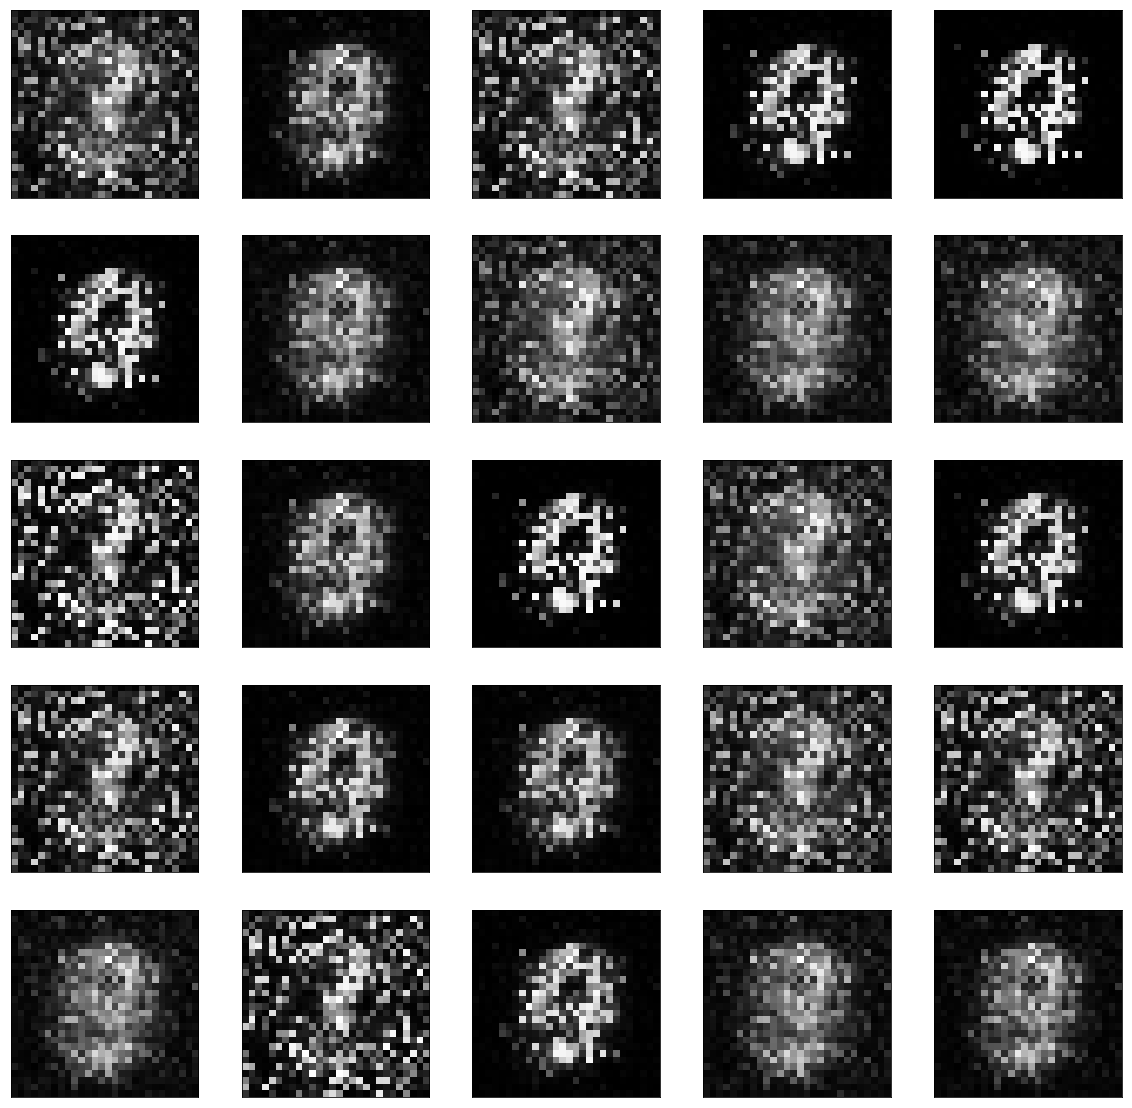

[Epoch 0/10] [Batch 401/938] [Generator loss: 0.530648] [Discriminator loss: 0.568387]
[Epoch 0/10] [Batch 402/938] [Generator loss: 1.380281] [Discriminator loss: 0.577182]
[Epoch 0/10] [Batch 403/938] [Generator loss: 0.446402] [Discriminator loss: 0.604034]
[Epoch 0/10] [Batch 404/938] [Generator loss: 1.337367] [Discriminator loss: 0.507867]
[Epoch 0/10] [Batch 405/938] [Generator loss: 0.751456] [Discriminator loss: 0.494782]
[Epoch 0/10] [Batch 406/938] [Generator loss: 0.935626] [Discriminator loss: 0.466807]
[Epoch 0/10] [Batch 407/938] [Generator loss: 1.090792] [Discriminator loss: 0.443587]
[Epoch 0/10] [Batch 408/938] [Generator loss: 0.826207] [Discriminator loss: 0.494147]
[Epoch 0/10] [Batch 409/938] [Generator loss: 0.932036] [Discriminator loss: 0.452407]
[Epoch 0/10] [Batch 410/938] [Generator loss: 1.032595] [Discriminator loss: 0.467127]
[Epoch 0/10] [Batch 411/938] [Generator loss: 0.738116] [Discriminator loss: 0.528539]
[Epoch 0/10] [Batch 412/938] [Generator los

[Epoch 0/10] [Batch 503/938] [Generator loss: 1.296197] [Discriminator loss: 0.406749]
[Epoch 0/10] [Batch 504/938] [Generator loss: 0.896272] [Discriminator loss: 0.429000]
[Epoch 0/10] [Batch 505/938] [Generator loss: 1.228661] [Discriminator loss: 0.386711]
[Epoch 0/10] [Batch 506/938] [Generator loss: 0.941651] [Discriminator loss: 0.399748]
[Epoch 0/10] [Batch 507/938] [Generator loss: 1.369841] [Discriminator loss: 0.394877]
[Epoch 0/10] [Batch 508/938] [Generator loss: 0.694930] [Discriminator loss: 0.469224]
[Epoch 0/10] [Batch 509/938] [Generator loss: 1.694653] [Discriminator loss: 0.445559]
[Epoch 0/10] [Batch 510/938] [Generator loss: 0.501392] [Discriminator loss: 0.542650]
[Epoch 0/10] [Batch 511/938] [Generator loss: 1.983115] [Discriminator loss: 0.478809]
[Epoch 0/10] [Batch 512/938] [Generator loss: 0.582985] [Discriminator loss: 0.478620]
[Epoch 0/10] [Batch 513/938] [Generator loss: 1.549580] [Discriminator loss: 0.400247]
[Epoch 0/10] [Batch 514/938] [Generator los

[Epoch 0/10] [Batch 610/938] [Generator loss: 1.018972] [Discriminator loss: 0.497374]
[Epoch 0/10] [Batch 611/938] [Generator loss: 0.812100] [Discriminator loss: 0.520086]
[Epoch 0/10] [Batch 612/938] [Generator loss: 0.926227] [Discriminator loss: 0.503174]
[Epoch 0/10] [Batch 613/938] [Generator loss: 0.903183] [Discriminator loss: 0.544305]
[Epoch 0/10] [Batch 614/938] [Generator loss: 0.677532] [Discriminator loss: 0.524421]
[Epoch 0/10] [Batch 615/938] [Generator loss: 1.611294] [Discriminator loss: 0.545058]
[Epoch 0/10] [Batch 616/938] [Generator loss: 0.314551] [Discriminator loss: 0.742646]
[Epoch 0/10] [Batch 617/938] [Generator loss: 2.149058] [Discriminator loss: 0.694916]
[Epoch 0/10] [Batch 618/938] [Generator loss: 0.408962] [Discriminator loss: 0.666040]
[Epoch 0/10] [Batch 619/938] [Generator loss: 1.210135] [Discriminator loss: 0.450435]
[Epoch 0/10] [Batch 620/938] [Generator loss: 1.219815] [Discriminator loss: 0.404224]
[Epoch 0/10] [Batch 621/938] [Generator los

[Epoch 0/10] [Batch 715/938] [Generator loss: 1.888758] [Discriminator loss: 0.448624]
[Epoch 0/10] [Batch 716/938] [Generator loss: 0.877968] [Discriminator loss: 0.397845]
[Epoch 0/10] [Batch 717/938] [Generator loss: 1.338299] [Discriminator loss: 0.321732]
[Epoch 0/10] [Batch 718/938] [Generator loss: 1.456779] [Discriminator loss: 0.334433]
[Epoch 0/10] [Batch 719/938] [Generator loss: 1.032565] [Discriminator loss: 0.391269]
[Epoch 0/10] [Batch 720/938] [Generator loss: 1.325756] [Discriminator loss: 0.372021]
[Epoch 0/10] [Batch 721/938] [Generator loss: 1.115723] [Discriminator loss: 0.386128]
[Epoch 0/10] [Batch 722/938] [Generator loss: 1.254938] [Discriminator loss: 0.348494]
[Epoch 0/10] [Batch 723/938] [Generator loss: 1.266315] [Discriminator loss: 0.334030]
[Epoch 0/10] [Batch 724/938] [Generator loss: 1.317724] [Discriminator loss: 0.386150]
[Epoch 0/10] [Batch 725/938] [Generator loss: 0.852595] [Discriminator loss: 0.414397]
[Epoch 0/10] [Batch 726/938] [Generator los

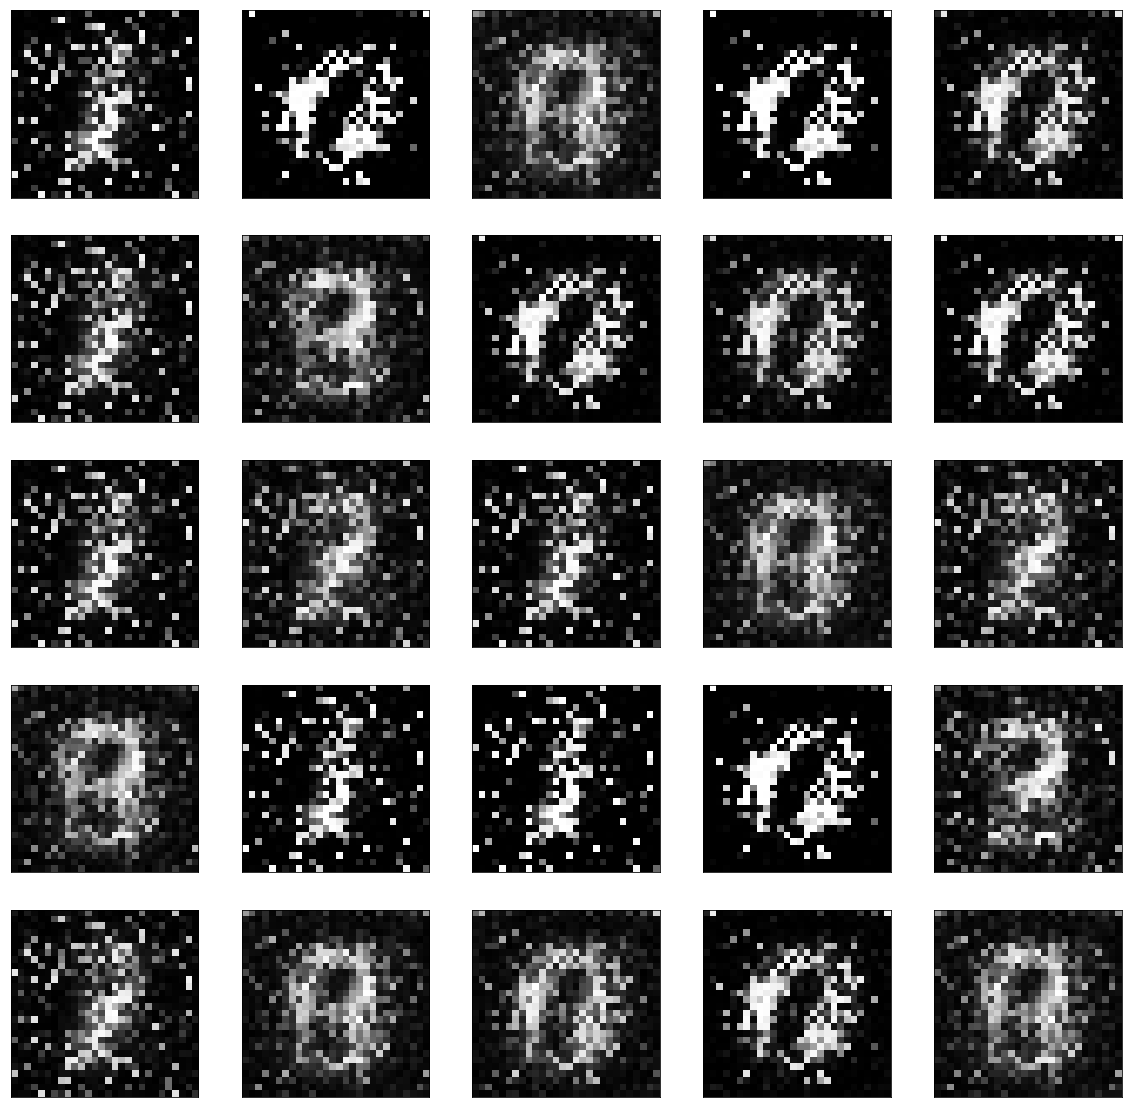

[Epoch 0/10] [Batch 801/938] [Generator loss: 1.575186] [Discriminator loss: 0.378150]
[Epoch 0/10] [Batch 802/938] [Generator loss: 0.772327] [Discriminator loss: 0.431004]
[Epoch 0/10] [Batch 803/938] [Generator loss: 1.886841] [Discriminator loss: 0.485386]
[Epoch 0/10] [Batch 804/938] [Generator loss: 0.354280] [Discriminator loss: 0.673878]
[Epoch 0/10] [Batch 805/938] [Generator loss: 2.560787] [Discriminator loss: 0.533622]
[Epoch 0/10] [Batch 806/938] [Generator loss: 0.491189] [Discriminator loss: 0.555799]
[Epoch 0/10] [Batch 807/938] [Generator loss: 1.710959] [Discriminator loss: 0.355229]
[Epoch 0/10] [Batch 808/938] [Generator loss: 1.073418] [Discriminator loss: 0.349869]
[Epoch 0/10] [Batch 809/938] [Generator loss: 1.234249] [Discriminator loss: 0.365590]
[Epoch 0/10] [Batch 810/938] [Generator loss: 1.087203] [Discriminator loss: 0.371781]
[Epoch 0/10] [Batch 811/938] [Generator loss: 1.408785] [Discriminator loss: 0.428465]
[Epoch 0/10] [Batch 812/938] [Generator los

[Epoch 0/10] [Batch 898/938] [Generator loss: 1.158486] [Discriminator loss: 0.338663]
[Epoch 0/10] [Batch 899/938] [Generator loss: 1.608682] [Discriminator loss: 0.389698]
[Epoch 0/10] [Batch 900/938] [Generator loss: 0.635750] [Discriminator loss: 0.484231]
[Epoch 0/10] [Batch 901/938] [Generator loss: 2.934778] [Discriminator loss: 0.485000]
[Epoch 0/10] [Batch 902/938] [Generator loss: 0.528856] [Discriminator loss: 0.533546]
[Epoch 0/10] [Batch 903/938] [Generator loss: 2.466434] [Discriminator loss: 0.343121]
[Epoch 0/10] [Batch 904/938] [Generator loss: 1.007270] [Discriminator loss: 0.294700]
[Epoch 0/10] [Batch 905/938] [Generator loss: 1.873926] [Discriminator loss: 0.253515]
[Epoch 0/10] [Batch 906/938] [Generator loss: 1.277665] [Discriminator loss: 0.324549]
[Epoch 0/10] [Batch 907/938] [Generator loss: 1.084975] [Discriminator loss: 0.355064]
[Epoch 0/10] [Batch 908/938] [Generator loss: 1.636454] [Discriminator loss: 0.371247]
[Epoch 0/10] [Batch 909/938] [Generator los

[Epoch 1/10] [Batch 55/938] [Generator loss: 0.230322] [Discriminator loss: 0.843777]
[Epoch 1/10] [Batch 56/938] [Generator loss: 2.255604] [Discriminator loss: 0.591843]
[Epoch 1/10] [Batch 57/938] [Generator loss: 0.549194] [Discriminator loss: 0.544383]
[Epoch 1/10] [Batch 58/938] [Generator loss: 1.333657] [Discriminator loss: 0.400800]
[Epoch 1/10] [Batch 59/938] [Generator loss: 1.155028] [Discriminator loss: 0.419015]
[Epoch 1/10] [Batch 60/938] [Generator loss: 0.845112] [Discriminator loss: 0.448358]
[Epoch 1/10] [Batch 61/938] [Generator loss: 1.320680] [Discriminator loss: 0.450052]
[Epoch 1/10] [Batch 62/938] [Generator loss: 0.684218] [Discriminator loss: 0.519276]
[Epoch 1/10] [Batch 63/938] [Generator loss: 1.302140] [Discriminator loss: 0.474500]
[Epoch 1/10] [Batch 64/938] [Generator loss: 0.649801] [Discriminator loss: 0.493603]
[Epoch 1/10] [Batch 65/938] [Generator loss: 1.671118] [Discriminator loss: 0.514528]
[Epoch 1/10] [Batch 66/938] [Generator loss: 0.567590]

[Epoch 1/10] [Batch 151/938] [Generator loss: 0.774903] [Discriminator loss: 0.468912]
[Epoch 1/10] [Batch 152/938] [Generator loss: 1.360725] [Discriminator loss: 0.356726]
[Epoch 1/10] [Batch 153/938] [Generator loss: 1.163658] [Discriminator loss: 0.401661]
[Epoch 1/10] [Batch 154/938] [Generator loss: 0.887379] [Discriminator loss: 0.434039]
[Epoch 1/10] [Batch 155/938] [Generator loss: 1.247627] [Discriminator loss: 0.437383]
[Epoch 1/10] [Batch 156/938] [Generator loss: 0.863407] [Discriminator loss: 0.444547]
[Epoch 1/10] [Batch 157/938] [Generator loss: 1.345841] [Discriminator loss: 0.451562]
[Epoch 1/10] [Batch 158/938] [Generator loss: 0.732578] [Discriminator loss: 0.446464]
[Epoch 1/10] [Batch 159/938] [Generator loss: 1.657978] [Discriminator loss: 0.410824]
[Epoch 1/10] [Batch 160/938] [Generator loss: 0.799877] [Discriminator loss: 0.391154]
[Epoch 1/10] [Batch 161/938] [Generator loss: 1.534881] [Discriminator loss: 0.359853]
[Epoch 1/10] [Batch 162/938] [Generator los

[Epoch 1/10] [Batch 250/938] [Generator loss: 1.305419] [Discriminator loss: 0.422326]
[Epoch 1/10] [Batch 251/938] [Generator loss: 0.783886] [Discriminator loss: 0.482790]
[Epoch 1/10] [Batch 252/938] [Generator loss: 1.353602] [Discriminator loss: 0.458280]
[Epoch 1/10] [Batch 253/938] [Generator loss: 0.692994] [Discriminator loss: 0.502426]
[Epoch 1/10] [Batch 254/938] [Generator loss: 1.689954] [Discriminator loss: 0.512955]
[Epoch 1/10] [Batch 255/938] [Generator loss: 0.477576] [Discriminator loss: 0.585557]
[Epoch 1/10] [Batch 256/938] [Generator loss: 1.724625] [Discriminator loss: 0.537555]
[Epoch 1/10] [Batch 257/938] [Generator loss: 0.608169] [Discriminator loss: 0.482423]
[Epoch 1/10] [Batch 258/938] [Generator loss: 1.700204] [Discriminator loss: 0.410635]
[Epoch 1/10] [Batch 259/938] [Generator loss: 0.908995] [Discriminator loss: 0.406217]
[Epoch 1/10] [Batch 260/938] [Generator loss: 1.065781] [Discriminator loss: 0.422120]
[Epoch 1/10] [Batch 261/938] [Generator los

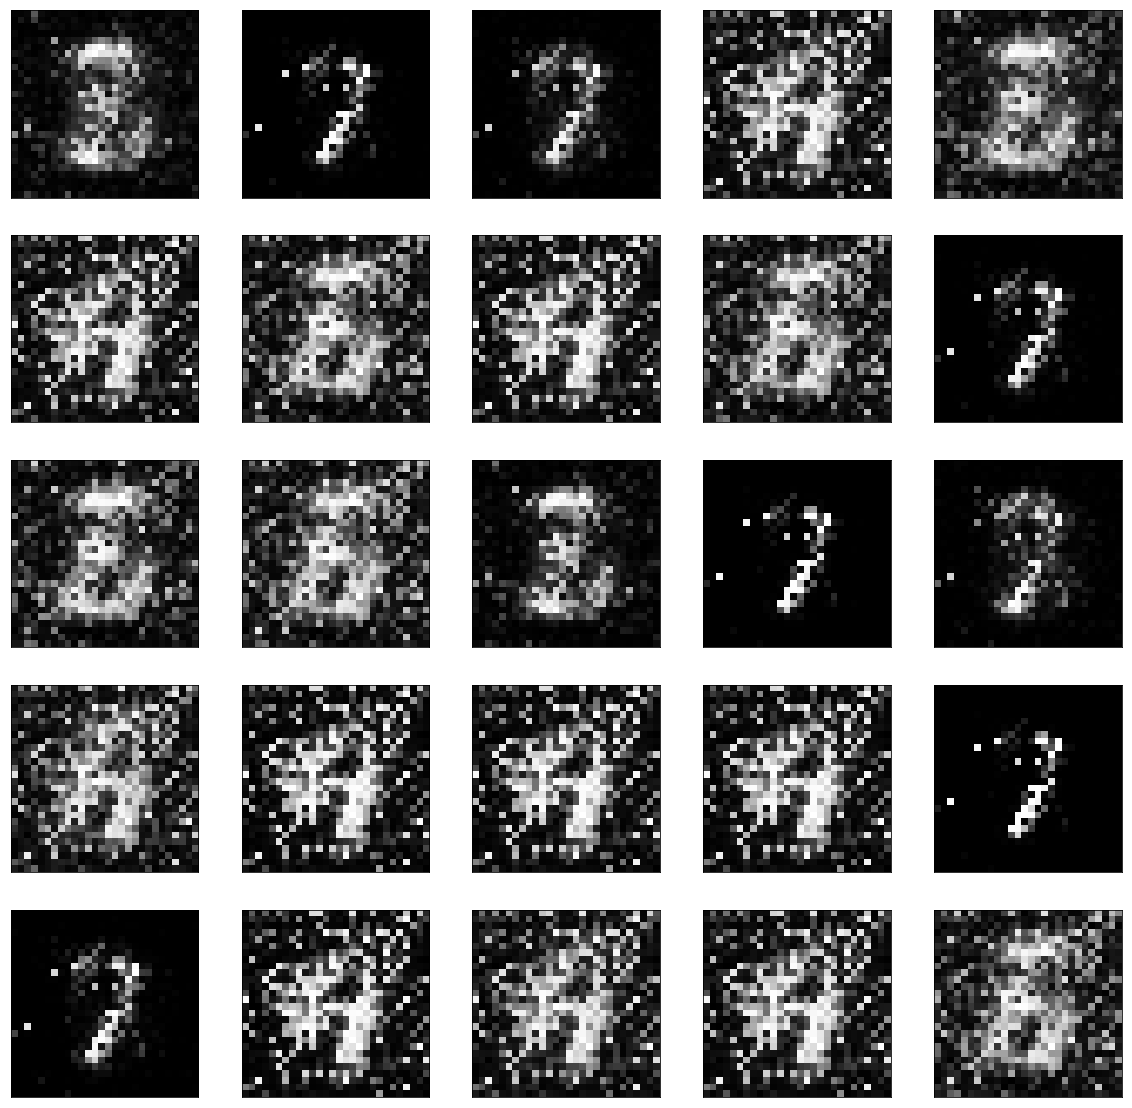

[Epoch 1/10] [Batch 263/938] [Generator loss: 1.291862] [Discriminator loss: 0.368555]
[Epoch 1/10] [Batch 264/938] [Generator loss: 0.946369] [Discriminator loss: 0.435951]
[Epoch 1/10] [Batch 265/938] [Generator loss: 1.047301] [Discriminator loss: 0.435431]
[Epoch 1/10] [Batch 266/938] [Generator loss: 1.087723] [Discriminator loss: 0.403484]
[Epoch 1/10] [Batch 267/938] [Generator loss: 1.129536] [Discriminator loss: 0.421838]
[Epoch 1/10] [Batch 268/938] [Generator loss: 0.879653] [Discriminator loss: 0.451578]
[Epoch 1/10] [Batch 269/938] [Generator loss: 1.430090] [Discriminator loss: 0.449103]
[Epoch 1/10] [Batch 270/938] [Generator loss: 0.737889] [Discriminator loss: 0.440764]
[Epoch 1/10] [Batch 271/938] [Generator loss: 1.728619] [Discriminator loss: 0.402418]
[Epoch 1/10] [Batch 272/938] [Generator loss: 0.697593] [Discriminator loss: 0.460150]
[Epoch 1/10] [Batch 273/938] [Generator loss: 1.822081] [Discriminator loss: 0.424702]
[Epoch 1/10] [Batch 274/938] [Generator los

[Epoch 1/10] [Batch 364/938] [Generator loss: 0.573428] [Discriminator loss: 0.560792]
[Epoch 1/10] [Batch 365/938] [Generator loss: 1.411271] [Discriminator loss: 0.492925]
[Epoch 1/10] [Batch 366/938] [Generator loss: 0.769135] [Discriminator loss: 0.469778]
[Epoch 1/10] [Batch 367/938] [Generator loss: 1.310750] [Discriminator loss: 0.475992]
[Epoch 1/10] [Batch 368/938] [Generator loss: 0.673484] [Discriminator loss: 0.523021]
[Epoch 1/10] [Batch 369/938] [Generator loss: 1.485846] [Discriminator loss: 0.532815]
[Epoch 1/10] [Batch 370/938] [Generator loss: 0.528294] [Discriminator loss: 0.582748]
[Epoch 1/10] [Batch 371/938] [Generator loss: 1.668463] [Discriminator loss: 0.631090]
[Epoch 1/10] [Batch 372/938] [Generator loss: 0.395725] [Discriminator loss: 0.664551]
[Epoch 1/10] [Batch 373/938] [Generator loss: 1.699593] [Discriminator loss: 0.593086]
[Epoch 1/10] [Batch 374/938] [Generator loss: 0.688014] [Discriminator loss: 0.494222]
[Epoch 1/10] [Batch 375/938] [Generator los

[Epoch 1/10] [Batch 467/938] [Generator loss: 0.423565] [Discriminator loss: 0.619955]
[Epoch 1/10] [Batch 468/938] [Generator loss: 2.204930] [Discriminator loss: 0.437455]
[Epoch 1/10] [Batch 469/938] [Generator loss: 0.893538] [Discriminator loss: 0.372257]
[Epoch 1/10] [Batch 470/938] [Generator loss: 1.357865] [Discriminator loss: 0.330540]
[Epoch 1/10] [Batch 471/938] [Generator loss: 1.320099] [Discriminator loss: 0.326592]
[Epoch 1/10] [Batch 472/938] [Generator loss: 1.345821] [Discriminator loss: 0.355650]
[Epoch 1/10] [Batch 473/938] [Generator loss: 0.940883] [Discriminator loss: 0.458420]
[Epoch 1/10] [Batch 474/938] [Generator loss: 1.250146] [Discriminator loss: 0.380660]
[Epoch 1/10] [Batch 475/938] [Generator loss: 1.158590] [Discriminator loss: 0.424938]
[Epoch 1/10] [Batch 476/938] [Generator loss: 0.839970] [Discriminator loss: 0.480084]
[Epoch 1/10] [Batch 477/938] [Generator loss: 1.580739] [Discriminator loss: 0.421031]
[Epoch 1/10] [Batch 478/938] [Generator los

[Epoch 1/10] [Batch 571/938] [Generator loss: 0.868375] [Discriminator loss: 0.341787]
[Epoch 1/10] [Batch 572/938] [Generator loss: 1.601858] [Discriminator loss: 0.272710]
[Epoch 1/10] [Batch 573/938] [Generator loss: 1.798635] [Discriminator loss: 0.236209]
[Epoch 1/10] [Batch 574/938] [Generator loss: 1.230582] [Discriminator loss: 0.322987]
[Epoch 1/10] [Batch 575/938] [Generator loss: 1.322467] [Discriminator loss: 0.327546]
[Epoch 1/10] [Batch 576/938] [Generator loss: 1.293890] [Discriminator loss: 0.333876]
[Epoch 1/10] [Batch 577/938] [Generator loss: 1.157221] [Discriminator loss: 0.337107]
[Epoch 1/10] [Batch 578/938] [Generator loss: 1.450498] [Discriminator loss: 0.420560]
[Epoch 1/10] [Batch 579/938] [Generator loss: 0.490092] [Discriminator loss: 0.616301]
[Epoch 1/10] [Batch 580/938] [Generator loss: 2.954429] [Discriminator loss: 0.736889]
[Epoch 1/10] [Batch 581/938] [Generator loss: 0.200487] [Discriminator loss: 0.979163]
[Epoch 1/10] [Batch 582/938] [Generator los

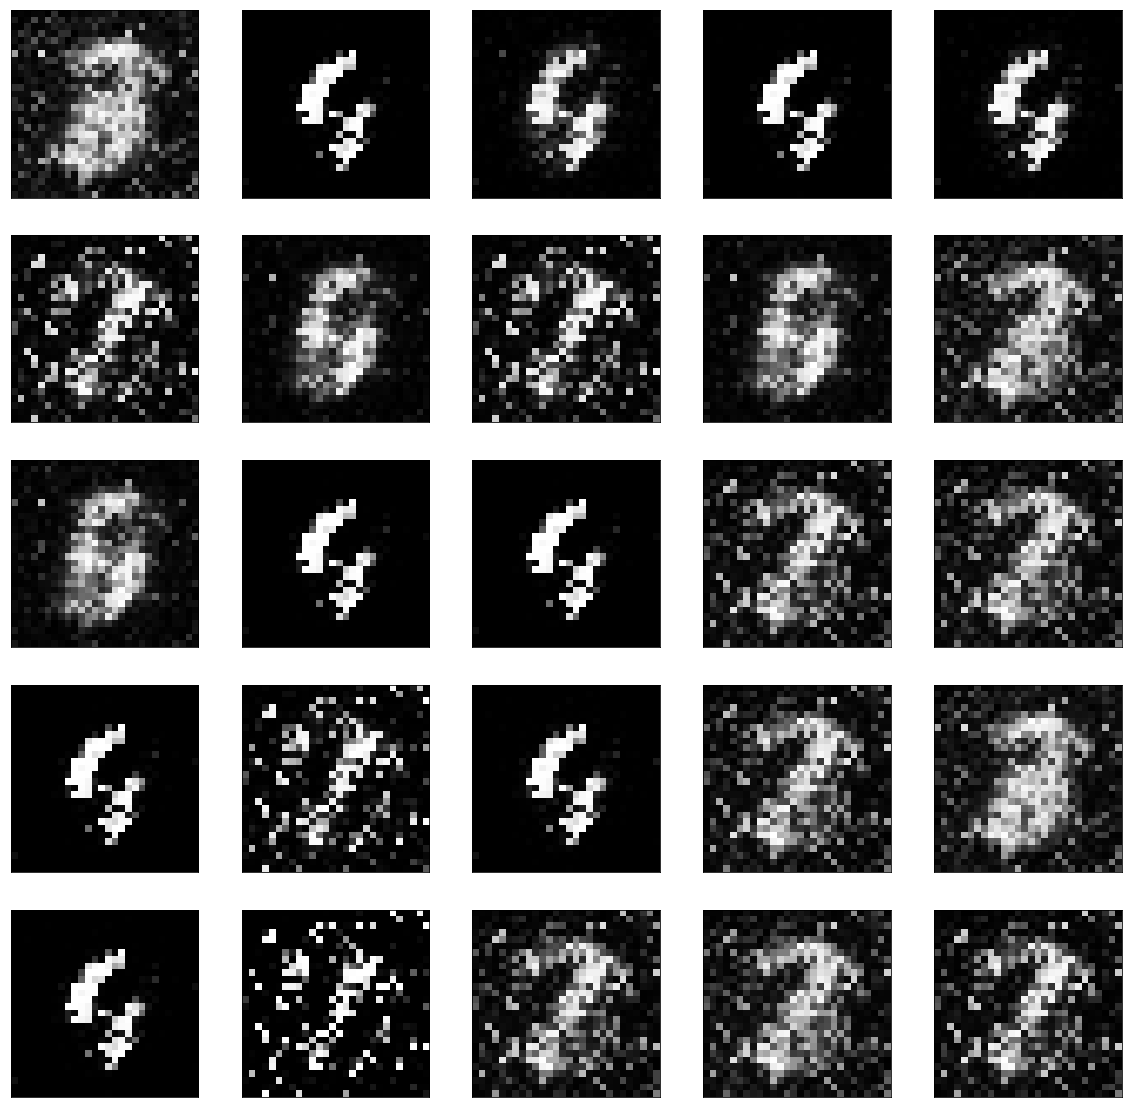

[Epoch 1/10] [Batch 663/938] [Generator loss: 0.253221] [Discriminator loss: 0.799550]
[Epoch 1/10] [Batch 664/938] [Generator loss: 2.837249] [Discriminator loss: 0.450602]
[Epoch 1/10] [Batch 665/938] [Generator loss: 0.951501] [Discriminator loss: 0.338287]
[Epoch 1/10] [Batch 666/938] [Generator loss: 1.733874] [Discriminator loss: 0.351961]
[Epoch 1/10] [Batch 667/938] [Generator loss: 0.970038] [Discriminator loss: 0.411616]
[Epoch 1/10] [Batch 668/938] [Generator loss: 1.329966] [Discriminator loss: 0.405719]
[Epoch 1/10] [Batch 669/938] [Generator loss: 1.096550] [Discriminator loss: 0.433539]
[Epoch 1/10] [Batch 670/938] [Generator loss: 1.182254] [Discriminator loss: 0.415286]
[Epoch 1/10] [Batch 671/938] [Generator loss: 1.088898] [Discriminator loss: 0.529360]
[Epoch 1/10] [Batch 672/938] [Generator loss: 0.821358] [Discriminator loss: 0.481022]
[Epoch 1/10] [Batch 673/938] [Generator loss: 2.039799] [Discriminator loss: 0.574674]
[Epoch 1/10] [Batch 674/938] [Generator los

[Epoch 1/10] [Batch 765/938] [Generator loss: 2.451708] [Discriminator loss: 0.593485]
[Epoch 1/10] [Batch 766/938] [Generator loss: 0.229344] [Discriminator loss: 0.849047]
[Epoch 1/10] [Batch 767/938] [Generator loss: 3.141032] [Discriminator loss: 0.792186]
[Epoch 1/10] [Batch 768/938] [Generator loss: 0.499689] [Discriminator loss: 0.566093]
[Epoch 1/10] [Batch 769/938] [Generator loss: 1.859490] [Discriminator loss: 0.409823]
[Epoch 1/10] [Batch 770/938] [Generator loss: 1.141516] [Discriminator loss: 0.356297]
[Epoch 1/10] [Batch 771/938] [Generator loss: 1.017959] [Discriminator loss: 0.410965]
[Epoch 1/10] [Batch 772/938] [Generator loss: 1.403182] [Discriminator loss: 0.411849]
[Epoch 1/10] [Batch 773/938] [Generator loss: 0.784447] [Discriminator loss: 0.460364]
[Epoch 1/10] [Batch 774/938] [Generator loss: 1.709245] [Discriminator loss: 0.402702]
[Epoch 1/10] [Batch 775/938] [Generator loss: 0.809880] [Discriminator loss: 0.423569]
[Epoch 1/10] [Batch 776/938] [Generator los

[Epoch 1/10] [Batch 868/938] [Generator loss: 2.607461] [Discriminator loss: 0.383286]
[Epoch 1/10] [Batch 869/938] [Generator loss: 1.370035] [Discriminator loss: 0.239957]
[Epoch 1/10] [Batch 870/938] [Generator loss: 1.351172] [Discriminator loss: 0.265148]
[Epoch 1/10] [Batch 871/938] [Generator loss: 1.815473] [Discriminator loss: 0.264880]
[Epoch 1/10] [Batch 872/938] [Generator loss: 1.225602] [Discriminator loss: 0.251773]
[Epoch 1/10] [Batch 873/938] [Generator loss: 1.914623] [Discriminator loss: 0.315180]
[Epoch 1/10] [Batch 874/938] [Generator loss: 1.011768] [Discriminator loss: 0.325185]
[Epoch 1/10] [Batch 875/938] [Generator loss: 1.938856] [Discriminator loss: 0.282979]
[Epoch 1/10] [Batch 876/938] [Generator loss: 1.274734] [Discriminator loss: 0.263972]
[Epoch 1/10] [Batch 877/938] [Generator loss: 1.838894] [Discriminator loss: 0.260501]
[Epoch 1/10] [Batch 878/938] [Generator loss: 1.311596] [Discriminator loss: 0.314215]
[Epoch 1/10] [Batch 879/938] [Generator los

[Epoch 2/10] [Batch 26/938] [Generator loss: 2.240761] [Discriminator loss: 0.387585]
[Epoch 2/10] [Batch 27/938] [Generator loss: 0.649432] [Discriminator loss: 0.463652]
[Epoch 2/10] [Batch 28/938] [Generator loss: 3.048977] [Discriminator loss: 0.540665]
[Epoch 2/10] [Batch 29/938] [Generator loss: 0.517884] [Discriminator loss: 0.536107]
[Epoch 2/10] [Batch 30/938] [Generator loss: 3.206075] [Discriminator loss: 0.445413]
[Epoch 2/10] [Batch 31/938] [Generator loss: 1.127580] [Discriminator loss: 0.294846]
[Epoch 2/10] [Batch 32/938] [Generator loss: 1.420882] [Discriminator loss: 0.278122]
[Epoch 2/10] [Batch 33/938] [Generator loss: 1.758458] [Discriminator loss: 0.261800]
[Epoch 2/10] [Batch 34/938] [Generator loss: 1.353983] [Discriminator loss: 0.310211]
[Epoch 2/10] [Batch 35/938] [Generator loss: 1.291277] [Discriminator loss: 0.341006]
[Epoch 2/10] [Batch 36/938] [Generator loss: 1.291698] [Discriminator loss: 0.340131]
[Epoch 2/10] [Batch 37/938] [Generator loss: 1.575508]

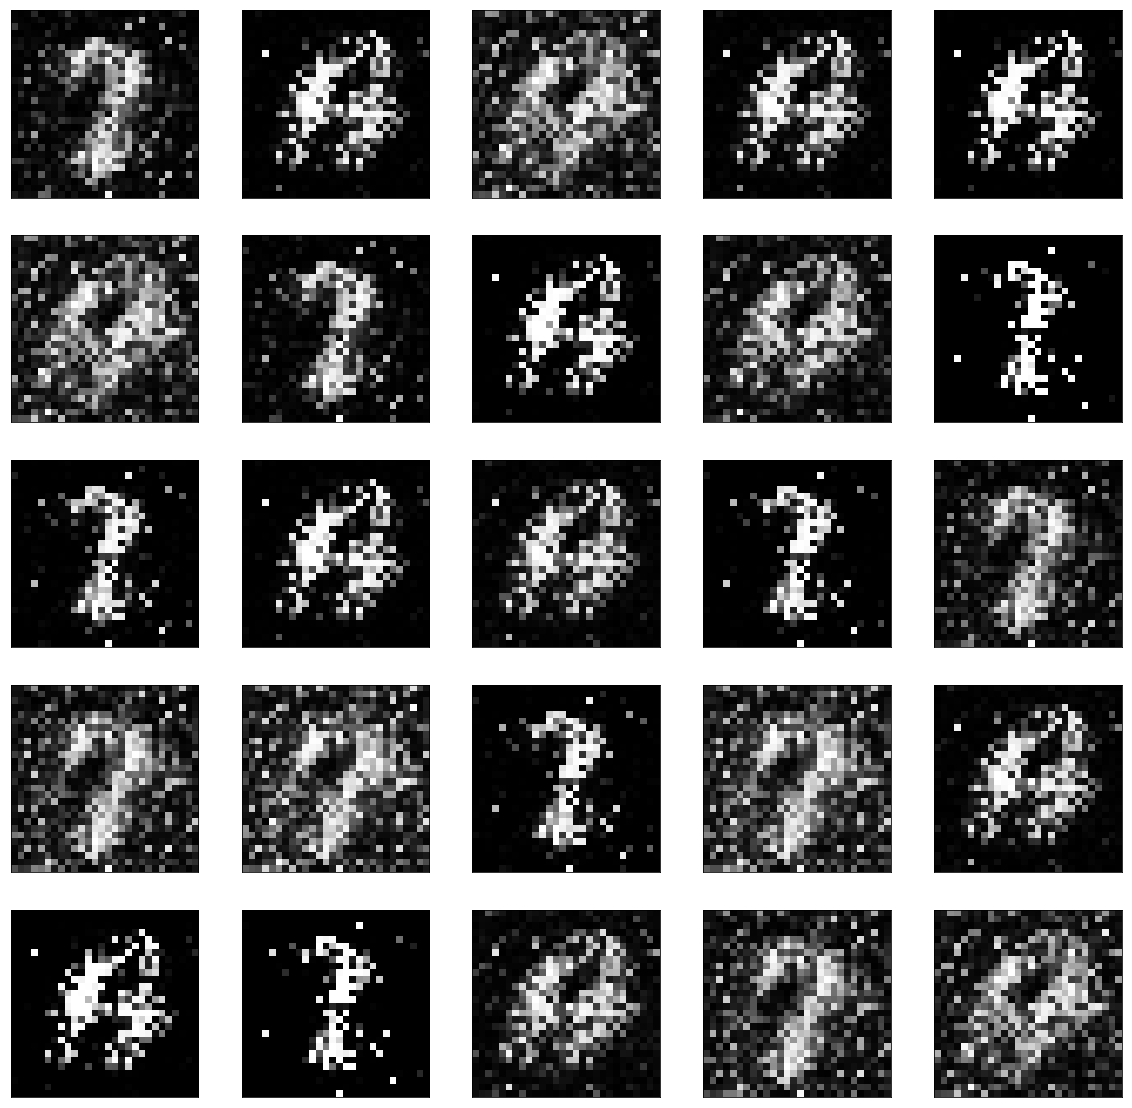

[Epoch 2/10] [Batch 125/938] [Generator loss: 2.471250] [Discriminator loss: 0.411809]
[Epoch 2/10] [Batch 126/938] [Generator loss: 0.972223] [Discriminator loss: 0.383164]
[Epoch 2/10] [Batch 127/938] [Generator loss: 1.061949] [Discriminator loss: 0.409584]
[Epoch 2/10] [Batch 128/938] [Generator loss: 1.244122] [Discriminator loss: 0.332127]
[Epoch 2/10] [Batch 129/938] [Generator loss: 1.311376] [Discriminator loss: 0.373285]
[Epoch 2/10] [Batch 130/938] [Generator loss: 0.929665] [Discriminator loss: 0.449819]
[Epoch 2/10] [Batch 131/938] [Generator loss: 1.345308] [Discriminator loss: 0.424356]
[Epoch 2/10] [Batch 132/938] [Generator loss: 0.796889] [Discriminator loss: 0.409572]
[Epoch 2/10] [Batch 133/938] [Generator loss: 2.166434] [Discriminator loss: 0.579809]
[Epoch 2/10] [Batch 134/938] [Generator loss: 0.201786] [Discriminator loss: 0.905887]
[Epoch 2/10] [Batch 135/938] [Generator loss: 3.641497] [Discriminator loss: 0.929270]
[Epoch 2/10] [Batch 136/938] [Generator los

[Epoch 2/10] [Batch 222/938] [Generator loss: 1.235854] [Discriminator loss: 0.399436]
[Epoch 2/10] [Batch 223/938] [Generator loss: 0.954768] [Discriminator loss: 0.386051]
[Epoch 2/10] [Batch 224/938] [Generator loss: 2.134531] [Discriminator loss: 0.374971]
[Epoch 2/10] [Batch 225/938] [Generator loss: 0.459752] [Discriminator loss: 0.575727]
[Epoch 2/10] [Batch 226/938] [Generator loss: 3.868298] [Discriminator loss: 0.909269]
[Epoch 2/10] [Batch 227/938] [Generator loss: 0.211588] [Discriminator loss: 0.903021]
[Epoch 2/10] [Batch 228/938] [Generator loss: 3.161048] [Discriminator loss: 0.295816]
[Epoch 2/10] [Batch 229/938] [Generator loss: 2.219647] [Discriminator loss: 0.239545]
[Epoch 2/10] [Batch 230/938] [Generator loss: 0.690539] [Discriminator loss: 0.434106]
[Epoch 2/10] [Batch 231/938] [Generator loss: 2.642811] [Discriminator loss: 0.335518]
[Epoch 2/10] [Batch 232/938] [Generator loss: 1.192421] [Discriminator loss: 0.339287]
[Epoch 2/10] [Batch 233/938] [Generator los

[Epoch 2/10] [Batch 326/938] [Generator loss: 0.354259] [Discriminator loss: 0.706475]
[Epoch 2/10] [Batch 327/938] [Generator loss: 3.790721] [Discriminator loss: 0.901166]
[Epoch 2/10] [Batch 328/938] [Generator loss: 0.521038] [Discriminator loss: 0.563242]
[Epoch 2/10] [Batch 329/938] [Generator loss: 2.259426] [Discriminator loss: 0.199555]
[Epoch 2/10] [Batch 330/938] [Generator loss: 2.097991] [Discriminator loss: 0.320430]
[Epoch 2/10] [Batch 331/938] [Generator loss: 0.685901] [Discriminator loss: 0.485137]
[Epoch 2/10] [Batch 332/938] [Generator loss: 2.430218] [Discriminator loss: 0.256026]
[Epoch 2/10] [Batch 333/938] [Generator loss: 1.666233] [Discriminator loss: 0.373339]
[Epoch 2/10] [Batch 334/938] [Generator loss: 0.548530] [Discriminator loss: 0.536299]
[Epoch 2/10] [Batch 335/938] [Generator loss: 3.122451] [Discriminator loss: 0.579240]
[Epoch 2/10] [Batch 336/938] [Generator loss: 0.605231] [Discriminator loss: 0.470881]
[Epoch 2/10] [Batch 337/938] [Generator los

[Epoch 2/10] [Batch 427/938] [Generator loss: 1.258524] [Discriminator loss: 0.306617]
[Epoch 2/10] [Batch 428/938] [Generator loss: 1.603836] [Discriminator loss: 0.295999]
[Epoch 2/10] [Batch 429/938] [Generator loss: 1.574217] [Discriminator loss: 0.250036]
[Epoch 2/10] [Batch 430/938] [Generator loss: 1.702881] [Discriminator loss: 0.368032]
[Epoch 2/10] [Batch 431/938] [Generator loss: 0.655090] [Discriminator loss: 0.454926]
[Epoch 2/10] [Batch 432/938] [Generator loss: 3.808870] [Discriminator loss: 0.581625]
[Epoch 2/10] [Batch 433/938] [Generator loss: 0.745353] [Discriminator loss: 0.463777]
[Epoch 2/10] [Batch 434/938] [Generator loss: 3.221682] [Discriminator loss: 0.315453]
[Epoch 2/10] [Batch 435/938] [Generator loss: 1.367311] [Discriminator loss: 0.222969]
[Epoch 2/10] [Batch 436/938] [Generator loss: 1.722295] [Discriminator loss: 0.322855]
[Epoch 2/10] [Batch 437/938] [Generator loss: 1.268376] [Discriminator loss: 0.284076]
[Epoch 2/10] [Batch 438/938] [Generator los

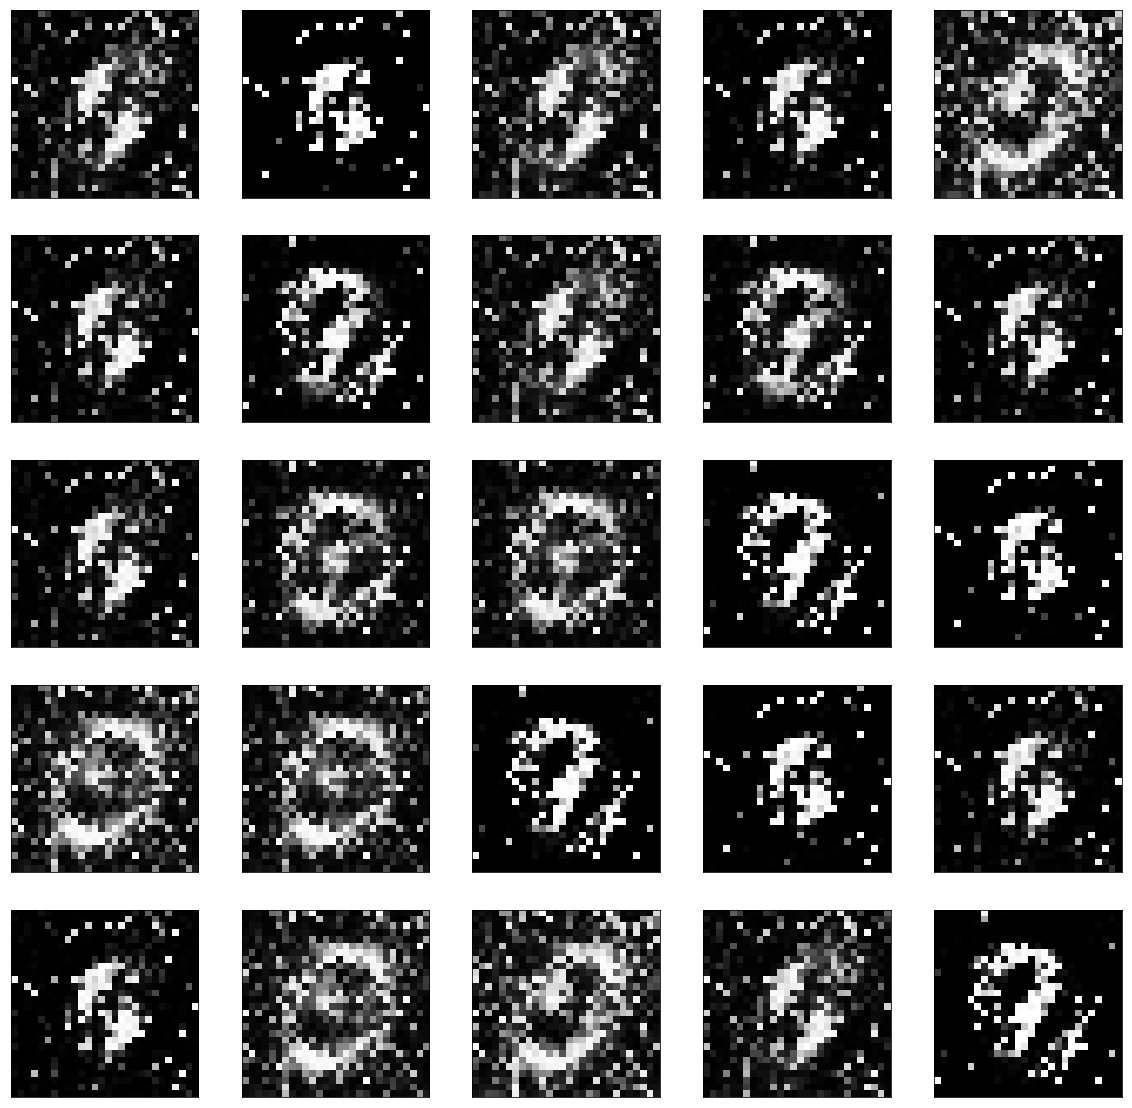

[Epoch 2/10] [Batch 525/938] [Generator loss: 0.459190] [Discriminator loss: 0.619415]
[Epoch 2/10] [Batch 526/938] [Generator loss: 3.796733] [Discriminator loss: 0.180021]
[Epoch 2/10] [Batch 527/938] [Generator loss: 3.193715] [Discriminator loss: 0.165079]
[Epoch 2/10] [Batch 528/938] [Generator loss: 0.933243] [Discriminator loss: 0.289653]
[Epoch 2/10] [Batch 529/938] [Generator loss: 2.423174] [Discriminator loss: 0.283655]
[Epoch 2/10] [Batch 530/938] [Generator loss: 1.016445] [Discriminator loss: 0.349417]
[Epoch 2/10] [Batch 531/938] [Generator loss: 2.468658] [Discriminator loss: 0.364823]
[Epoch 2/10] [Batch 532/938] [Generator loss: 0.741332] [Discriminator loss: 0.421901]
[Epoch 2/10] [Batch 533/938] [Generator loss: 3.617140] [Discriminator loss: 0.405157]
[Epoch 2/10] [Batch 534/938] [Generator loss: 0.935338] [Discriminator loss: 0.399312]
[Epoch 2/10] [Batch 535/938] [Generator loss: 2.358103] [Discriminator loss: 0.374973]
[Epoch 2/10] [Batch 536/938] [Generator los

[Epoch 2/10] [Batch 620/938] [Generator loss: 2.084148] [Discriminator loss: 0.259009]
[Epoch 2/10] [Batch 621/938] [Generator loss: 1.168784] [Discriminator loss: 0.245777]
[Epoch 2/10] [Batch 622/938] [Generator loss: 2.614459] [Discriminator loss: 0.216215]
[Epoch 2/10] [Batch 623/938] [Generator loss: 1.359267] [Discriminator loss: 0.231707]
[Epoch 2/10] [Batch 624/938] [Generator loss: 1.934018] [Discriminator loss: 0.236262]
[Epoch 2/10] [Batch 625/938] [Generator loss: 1.446414] [Discriminator loss: 0.212100]
[Epoch 2/10] [Batch 626/938] [Generator loss: 2.158035] [Discriminator loss: 0.233803]
[Epoch 2/10] [Batch 627/938] [Generator loss: 1.126271] [Discriminator loss: 0.334465]
[Epoch 2/10] [Batch 628/938] [Generator loss: 2.521445] [Discriminator loss: 0.401833]
[Epoch 2/10] [Batch 629/938] [Generator loss: 0.359552] [Discriminator loss: 0.649918]
[Epoch 2/10] [Batch 630/938] [Generator loss: 5.640706] [Discriminator loss: 0.985796]
[Epoch 2/10] [Batch 631/938] [Generator los

[Epoch 2/10] [Batch 722/938] [Generator loss: 1.543947] [Discriminator loss: 0.318252]
[Epoch 2/10] [Batch 723/938] [Generator loss: 1.887474] [Discriminator loss: 0.308734]
[Epoch 2/10] [Batch 724/938] [Generator loss: 0.890633] [Discriminator loss: 0.383494]
[Epoch 2/10] [Batch 725/938] [Generator loss: 2.677317] [Discriminator loss: 0.392512]
[Epoch 2/10] [Batch 726/938] [Generator loss: 0.861390] [Discriminator loss: 0.427590]
[Epoch 2/10] [Batch 727/938] [Generator loss: 2.519389] [Discriminator loss: 0.289609]
[Epoch 2/10] [Batch 728/938] [Generator loss: 1.263049] [Discriminator loss: 0.264020]
[Epoch 2/10] [Batch 729/938] [Generator loss: 2.169662] [Discriminator loss: 0.331804]
[Epoch 2/10] [Batch 730/938] [Generator loss: 0.845159] [Discriminator loss: 0.373765]
[Epoch 2/10] [Batch 731/938] [Generator loss: 2.860126] [Discriminator loss: 0.414491]
[Epoch 2/10] [Batch 732/938] [Generator loss: 0.578034] [Discriminator loss: 0.491617]
[Epoch 2/10] [Batch 733/938] [Generator los

[Epoch 2/10] [Batch 820/938] [Generator loss: 1.683999] [Discriminator loss: 0.261400]
[Epoch 2/10] [Batch 821/938] [Generator loss: 1.807930] [Discriminator loss: 0.231792]
[Epoch 2/10] [Batch 822/938] [Generator loss: 1.585306] [Discriminator loss: 0.202365]
[Epoch 2/10] [Batch 823/938] [Generator loss: 2.259546] [Discriminator loss: 0.256306]
[Epoch 2/10] [Batch 824/938] [Generator loss: 0.983758] [Discriminator loss: 0.330649]
[Epoch 2/10] [Batch 825/938] [Generator loss: 3.034065] [Discriminator loss: 0.307192]
[Epoch 2/10] [Batch 826/938] [Generator loss: 1.225510] [Discriminator loss: 0.270676]
[Epoch 2/10] [Batch 827/938] [Generator loss: 1.979212] [Discriminator loss: 0.217089]
[Epoch 2/10] [Batch 828/938] [Generator loss: 1.740717] [Discriminator loss: 0.241145]
[Epoch 2/10] [Batch 829/938] [Generator loss: 1.542586] [Discriminator loss: 0.231939]
[Epoch 2/10] [Batch 830/938] [Generator loss: 2.132527] [Discriminator loss: 0.207715]
[Epoch 2/10] [Batch 831/938] [Generator los

[Epoch 2/10] [Batch 924/938] [Generator loss: 4.053019] [Discriminator loss: 0.327724]


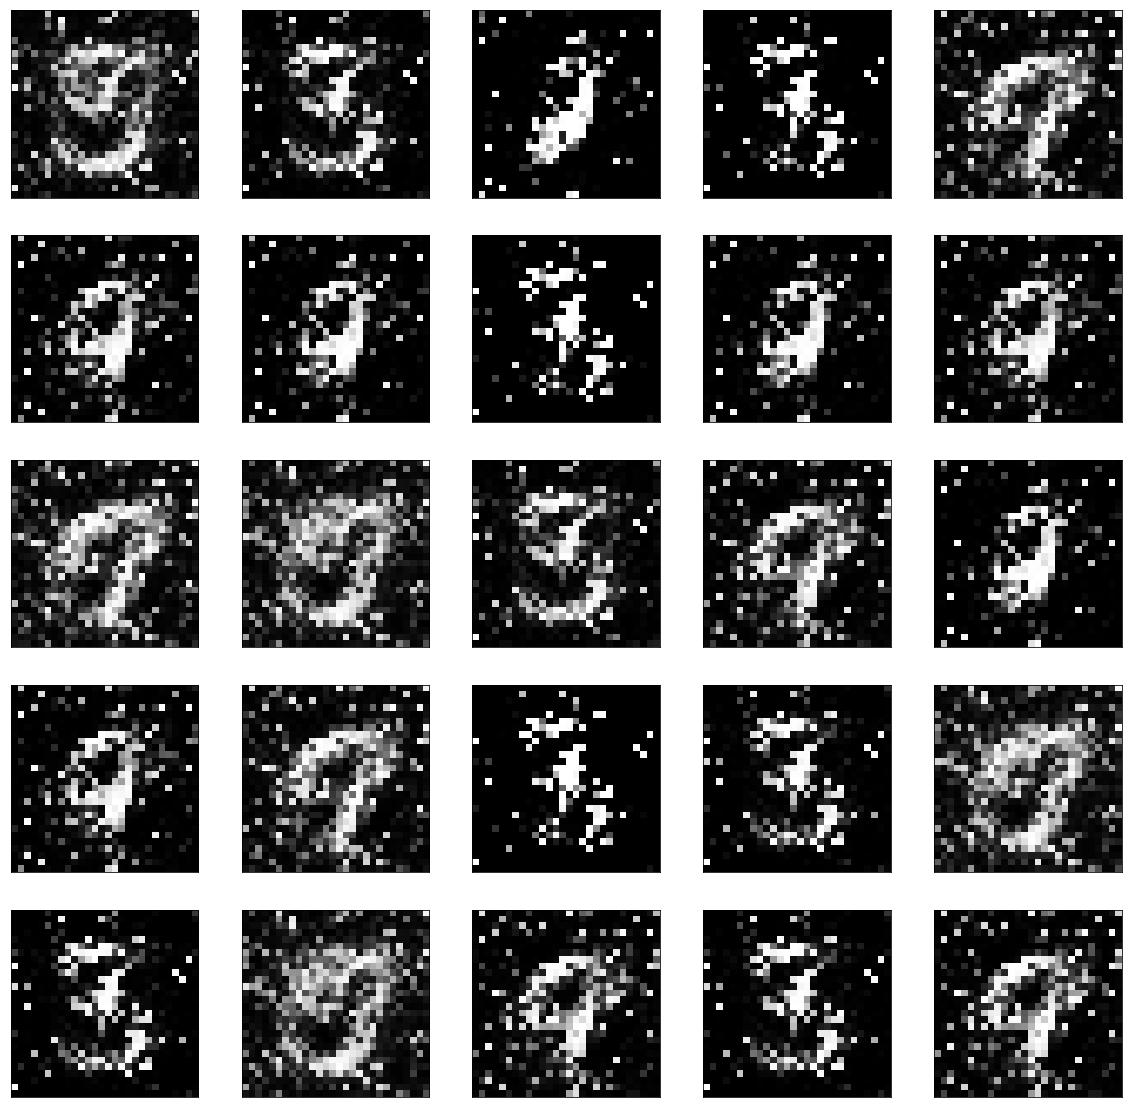

[Epoch 2/10] [Batch 925/938] [Generator loss: 2.183390] [Discriminator loss: 0.147721]
[Epoch 2/10] [Batch 926/938] [Generator loss: 0.934310] [Discriminator loss: 0.303101]
[Epoch 2/10] [Batch 927/938] [Generator loss: 3.270789] [Discriminator loss: 0.334855]
[Epoch 2/10] [Batch 928/938] [Generator loss: 1.325718] [Discriminator loss: 0.199769]
[Epoch 2/10] [Batch 929/938] [Generator loss: 1.870488] [Discriminator loss: 0.190465]
[Epoch 2/10] [Batch 930/938] [Generator loss: 1.944812] [Discriminator loss: 0.219204]
[Epoch 2/10] [Batch 931/938] [Generator loss: 1.228848] [Discriminator loss: 0.269972]
[Epoch 2/10] [Batch 932/938] [Generator loss: 1.916292] [Discriminator loss: 0.225410]
[Epoch 2/10] [Batch 933/938] [Generator loss: 1.486996] [Discriminator loss: 0.251695]
[Epoch 2/10] [Batch 934/938] [Generator loss: 1.541185] [Discriminator loss: 0.297501]
[Epoch 2/10] [Batch 935/938] [Generator loss: 1.349040] [Discriminator loss: 0.316721]
[Epoch 2/10] [Batch 936/938] [Generator los

[Epoch 3/10] [Batch 96/938] [Generator loss: 4.156752] [Discriminator loss: 0.529348]
[Epoch 3/10] [Batch 97/938] [Generator loss: 0.914587] [Discriminator loss: 0.288339]
[Epoch 3/10] [Batch 98/938] [Generator loss: 2.068305] [Discriminator loss: 0.221656]
[Epoch 3/10] [Batch 99/938] [Generator loss: 1.582324] [Discriminator loss: 0.254461]
[Epoch 3/10] [Batch 100/938] [Generator loss: 1.238867] [Discriminator loss: 0.320905]
[Epoch 3/10] [Batch 101/938] [Generator loss: 1.802569] [Discriminator loss: 0.274457]
[Epoch 3/10] [Batch 102/938] [Generator loss: 1.147171] [Discriminator loss: 0.275928]
[Epoch 3/10] [Batch 103/938] [Generator loss: 2.456988] [Discriminator loss: 0.245807]
[Epoch 3/10] [Batch 104/938] [Generator loss: 1.037902] [Discriminator loss: 0.339283]
[Epoch 3/10] [Batch 105/938] [Generator loss: 2.167824] [Discriminator loss: 0.304953]
[Epoch 3/10] [Batch 106/938] [Generator loss: 0.783619] [Discriminator loss: 0.380191]
[Epoch 3/10] [Batch 107/938] [Generator loss: 3

[Epoch 3/10] [Batch 198/938] [Generator loss: 1.002913] [Discriminator loss: 0.286239]
[Epoch 3/10] [Batch 199/938] [Generator loss: 2.888573] [Discriminator loss: 0.269486]
[Epoch 3/10] [Batch 200/938] [Generator loss: 1.418133] [Discriminator loss: 0.258652]
[Epoch 3/10] [Batch 201/938] [Generator loss: 1.432818] [Discriminator loss: 0.230708]
[Epoch 3/10] [Batch 202/938] [Generator loss: 2.379112] [Discriminator loss: 0.377331]
[Epoch 3/10] [Batch 203/938] [Generator loss: 0.528919] [Discriminator loss: 0.495830]
[Epoch 3/10] [Batch 204/938] [Generator loss: 4.637228] [Discriminator loss: 0.768677]
[Epoch 3/10] [Batch 205/938] [Generator loss: 0.959429] [Discriminator loss: 0.316539]
[Epoch 3/10] [Batch 206/938] [Generator loss: 1.620664] [Discriminator loss: 0.224795]
[Epoch 3/10] [Batch 207/938] [Generator loss: 2.387300] [Discriminator loss: 0.175287]
[Epoch 3/10] [Batch 208/938] [Generator loss: 1.954436] [Discriminator loss: 0.177787]
[Epoch 3/10] [Batch 209/938] [Generator los

[Epoch 3/10] [Batch 301/938] [Generator loss: 4.174254] [Discriminator loss: 0.653745]
[Epoch 3/10] [Batch 302/938] [Generator loss: 0.262967] [Discriminator loss: 0.808174]
[Epoch 3/10] [Batch 303/938] [Generator loss: 5.397655] [Discriminator loss: 0.932741]
[Epoch 3/10] [Batch 304/938] [Generator loss: 1.201199] [Discriminator loss: 0.251141]
[Epoch 3/10] [Batch 305/938] [Generator loss: 1.761842] [Discriminator loss: 0.166548]
[Epoch 3/10] [Batch 306/938] [Generator loss: 2.463922] [Discriminator loss: 0.200256]
[Epoch 3/10] [Batch 307/938] [Generator loss: 1.592229] [Discriminator loss: 0.246931]
[Epoch 3/10] [Batch 308/938] [Generator loss: 1.406000] [Discriminator loss: 0.257787]
[Epoch 3/10] [Batch 309/938] [Generator loss: 2.292502] [Discriminator loss: 0.278183]
[Epoch 3/10] [Batch 310/938] [Generator loss: 1.098814] [Discriminator loss: 0.360158]
[Epoch 3/10] [Batch 311/938] [Generator loss: 2.011790] [Discriminator loss: 0.329727]
[Epoch 3/10] [Batch 312/938] [Generator los

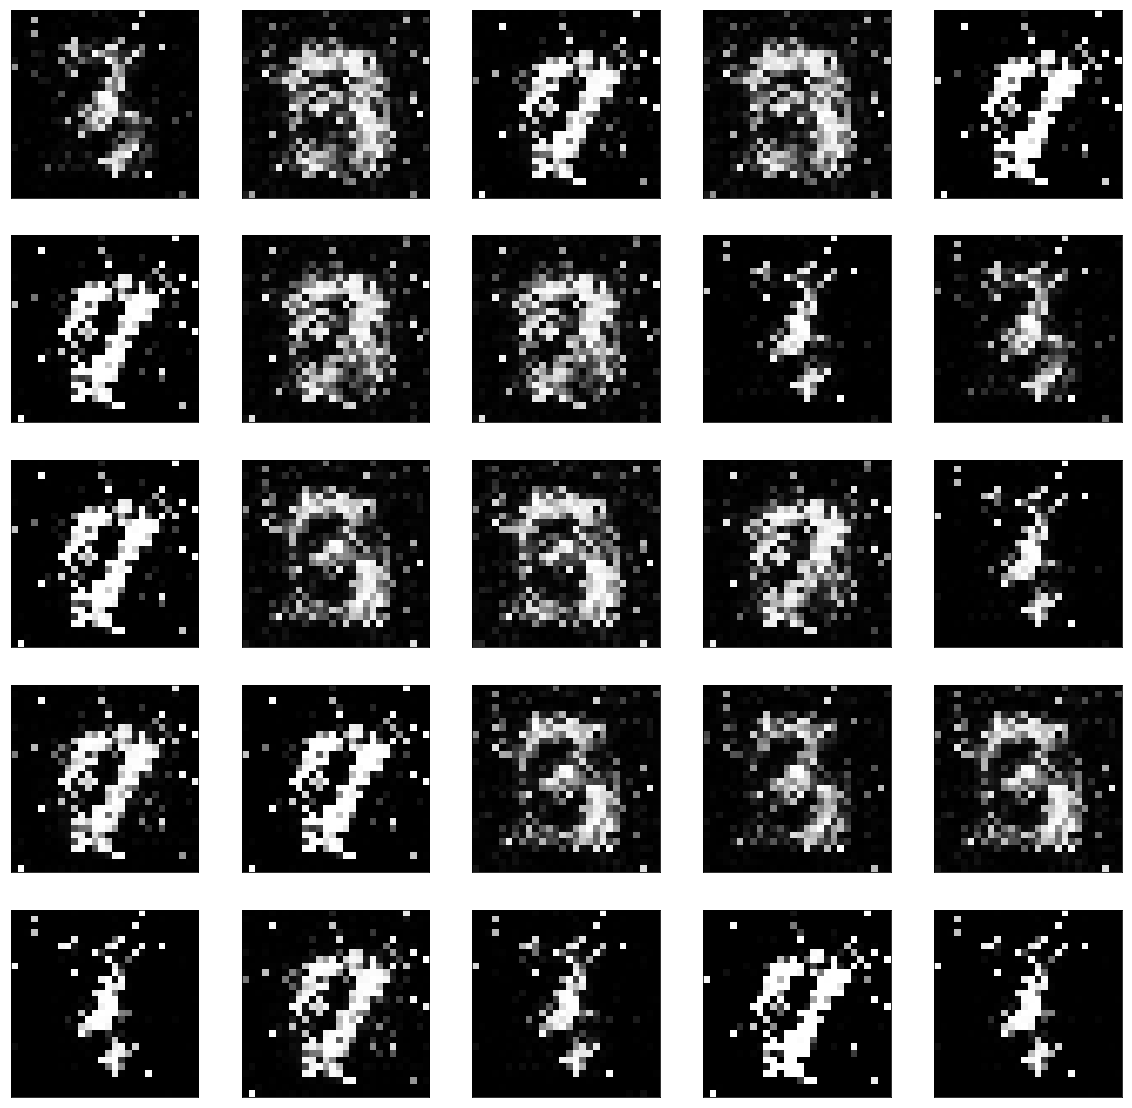

[Epoch 3/10] [Batch 387/938] [Generator loss: 1.758666] [Discriminator loss: 0.216661]
[Epoch 3/10] [Batch 388/938] [Generator loss: 1.952666] [Discriminator loss: 0.167802]
[Epoch 3/10] [Batch 389/938] [Generator loss: 1.939437] [Discriminator loss: 0.266159]
[Epoch 3/10] [Batch 390/938] [Generator loss: 1.062371] [Discriminator loss: 0.301604]
[Epoch 3/10] [Batch 391/938] [Generator loss: 3.032007] [Discriminator loss: 0.244021]
[Epoch 3/10] [Batch 392/938] [Generator loss: 2.000598] [Discriminator loss: 0.157591]
[Epoch 3/10] [Batch 393/938] [Generator loss: 1.761070] [Discriminator loss: 0.264772]
[Epoch 3/10] [Batch 394/938] [Generator loss: 1.753439] [Discriminator loss: 0.245922]
[Epoch 3/10] [Batch 395/938] [Generator loss: 1.872983] [Discriminator loss: 0.174377]
[Epoch 3/10] [Batch 396/938] [Generator loss: 1.905385] [Discriminator loss: 0.232409]
[Epoch 3/10] [Batch 397/938] [Generator loss: 1.644705] [Discriminator loss: 0.214105]
[Epoch 3/10] [Batch 398/938] [Generator los

[Epoch 3/10] [Batch 483/938] [Generator loss: 1.555777] [Discriminator loss: 0.225617]
[Epoch 3/10] [Batch 484/938] [Generator loss: 2.362518] [Discriminator loss: 0.280319]
[Epoch 3/10] [Batch 485/938] [Generator loss: 1.147357] [Discriminator loss: 0.323574]
[Epoch 3/10] [Batch 486/938] [Generator loss: 2.549192] [Discriminator loss: 0.346121]
[Epoch 3/10] [Batch 487/938] [Generator loss: 0.727125] [Discriminator loss: 0.405840]
[Epoch 3/10] [Batch 488/938] [Generator loss: 3.444690] [Discriminator loss: 0.507761]
[Epoch 3/10] [Batch 489/938] [Generator loss: 0.623544] [Discriminator loss: 0.627315]
[Epoch 3/10] [Batch 490/938] [Generator loss: 3.205609] [Discriminator loss: 0.506359]
[Epoch 3/10] [Batch 491/938] [Generator loss: 0.620140] [Discriminator loss: 0.483113]
[Epoch 3/10] [Batch 492/938] [Generator loss: 3.020520] [Discriminator loss: 0.496355]
[Epoch 3/10] [Batch 493/938] [Generator loss: 0.723508] [Discriminator loss: 0.442783]
[Epoch 3/10] [Batch 494/938] [Generator los

[Epoch 3/10] [Batch 585/938] [Generator loss: 4.097974] [Discriminator loss: 0.226499]
[Epoch 3/10] [Batch 586/938] [Generator loss: 2.988130] [Discriminator loss: 0.106268]
[Epoch 3/10] [Batch 587/938] [Generator loss: 1.481972] [Discriminator loss: 0.161149]
[Epoch 3/10] [Batch 588/938] [Generator loss: 2.708672] [Discriminator loss: 0.170681]
[Epoch 3/10] [Batch 589/938] [Generator loss: 1.979078] [Discriminator loss: 0.147673]
[Epoch 3/10] [Batch 590/938] [Generator loss: 1.713596] [Discriminator loss: 0.180202]
[Epoch 3/10] [Batch 591/938] [Generator loss: 2.096271] [Discriminator loss: 0.252713]
[Epoch 3/10] [Batch 592/938] [Generator loss: 1.094496] [Discriminator loss: 0.342157]
[Epoch 3/10] [Batch 593/938] [Generator loss: 2.733553] [Discriminator loss: 0.328946]
[Epoch 3/10] [Batch 594/938] [Generator loss: 0.669742] [Discriminator loss: 0.437692]
[Epoch 3/10] [Batch 595/938] [Generator loss: 4.212211] [Discriminator loss: 0.569242]
[Epoch 3/10] [Batch 596/938] [Generator los

[Epoch 3/10] [Batch 688/938] [Generator loss: 0.390916] [Discriminator loss: 0.597734]
[Epoch 3/10] [Batch 689/938] [Generator loss: 6.060690] [Discriminator loss: 0.538474]
[Epoch 3/10] [Batch 690/938] [Generator loss: 3.598710] [Discriminator loss: 0.154442]
[Epoch 3/10] [Batch 691/938] [Generator loss: 0.765787] [Discriminator loss: 0.354338]
[Epoch 3/10] [Batch 692/938] [Generator loss: 3.179646] [Discriminator loss: 0.162895]
[Epoch 3/10] [Batch 693/938] [Generator loss: 2.911616] [Discriminator loss: 0.133412]
[Epoch 3/10] [Batch 694/938] [Generator loss: 1.639048] [Discriminator loss: 0.177846]
[Epoch 3/10] [Batch 695/938] [Generator loss: 1.612596] [Discriminator loss: 0.196220]
[Epoch 3/10] [Batch 696/938] [Generator loss: 2.300351] [Discriminator loss: 0.268414]
[Epoch 3/10] [Batch 697/938] [Generator loss: 1.215521] [Discriminator loss: 0.311788]
[Epoch 3/10] [Batch 698/938] [Generator loss: 1.716579] [Discriminator loss: 0.353870]
[Epoch 3/10] [Batch 699/938] [Generator los

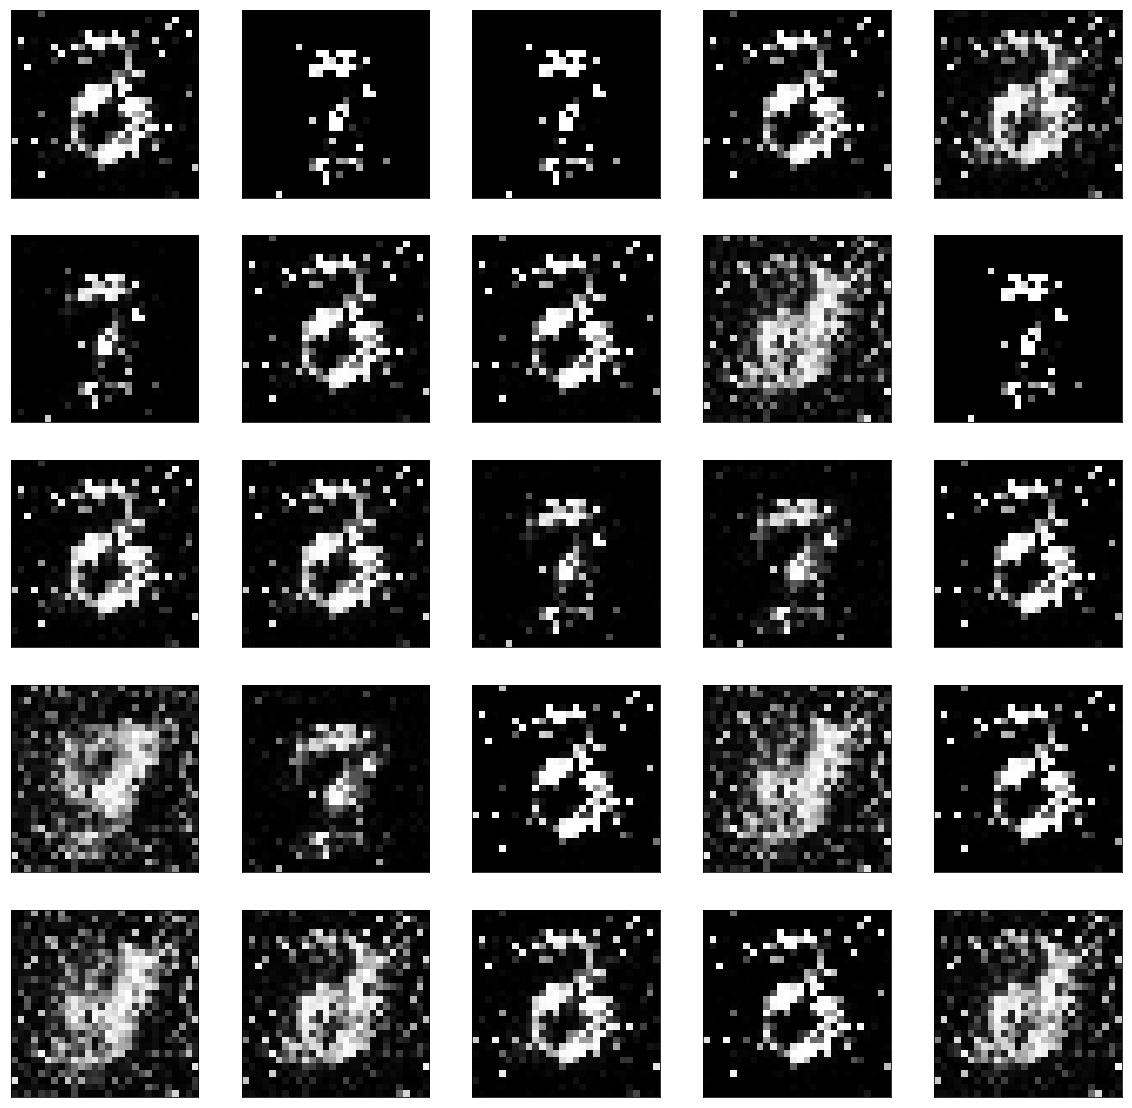

[Epoch 3/10] [Batch 787/938] [Generator loss: 0.409689] [Discriminator loss: 0.598484]
[Epoch 3/10] [Batch 788/938] [Generator loss: 4.604573] [Discriminator loss: 0.821651]
[Epoch 3/10] [Batch 789/938] [Generator loss: 0.939811] [Discriminator loss: 0.366945]
[Epoch 3/10] [Batch 790/938] [Generator loss: 2.373164] [Discriminator loss: 0.154792]
[Epoch 3/10] [Batch 791/938] [Generator loss: 2.404247] [Discriminator loss: 0.166658]
[Epoch 3/10] [Batch 792/938] [Generator loss: 1.436103] [Discriminator loss: 0.195188]
[Epoch 3/10] [Batch 793/938] [Generator loss: 2.263563] [Discriminator loss: 0.166116]
[Epoch 3/10] [Batch 794/938] [Generator loss: 2.037206] [Discriminator loss: 0.203713]
[Epoch 3/10] [Batch 795/938] [Generator loss: 1.361446] [Discriminator loss: 0.309391]
[Epoch 3/10] [Batch 796/938] [Generator loss: 2.072217] [Discriminator loss: 0.310574]
[Epoch 3/10] [Batch 797/938] [Generator loss: 1.162878] [Discriminator loss: 0.323897]
[Epoch 3/10] [Batch 798/938] [Generator los

[Epoch 3/10] [Batch 883/938] [Generator loss: 3.102514] [Discriminator loss: 0.210633]
[Epoch 3/10] [Batch 884/938] [Generator loss: 2.668588] [Discriminator loss: 0.298868]
[Epoch 3/10] [Batch 885/938] [Generator loss: 0.516684] [Discriminator loss: 0.534995]
[Epoch 3/10] [Batch 886/938] [Generator loss: 3.880641] [Discriminator loss: 0.478068]
[Epoch 3/10] [Batch 887/938] [Generator loss: 1.587049] [Discriminator loss: 0.197369]
[Epoch 3/10] [Batch 888/938] [Generator loss: 0.994575] [Discriminator loss: 0.278845]
[Epoch 3/10] [Batch 889/938] [Generator loss: 3.035481] [Discriminator loss: 0.320548]
[Epoch 3/10] [Batch 890/938] [Generator loss: 1.158632] [Discriminator loss: 0.260961]
[Epoch 3/10] [Batch 891/938] [Generator loss: 1.725901] [Discriminator loss: 0.236675]
[Epoch 3/10] [Batch 892/938] [Generator loss: 1.560050] [Discriminator loss: 0.266396]
[Epoch 3/10] [Batch 893/938] [Generator loss: 1.250394] [Discriminator loss: 0.256020]
[Epoch 3/10] [Batch 894/938] [Generator los

[Epoch 4/10] [Batch 52/938] [Generator loss: 1.787308] [Discriminator loss: 0.318509]
[Epoch 4/10] [Batch 53/938] [Generator loss: 1.057371] [Discriminator loss: 0.335794]
[Epoch 4/10] [Batch 54/938] [Generator loss: 3.311084] [Discriminator loss: 0.444550]
[Epoch 4/10] [Batch 55/938] [Generator loss: 0.621973] [Discriminator loss: 0.445511]
[Epoch 4/10] [Batch 56/938] [Generator loss: 5.202151] [Discriminator loss: 0.588077]
[Epoch 4/10] [Batch 57/938] [Generator loss: 1.541220] [Discriminator loss: 0.211290]
[Epoch 4/10] [Batch 58/938] [Generator loss: 0.972364] [Discriminator loss: 0.347163]
[Epoch 4/10] [Batch 59/938] [Generator loss: 4.265062] [Discriminator loss: 0.222388]
[Epoch 4/10] [Batch 60/938] [Generator loss: 2.786701] [Discriminator loss: 0.257519]
[Epoch 4/10] [Batch 61/938] [Generator loss: 0.362854] [Discriminator loss: 0.673861]
[Epoch 4/10] [Batch 62/938] [Generator loss: 6.669661] [Discriminator loss: 0.711195]
[Epoch 4/10] [Batch 63/938] [Generator loss: 2.943073]

[Epoch 4/10] [Batch 153/938] [Generator loss: 2.186013] [Discriminator loss: 0.286048]
[Epoch 4/10] [Batch 154/938] [Generator loss: 1.035150] [Discriminator loss: 0.330637]
[Epoch 4/10] [Batch 155/938] [Generator loss: 2.319906] [Discriminator loss: 0.299109]
[Epoch 4/10] [Batch 156/938] [Generator loss: 0.982245] [Discriminator loss: 0.354140]
[Epoch 4/10] [Batch 157/938] [Generator loss: 2.545489] [Discriminator loss: 0.306586]
[Epoch 4/10] [Batch 158/938] [Generator loss: 0.800344] [Discriminator loss: 0.371526]
[Epoch 4/10] [Batch 159/938] [Generator loss: 3.606390] [Discriminator loss: 0.406411]
[Epoch 4/10] [Batch 160/938] [Generator loss: 0.964424] [Discriminator loss: 0.322276]
[Epoch 4/10] [Batch 161/938] [Generator loss: 2.452435] [Discriminator loss: 0.129444]
[Epoch 4/10] [Batch 162/938] [Generator loss: 2.555980] [Discriminator loss: 0.268774]
[Epoch 4/10] [Batch 163/938] [Generator loss: 0.666709] [Discriminator loss: 0.430865]
[Epoch 4/10] [Batch 164/938] [Generator los

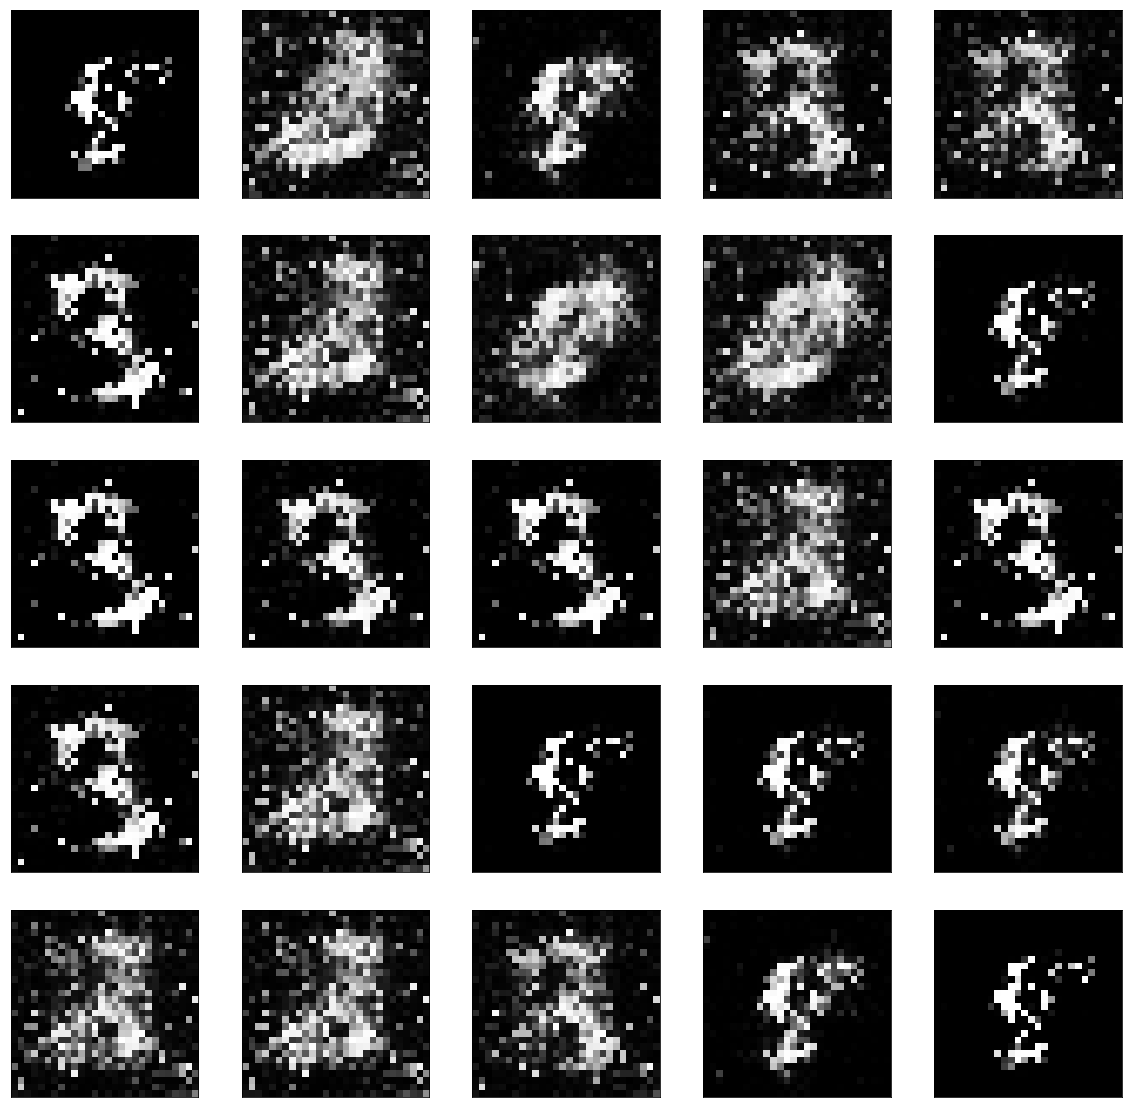

[Epoch 4/10] [Batch 249/938] [Generator loss: 1.544835] [Discriminator loss: 0.261978]
[Epoch 4/10] [Batch 250/938] [Generator loss: 1.218580] [Discriminator loss: 0.288420]
[Epoch 4/10] [Batch 251/938] [Generator loss: 2.841957] [Discriminator loss: 0.258033]
[Epoch 4/10] [Batch 252/938] [Generator loss: 1.414677] [Discriminator loss: 0.282156]
[Epoch 4/10] [Batch 253/938] [Generator loss: 1.278319] [Discriminator loss: 0.283013]
[Epoch 4/10] [Batch 254/938] [Generator loss: 2.394281] [Discriminator loss: 0.331581]
[Epoch 4/10] [Batch 255/938] [Generator loss: 0.866784] [Discriminator loss: 0.376573]
[Epoch 4/10] [Batch 256/938] [Generator loss: 2.551381] [Discriminator loss: 0.471216]
[Epoch 4/10] [Batch 257/938] [Generator loss: 0.635692] [Discriminator loss: 0.469688]
[Epoch 4/10] [Batch 258/938] [Generator loss: 3.346137] [Discriminator loss: 0.472689]
[Epoch 4/10] [Batch 259/938] [Generator loss: 0.867669] [Discriminator loss: 0.406655]
[Epoch 4/10] [Batch 260/938] [Generator los

[Epoch 4/10] [Batch 347/938] [Generator loss: 3.974376] [Discriminator loss: 0.472468]
[Epoch 4/10] [Batch 348/938] [Generator loss: 1.193372] [Discriminator loss: 0.301083]
[Epoch 4/10] [Batch 349/938] [Generator loss: 1.915334] [Discriminator loss: 0.357274]
[Epoch 4/10] [Batch 350/938] [Generator loss: 1.324581] [Discriminator loss: 0.302847]
[Epoch 4/10] [Batch 351/938] [Generator loss: 2.188681] [Discriminator loss: 0.244413]
[Epoch 4/10] [Batch 352/938] [Generator loss: 1.544177] [Discriminator loss: 0.283114]
[Epoch 4/10] [Batch 353/938] [Generator loss: 1.990764] [Discriminator loss: 0.267971]
[Epoch 4/10] [Batch 354/938] [Generator loss: 1.444676] [Discriminator loss: 0.257617]
[Epoch 4/10] [Batch 355/938] [Generator loss: 2.158071] [Discriminator loss: 0.220537]
[Epoch 4/10] [Batch 356/938] [Generator loss: 1.498861] [Discriminator loss: 0.268381]
[Epoch 4/10] [Batch 357/938] [Generator loss: 1.951362] [Discriminator loss: 0.303134]
[Epoch 4/10] [Batch 358/938] [Generator los

[Epoch 4/10] [Batch 445/938] [Generator loss: 1.359521] [Discriminator loss: 0.279762]
[Epoch 4/10] [Batch 446/938] [Generator loss: 1.624817] [Discriminator loss: 0.320423]
[Epoch 4/10] [Batch 447/938] [Generator loss: 1.203838] [Discriminator loss: 0.306742]
[Epoch 4/10] [Batch 448/938] [Generator loss: 2.251357] [Discriminator loss: 0.274245]
[Epoch 4/10] [Batch 449/938] [Generator loss: 1.092793] [Discriminator loss: 0.249814]
[Epoch 4/10] [Batch 450/938] [Generator loss: 3.006578] [Discriminator loss: 0.293550]
[Epoch 4/10] [Batch 451/938] [Generator loss: 1.095398] [Discriminator loss: 0.288754]
[Epoch 4/10] [Batch 452/938] [Generator loss: 2.335425] [Discriminator loss: 0.274278]
[Epoch 4/10] [Batch 453/938] [Generator loss: 1.177481] [Discriminator loss: 0.309038]
[Epoch 4/10] [Batch 454/938] [Generator loss: 2.053488] [Discriminator loss: 0.270552]
[Epoch 4/10] [Batch 455/938] [Generator loss: 1.261106] [Discriminator loss: 0.245791]
[Epoch 4/10] [Batch 456/938] [Generator los

[Epoch 4/10] [Batch 547/938] [Generator loss: 1.423370] [Discriminator loss: 0.178828]
[Epoch 4/10] [Batch 548/938] [Generator loss: 2.855484] [Discriminator loss: 0.191983]
[Epoch 4/10] [Batch 549/938] [Generator loss: 2.420076] [Discriminator loss: 0.121397]
[Epoch 4/10] [Batch 550/938] [Generator loss: 1.842170] [Discriminator loss: 0.173307]
[Epoch 4/10] [Batch 551/938] [Generator loss: 2.511070] [Discriminator loss: 0.183577]
[Epoch 4/10] [Batch 552/938] [Generator loss: 1.986103] [Discriminator loss: 0.206632]
[Epoch 4/10] [Batch 553/938] [Generator loss: 1.767620] [Discriminator loss: 0.221199]
[Epoch 4/10] [Batch 554/938] [Generator loss: 2.143816] [Discriminator loss: 0.206872]
[Epoch 4/10] [Batch 555/938] [Generator loss: 1.495436] [Discriminator loss: 0.210608]
[Epoch 4/10] [Batch 556/938] [Generator loss: 2.542542] [Discriminator loss: 0.325549]
[Epoch 4/10] [Batch 557/938] [Generator loss: 0.592845] [Discriminator loss: 0.444212]
[Epoch 4/10] [Batch 558/938] [Generator los

[Epoch 4/10] [Batch 647/938] [Generator loss: 1.724255] [Discriminator loss: 0.276558]
[Epoch 4/10] [Batch 648/938] [Generator loss: 1.244903] [Discriminator loss: 0.287259]


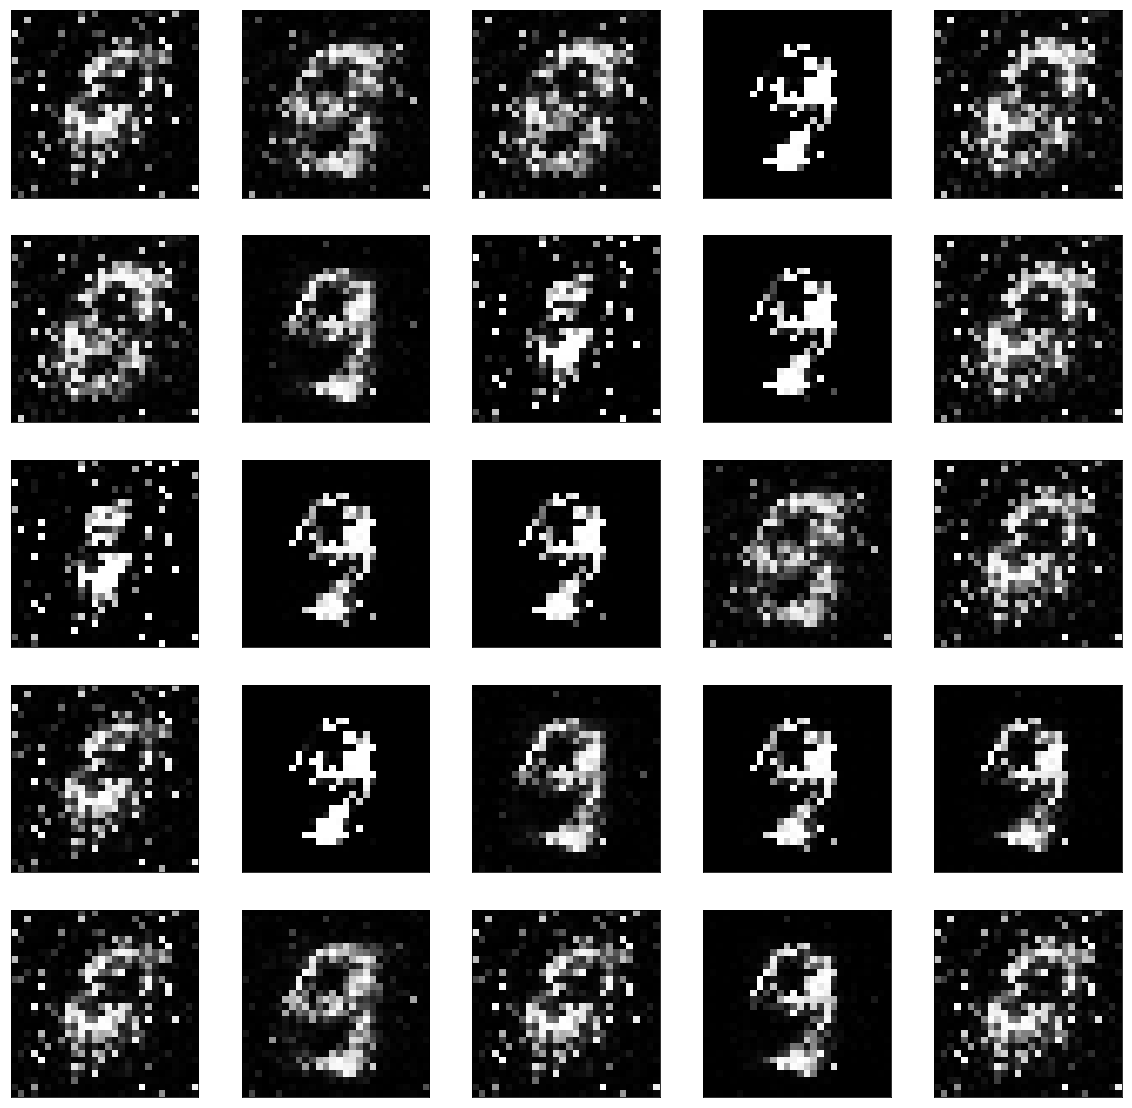

[Epoch 4/10] [Batch 649/938] [Generator loss: 2.618032] [Discriminator loss: 0.367987]
[Epoch 4/10] [Batch 650/938] [Generator loss: 0.616955] [Discriminator loss: 0.448359]
[Epoch 4/10] [Batch 651/938] [Generator loss: 5.368136] [Discriminator loss: 0.653511]
[Epoch 4/10] [Batch 652/938] [Generator loss: 1.410723] [Discriminator loss: 0.232545]
[Epoch 4/10] [Batch 653/938] [Generator loss: 1.564021] [Discriminator loss: 0.177167]
[Epoch 4/10] [Batch 654/938] [Generator loss: 3.520060] [Discriminator loss: 0.270077]
[Epoch 4/10] [Batch 655/938] [Generator loss: 1.447823] [Discriminator loss: 0.216485]
[Epoch 4/10] [Batch 656/938] [Generator loss: 2.278532] [Discriminator loss: 0.122324]
[Epoch 4/10] [Batch 657/938] [Generator loss: 2.976806] [Discriminator loss: 0.296510]
[Epoch 4/10] [Batch 658/938] [Generator loss: 0.882815] [Discriminator loss: 0.383242]
[Epoch 4/10] [Batch 659/938] [Generator loss: 3.805204] [Discriminator loss: 0.334101]
[Epoch 4/10] [Batch 660/938] [Generator los

[Epoch 4/10] [Batch 750/938] [Generator loss: 1.550828] [Discriminator loss: 0.191849]
[Epoch 4/10] [Batch 751/938] [Generator loss: 1.995917] [Discriminator loss: 0.185305]
[Epoch 4/10] [Batch 752/938] [Generator loss: 2.039205] [Discriminator loss: 0.163793]
[Epoch 4/10] [Batch 753/938] [Generator loss: 2.325157] [Discriminator loss: 0.188890]
[Epoch 4/10] [Batch 754/938] [Generator loss: 1.882595] [Discriminator loss: 0.290436]
[Epoch 4/10] [Batch 755/938] [Generator loss: 1.110623] [Discriminator loss: 0.297960]
[Epoch 4/10] [Batch 756/938] [Generator loss: 3.769589] [Discriminator loss: 0.387290]
[Epoch 4/10] [Batch 757/938] [Generator loss: 0.628703] [Discriminator loss: 0.490559]
[Epoch 4/10] [Batch 758/938] [Generator loss: 4.634577] [Discriminator loss: 0.533772]
[Epoch 4/10] [Batch 759/938] [Generator loss: 1.023641] [Discriminator loss: 0.295762]
[Epoch 4/10] [Batch 760/938] [Generator loss: 2.928829] [Discriminator loss: 0.204250]
[Epoch 4/10] [Batch 761/938] [Generator los

[Epoch 4/10] [Batch 850/938] [Generator loss: 1.377159] [Discriminator loss: 0.303733]
[Epoch 4/10] [Batch 851/938] [Generator loss: 2.408769] [Discriminator loss: 0.297093]
[Epoch 4/10] [Batch 852/938] [Generator loss: 1.102392] [Discriminator loss: 0.369855]
[Epoch 4/10] [Batch 853/938] [Generator loss: 2.549893] [Discriminator loss: 0.210599]
[Epoch 4/10] [Batch 854/938] [Generator loss: 1.334394] [Discriminator loss: 0.348659]
[Epoch 4/10] [Batch 855/938] [Generator loss: 1.861558] [Discriminator loss: 0.336076]
[Epoch 4/10] [Batch 856/938] [Generator loss: 1.173545] [Discriminator loss: 0.268656]
[Epoch 4/10] [Batch 857/938] [Generator loss: 3.223356] [Discriminator loss: 0.442379]
[Epoch 4/10] [Batch 858/938] [Generator loss: 0.342673] [Discriminator loss: 0.684073]
[Epoch 4/10] [Batch 859/938] [Generator loss: 6.548239] [Discriminator loss: 0.864574]
[Epoch 4/10] [Batch 860/938] [Generator loss: 2.118292] [Discriminator loss: 0.159745]
[Epoch 4/10] [Batch 861/938] [Generator los

[Epoch 5/10] [Batch 7/938] [Generator loss: 2.808131] [Discriminator loss: 0.193982]
[Epoch 5/10] [Batch 8/938] [Generator loss: 1.912988] [Discriminator loss: 0.221684]
[Epoch 5/10] [Batch 9/938] [Generator loss: 1.816954] [Discriminator loss: 0.195779]
[Epoch 5/10] [Batch 10/938] [Generator loss: 2.332505] [Discriminator loss: 0.214378]
[Epoch 5/10] [Batch 11/938] [Generator loss: 1.825405] [Discriminator loss: 0.285766]
[Epoch 5/10] [Batch 12/938] [Generator loss: 1.215577] [Discriminator loss: 0.259839]
[Epoch 5/10] [Batch 13/938] [Generator loss: 3.067515] [Discriminator loss: 0.309474]
[Epoch 5/10] [Batch 14/938] [Generator loss: 1.047035] [Discriminator loss: 0.336225]
[Epoch 5/10] [Batch 15/938] [Generator loss: 2.600875] [Discriminator loss: 0.286727]
[Epoch 5/10] [Batch 16/938] [Generator loss: 1.377206] [Discriminator loss: 0.279560]
[Epoch 5/10] [Batch 17/938] [Generator loss: 1.846690] [Discriminator loss: 0.258533]
[Epoch 5/10] [Batch 18/938] [Generator loss: 1.541929] [D

[Epoch 5/10] [Batch 110/938] [Generator loss: 1.628206] [Discriminator loss: 0.319425]


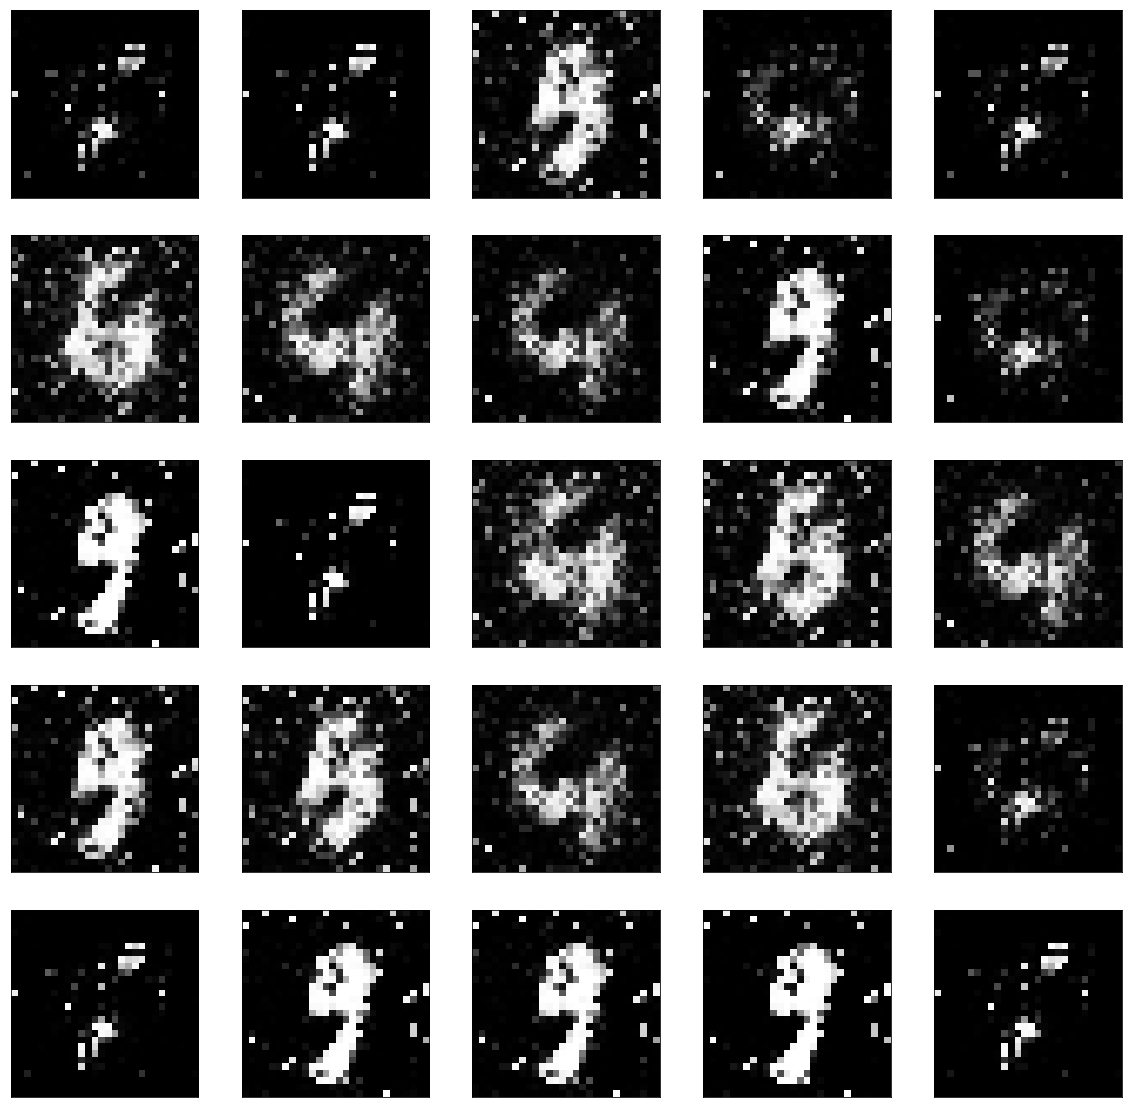

[Epoch 5/10] [Batch 111/938] [Generator loss: 0.937015] [Discriminator loss: 0.360751]
[Epoch 5/10] [Batch 112/938] [Generator loss: 3.873780] [Discriminator loss: 0.537228]
[Epoch 5/10] [Batch 113/938] [Generator loss: 0.748244] [Discriminator loss: 0.442429]
[Epoch 5/10] [Batch 114/938] [Generator loss: 2.602156] [Discriminator loss: 0.256699]
[Epoch 5/10] [Batch 115/938] [Generator loss: 1.604167] [Discriminator loss: 0.244982]
[Epoch 5/10] [Batch 116/938] [Generator loss: 1.449449] [Discriminator loss: 0.223174]
[Epoch 5/10] [Batch 117/938] [Generator loss: 2.396966] [Discriminator loss: 0.268888]
[Epoch 5/10] [Batch 118/938] [Generator loss: 1.384115] [Discriminator loss: 0.286723]
[Epoch 5/10] [Batch 119/938] [Generator loss: 2.036573] [Discriminator loss: 0.217007]
[Epoch 5/10] [Batch 120/938] [Generator loss: 1.884241] [Discriminator loss: 0.224331]
[Epoch 5/10] [Batch 121/938] [Generator loss: 1.746517] [Discriminator loss: 0.259589]
[Epoch 5/10] [Batch 122/938] [Generator los

[Epoch 5/10] [Batch 211/938] [Generator loss: 3.498710] [Discriminator loss: 0.127706]
[Epoch 5/10] [Batch 212/938] [Generator loss: 3.010158] [Discriminator loss: 0.119841]
[Epoch 5/10] [Batch 213/938] [Generator loss: 1.654275] [Discriminator loss: 0.186764]
[Epoch 5/10] [Batch 214/938] [Generator loss: 2.480913] [Discriminator loss: 0.177783]
[Epoch 5/10] [Batch 215/938] [Generator loss: 1.707276] [Discriminator loss: 0.157933]
[Epoch 5/10] [Batch 216/938] [Generator loss: 2.463089] [Discriminator loss: 0.185914]
[Epoch 5/10] [Batch 217/938] [Generator loss: 1.341072] [Discriminator loss: 0.229907]
[Epoch 5/10] [Batch 218/938] [Generator loss: 2.957248] [Discriminator loss: 0.238462]
[Epoch 5/10] [Batch 219/938] [Generator loss: 0.972778] [Discriminator loss: 0.355709]
[Epoch 5/10] [Batch 220/938] [Generator loss: 2.804031] [Discriminator loss: 0.321028]
[Epoch 5/10] [Batch 221/938] [Generator loss: 0.672667] [Discriminator loss: 0.442475]
[Epoch 5/10] [Batch 222/938] [Generator los

[Epoch 5/10] [Batch 316/938] [Generator loss: 1.927463] [Discriminator loss: 0.244054]
[Epoch 5/10] [Batch 317/938] [Generator loss: 2.280550] [Discriminator loss: 0.181359]
[Epoch 5/10] [Batch 318/938] [Generator loss: 1.721355] [Discriminator loss: 0.220048]
[Epoch 5/10] [Batch 319/938] [Generator loss: 1.931870] [Discriminator loss: 0.253849]
[Epoch 5/10] [Batch 320/938] [Generator loss: 1.525285] [Discriminator loss: 0.232719]
[Epoch 5/10] [Batch 321/938] [Generator loss: 2.166992] [Discriminator loss: 0.245859]
[Epoch 5/10] [Batch 322/938] [Generator loss: 1.219248] [Discriminator loss: 0.273902]
[Epoch 5/10] [Batch 323/938] [Generator loss: 2.986036] [Discriminator loss: 0.328579]
[Epoch 5/10] [Batch 324/938] [Generator loss: 0.896743] [Discriminator loss: 0.395369]
[Epoch 5/10] [Batch 325/938] [Generator loss: 3.063654] [Discriminator loss: 0.332703]
[Epoch 5/10] [Batch 326/938] [Generator loss: 1.189361] [Discriminator loss: 0.321029]
[Epoch 5/10] [Batch 327/938] [Generator los

[Epoch 5/10] [Batch 415/938] [Generator loss: 0.949170] [Discriminator loss: 0.329689]
[Epoch 5/10] [Batch 416/938] [Generator loss: 2.959198] [Discriminator loss: 0.278328]
[Epoch 5/10] [Batch 417/938] [Generator loss: 1.889168] [Discriminator loss: 0.188405]
[Epoch 5/10] [Batch 418/938] [Generator loss: 1.581613] [Discriminator loss: 0.175683]
[Epoch 5/10] [Batch 419/938] [Generator loss: 2.611860] [Discriminator loss: 0.140479]
[Epoch 5/10] [Batch 420/938] [Generator loss: 2.307772] [Discriminator loss: 0.207782]
[Epoch 5/10] [Batch 421/938] [Generator loss: 1.194568] [Discriminator loss: 0.245608]
[Epoch 5/10] [Batch 422/938] [Generator loss: 2.796662] [Discriminator loss: 0.267393]
[Epoch 5/10] [Batch 423/938] [Generator loss: 1.379802] [Discriminator loss: 0.244942]
[Epoch 5/10] [Batch 424/938] [Generator loss: 2.295105] [Discriminator loss: 0.142354]
[Epoch 5/10] [Batch 425/938] [Generator loss: 2.265893] [Discriminator loss: 0.153465]
[Epoch 5/10] [Batch 426/938] [Generator los

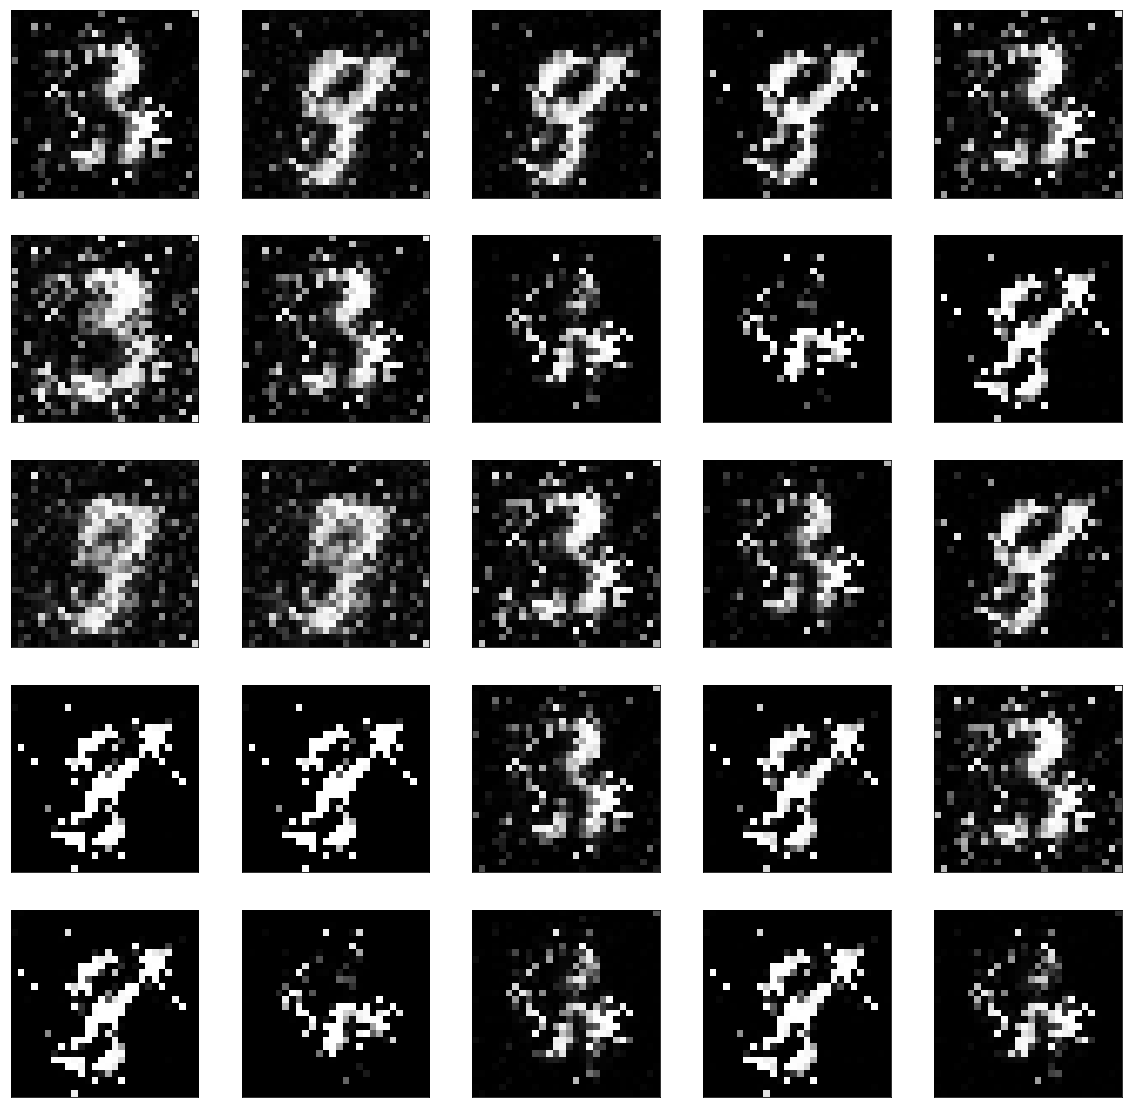

[Epoch 5/10] [Batch 511/938] [Generator loss: 2.059776] [Discriminator loss: 0.202262]
[Epoch 5/10] [Batch 512/938] [Generator loss: 1.851238] [Discriminator loss: 0.182130]
[Epoch 5/10] [Batch 513/938] [Generator loss: 2.014656] [Discriminator loss: 0.176916]
[Epoch 5/10] [Batch 514/938] [Generator loss: 1.879948] [Discriminator loss: 0.236396]
[Epoch 5/10] [Batch 515/938] [Generator loss: 1.379946] [Discriminator loss: 0.256620]
[Epoch 5/10] [Batch 516/938] [Generator loss: 3.098228] [Discriminator loss: 0.461848]
[Epoch 5/10] [Batch 517/938] [Generator loss: 0.299183] [Discriminator loss: 0.757977]
[Epoch 5/10] [Batch 518/938] [Generator loss: 6.768696] [Discriminator loss: 1.109209]
[Epoch 5/10] [Batch 519/938] [Generator loss: 1.834788] [Discriminator loss: 0.203159]
[Epoch 5/10] [Batch 520/938] [Generator loss: 0.547213] [Discriminator loss: 0.511983]
[Epoch 5/10] [Batch 521/938] [Generator loss: 5.466790] [Discriminator loss: 0.648735]
[Epoch 5/10] [Batch 522/938] [Generator los

[Epoch 5/10] [Batch 611/938] [Generator loss: 2.369445] [Discriminator loss: 0.178970]
[Epoch 5/10] [Batch 612/938] [Generator loss: 1.719823] [Discriminator loss: 0.240034]
[Epoch 5/10] [Batch 613/938] [Generator loss: 1.511734] [Discriminator loss: 0.227349]
[Epoch 5/10] [Batch 614/938] [Generator loss: 2.213304] [Discriminator loss: 0.344937]
[Epoch 5/10] [Batch 615/938] [Generator loss: 0.671774] [Discriminator loss: 0.437492]
[Epoch 5/10] [Batch 616/938] [Generator loss: 4.822375] [Discriminator loss: 0.548397]
[Epoch 5/10] [Batch 617/938] [Generator loss: 1.480073] [Discriminator loss: 0.236064]
[Epoch 5/10] [Batch 618/938] [Generator loss: 1.665308] [Discriminator loss: 0.160375]
[Epoch 5/10] [Batch 619/938] [Generator loss: 3.157684] [Discriminator loss: 0.132749]
[Epoch 5/10] [Batch 620/938] [Generator loss: 2.422442] [Discriminator loss: 0.187559]
[Epoch 5/10] [Batch 621/938] [Generator loss: 1.474669] [Discriminator loss: 0.204950]
[Epoch 5/10] [Batch 622/938] [Generator los

[Epoch 5/10] [Batch 707/938] [Generator loss: 0.986230] [Discriminator loss: 0.416245]
[Epoch 5/10] [Batch 708/938] [Generator loss: 4.516056] [Discriminator loss: 0.175331]
[Epoch 5/10] [Batch 709/938] [Generator loss: 3.860392] [Discriminator loss: 0.175385]
[Epoch 5/10] [Batch 710/938] [Generator loss: 1.879032] [Discriminator loss: 0.287225]
[Epoch 5/10] [Batch 711/938] [Generator loss: 4.864093] [Discriminator loss: 0.277789]
[Epoch 5/10] [Batch 712/938] [Generator loss: 3.082373] [Discriminator loss: 0.244983]
[Epoch 5/10] [Batch 713/938] [Generator loss: 1.692466] [Discriminator loss: 0.243931]
[Epoch 5/10] [Batch 714/938] [Generator loss: 4.351415] [Discriminator loss: 0.167337]
[Epoch 5/10] [Batch 715/938] [Generator loss: 3.418436] [Discriminator loss: 0.213429]
[Epoch 5/10] [Batch 716/938] [Generator loss: 1.119047] [Discriminator loss: 0.315078]
[Epoch 5/10] [Batch 717/938] [Generator loss: 5.545879] [Discriminator loss: 0.323297]
[Epoch 5/10] [Batch 718/938] [Generator los

[Epoch 5/10] [Batch 802/938] [Generator loss: 3.319086] [Discriminator loss: 0.146023]
[Epoch 5/10] [Batch 803/938] [Generator loss: 1.443861] [Discriminator loss: 0.208470]
[Epoch 5/10] [Batch 804/938] [Generator loss: 3.048729] [Discriminator loss: 0.279468]
[Epoch 5/10] [Batch 805/938] [Generator loss: 1.292448] [Discriminator loss: 0.312778]
[Epoch 5/10] [Batch 806/938] [Generator loss: 3.686296] [Discriminator loss: 0.241038]
[Epoch 5/10] [Batch 807/938] [Generator loss: 1.633379] [Discriminator loss: 0.214053]
[Epoch 5/10] [Batch 808/938] [Generator loss: 2.070064] [Discriminator loss: 0.226867]
[Epoch 5/10] [Batch 809/938] [Generator loss: 2.062130] [Discriminator loss: 0.271278]
[Epoch 5/10] [Batch 810/938] [Generator loss: 1.447962] [Discriminator loss: 0.220341]
[Epoch 5/10] [Batch 811/938] [Generator loss: 2.821120] [Discriminator loss: 0.173318]
[Epoch 5/10] [Batch 812/938] [Generator loss: 1.965206] [Discriminator loss: 0.222357]
[Epoch 5/10] [Batch 813/938] [Generator los

[Epoch 5/10] [Batch 904/938] [Generator loss: 1.025926] [Discriminator loss: 0.302161]
[Epoch 5/10] [Batch 905/938] [Generator loss: 2.056439] [Discriminator loss: 0.294986]
[Epoch 5/10] [Batch 906/938] [Generator loss: 1.396179] [Discriminator loss: 0.304765]
[Epoch 5/10] [Batch 907/938] [Generator loss: 1.497635] [Discriminator loss: 0.408061]
[Epoch 5/10] [Batch 908/938] [Generator loss: 1.287084] [Discriminator loss: 0.343533]
[Epoch 5/10] [Batch 909/938] [Generator loss: 1.991998] [Discriminator loss: 0.249385]
[Epoch 5/10] [Batch 910/938] [Generator loss: 1.542347] [Discriminator loss: 0.198673]


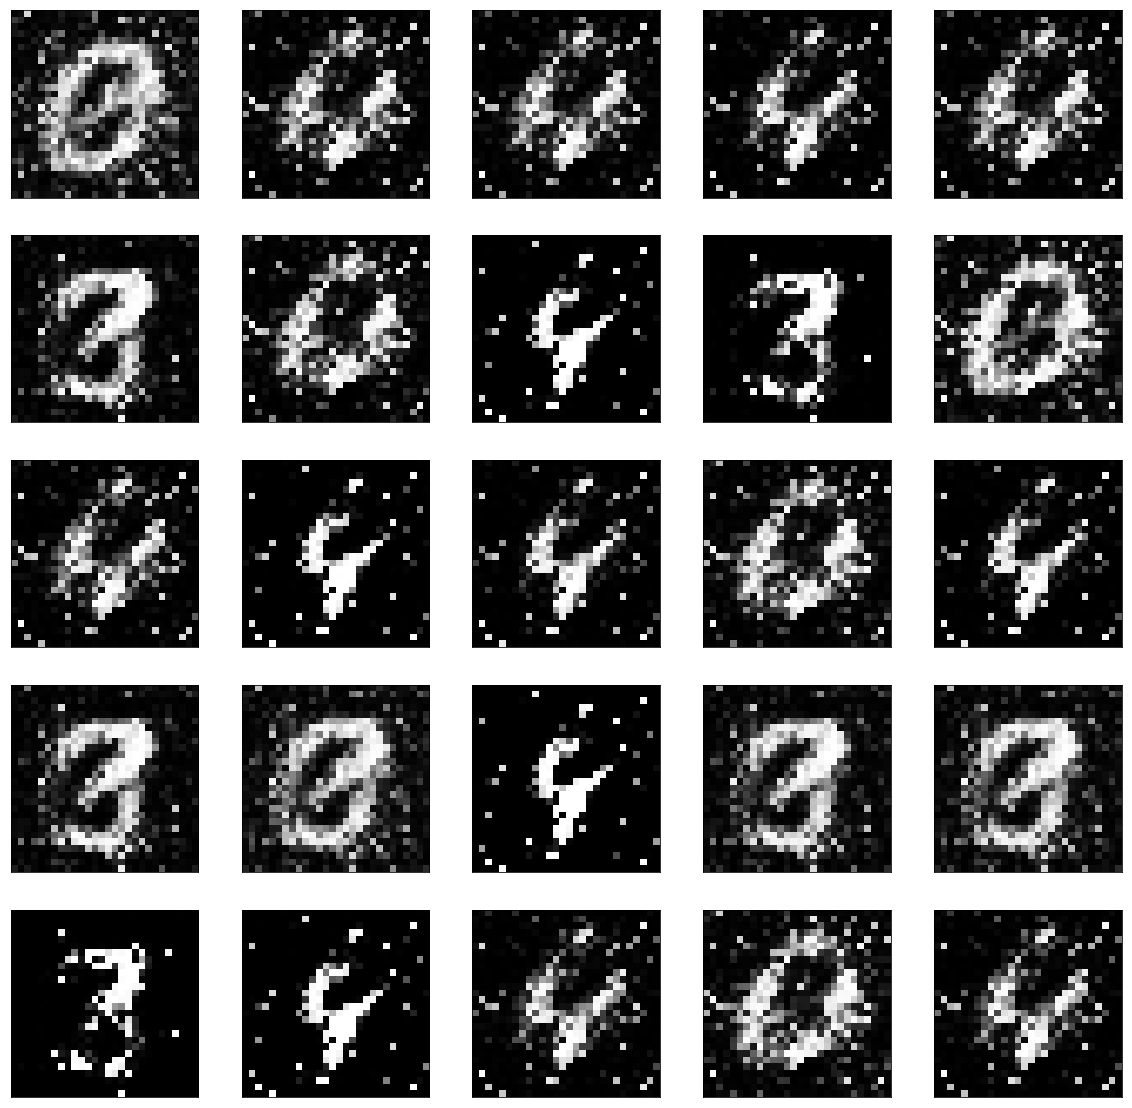

[Epoch 5/10] [Batch 911/938] [Generator loss: 1.959938] [Discriminator loss: 0.198423]
[Epoch 5/10] [Batch 912/938] [Generator loss: 1.735388] [Discriminator loss: 0.256548]
[Epoch 5/10] [Batch 913/938] [Generator loss: 1.387026] [Discriminator loss: 0.271784]
[Epoch 5/10] [Batch 914/938] [Generator loss: 2.014084] [Discriminator loss: 0.403911]
[Epoch 5/10] [Batch 915/938] [Generator loss: 0.744041] [Discriminator loss: 0.449088]
[Epoch 5/10] [Batch 916/938] [Generator loss: 3.555277] [Discriminator loss: 0.327207]
[Epoch 5/10] [Batch 917/938] [Generator loss: 1.849689] [Discriminator loss: 0.253996]
[Epoch 5/10] [Batch 918/938] [Generator loss: 0.786939] [Discriminator loss: 0.402465]
[Epoch 5/10] [Batch 919/938] [Generator loss: 4.006752] [Discriminator loss: 0.445352]
[Epoch 5/10] [Batch 920/938] [Generator loss: 1.828439] [Discriminator loss: 0.269734]
[Epoch 5/10] [Batch 921/938] [Generator loss: 0.944951] [Discriminator loss: 0.336199]
[Epoch 5/10] [Batch 922/938] [Generator los

[Epoch 6/10] [Batch 73/938] [Generator loss: 2.802730] [Discriminator loss: 0.244415]
[Epoch 6/10] [Batch 74/938] [Generator loss: 0.959608] [Discriminator loss: 0.414420]
[Epoch 6/10] [Batch 75/938] [Generator loss: 3.298161] [Discriminator loss: 0.344002]
[Epoch 6/10] [Batch 76/938] [Generator loss: 1.640310] [Discriminator loss: 0.276692]
[Epoch 6/10] [Batch 77/938] [Generator loss: 2.231719] [Discriminator loss: 0.128665]
[Epoch 6/10] [Batch 78/938] [Generator loss: 2.419445] [Discriminator loss: 0.170304]
[Epoch 6/10] [Batch 79/938] [Generator loss: 1.502815] [Discriminator loss: 0.180406]
[Epoch 6/10] [Batch 80/938] [Generator loss: 2.405693] [Discriminator loss: 0.233522]
[Epoch 6/10] [Batch 81/938] [Generator loss: 1.213437] [Discriminator loss: 0.275160]
[Epoch 6/10] [Batch 82/938] [Generator loss: 2.488407] [Discriminator loss: 0.275070]
[Epoch 6/10] [Batch 83/938] [Generator loss: 1.074126] [Discriminator loss: 0.281224]
[Epoch 6/10] [Batch 84/938] [Generator loss: 3.199531]

[Epoch 6/10] [Batch 177/938] [Generator loss: 1.622766] [Discriminator loss: 0.262076]
[Epoch 6/10] [Batch 178/938] [Generator loss: 1.302824] [Discriminator loss: 0.247065]
[Epoch 6/10] [Batch 179/938] [Generator loss: 2.966496] [Discriminator loss: 0.362385]
[Epoch 6/10] [Batch 180/938] [Generator loss: 0.568318] [Discriminator loss: 0.563201]
[Epoch 6/10] [Batch 181/938] [Generator loss: 5.486914] [Discriminator loss: 0.693890]
[Epoch 6/10] [Batch 182/938] [Generator loss: 1.785807] [Discriminator loss: 0.167595]
[Epoch 6/10] [Batch 183/938] [Generator loss: 1.730011] [Discriminator loss: 0.191925]
[Epoch 6/10] [Batch 184/938] [Generator loss: 2.520329] [Discriminator loss: 0.086220]
[Epoch 6/10] [Batch 185/938] [Generator loss: 2.818326] [Discriminator loss: 0.250123]
[Epoch 6/10] [Batch 186/938] [Generator loss: 0.969344] [Discriminator loss: 0.296660]
[Epoch 6/10] [Batch 187/938] [Generator loss: 3.502273] [Discriminator loss: 0.267844]
[Epoch 6/10] [Batch 188/938] [Generator los

[Epoch 6/10] [Batch 272/938] [Generator loss: 1.165723] [Discriminator loss: 0.254879]
[Epoch 6/10] [Batch 273/938] [Generator loss: 2.518242] [Discriminator loss: 0.167252]
[Epoch 6/10] [Batch 274/938] [Generator loss: 2.186116] [Discriminator loss: 0.149073]
[Epoch 6/10] [Batch 275/938] [Generator loss: 1.801352] [Discriminator loss: 0.196569]
[Epoch 6/10] [Batch 276/938] [Generator loss: 2.312569] [Discriminator loss: 0.187228]
[Epoch 6/10] [Batch 277/938] [Generator loss: 1.417708] [Discriminator loss: 0.267113]
[Epoch 6/10] [Batch 278/938] [Generator loss: 2.095043] [Discriminator loss: 0.234770]
[Epoch 6/10] [Batch 279/938] [Generator loss: 1.647652] [Discriminator loss: 0.230224]
[Epoch 6/10] [Batch 280/938] [Generator loss: 2.282599] [Discriminator loss: 0.231174]
[Epoch 6/10] [Batch 281/938] [Generator loss: 1.262413] [Discriminator loss: 0.332579]
[Epoch 6/10] [Batch 282/938] [Generator loss: 2.332518] [Discriminator loss: 0.243151]
[Epoch 6/10] [Batch 283/938] [Generator los

[Epoch 6/10] [Batch 372/938] [Generator loss: 1.626866] [Discriminator loss: 0.201038]


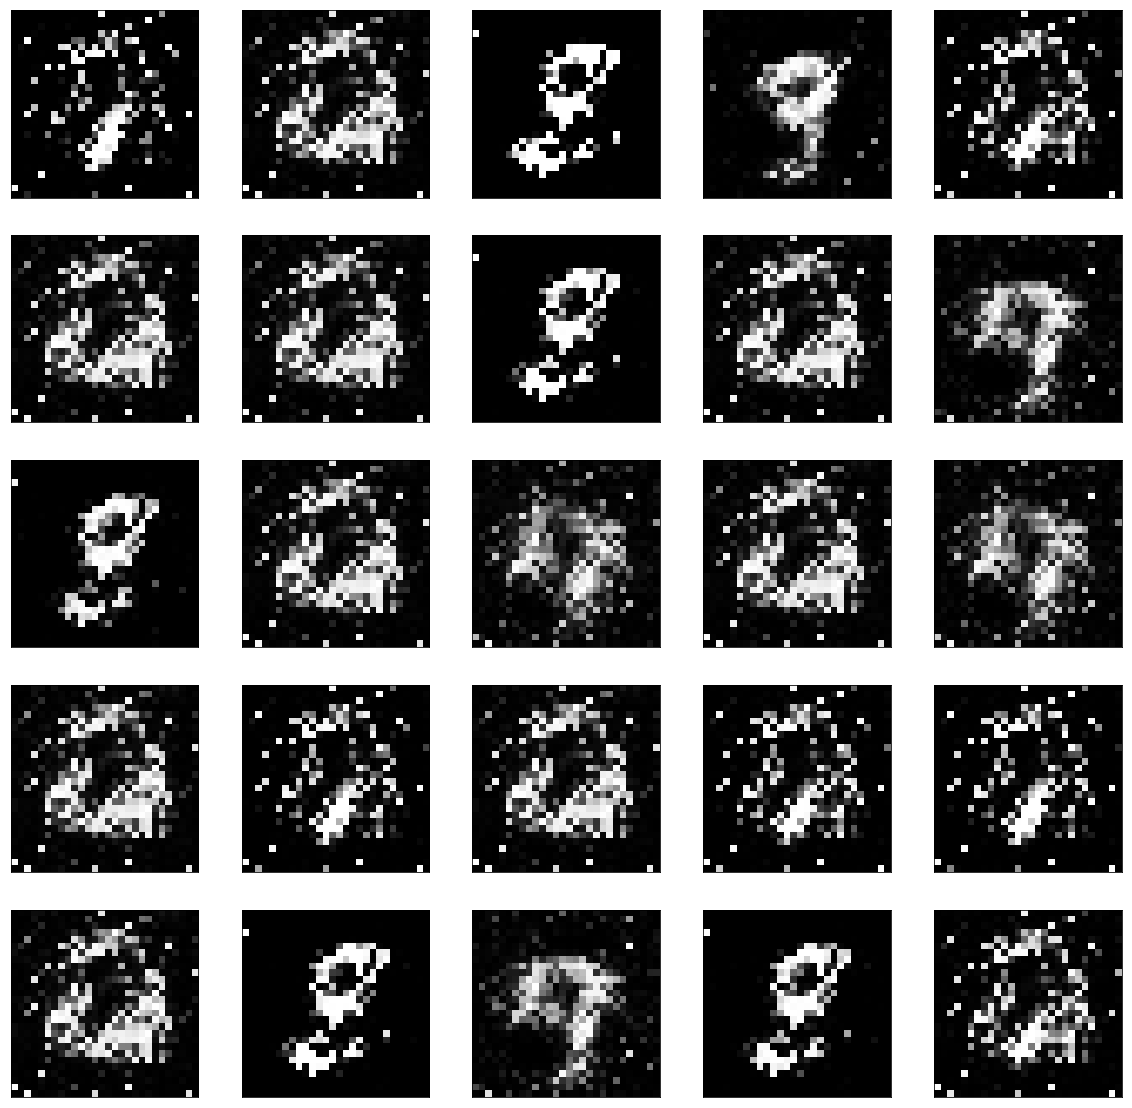

[Epoch 6/10] [Batch 373/938] [Generator loss: 1.886455] [Discriminator loss: 0.183564]
[Epoch 6/10] [Batch 374/938] [Generator loss: 2.152972] [Discriminator loss: 0.190866]
[Epoch 6/10] [Batch 375/938] [Generator loss: 1.801355] [Discriminator loss: 0.172553]
[Epoch 6/10] [Batch 376/938] [Generator loss: 2.237190] [Discriminator loss: 0.169562]
[Epoch 6/10] [Batch 377/938] [Generator loss: 1.866422] [Discriminator loss: 0.158301]
[Epoch 6/10] [Batch 378/938] [Generator loss: 2.501027] [Discriminator loss: 0.170672]
[Epoch 6/10] [Batch 379/938] [Generator loss: 1.755940] [Discriminator loss: 0.191726]
[Epoch 6/10] [Batch 380/938] [Generator loss: 1.908806] [Discriminator loss: 0.178932]
[Epoch 6/10] [Batch 381/938] [Generator loss: 2.664761] [Discriminator loss: 0.213467]
[Epoch 6/10] [Batch 382/938] [Generator loss: 0.911122] [Discriminator loss: 0.363078]
[Epoch 6/10] [Batch 383/938] [Generator loss: 4.510817] [Discriminator loss: 0.465075]
[Epoch 6/10] [Batch 384/938] [Generator los

[Epoch 6/10] [Batch 475/938] [Generator loss: 1.726638] [Discriminator loss: 0.171808]
[Epoch 6/10] [Batch 476/938] [Generator loss: 2.461578] [Discriminator loss: 0.233172]
[Epoch 6/10] [Batch 477/938] [Generator loss: 1.471511] [Discriminator loss: 0.199360]
[Epoch 6/10] [Batch 478/938] [Generator loss: 2.789033] [Discriminator loss: 0.329063]
[Epoch 6/10] [Batch 479/938] [Generator loss: 0.615330] [Discriminator loss: 0.471383]
[Epoch 6/10] [Batch 480/938] [Generator loss: 6.019129] [Discriminator loss: 0.960286]
[Epoch 6/10] [Batch 481/938] [Generator loss: 0.721900] [Discriminator loss: 0.420878]
[Epoch 6/10] [Batch 482/938] [Generator loss: 3.317692] [Discriminator loss: 0.203806]
[Epoch 6/10] [Batch 483/938] [Generator loss: 2.376274] [Discriminator loss: 0.177960]
[Epoch 6/10] [Batch 484/938] [Generator loss: 1.166016] [Discriminator loss: 0.280517]
[Epoch 6/10] [Batch 485/938] [Generator loss: 2.901686] [Discriminator loss: 0.295075]
[Epoch 6/10] [Batch 486/938] [Generator los

[Epoch 6/10] [Batch 571/938] [Generator loss: 1.211478] [Discriminator loss: 0.293517]
[Epoch 6/10] [Batch 572/938] [Generator loss: 2.325466] [Discriminator loss: 0.241733]
[Epoch 6/10] [Batch 573/938] [Generator loss: 2.021294] [Discriminator loss: 0.272734]
[Epoch 6/10] [Batch 574/938] [Generator loss: 0.986756] [Discriminator loss: 0.307672]
[Epoch 6/10] [Batch 575/938] [Generator loss: 3.592014] [Discriminator loss: 0.399314]
[Epoch 6/10] [Batch 576/938] [Generator loss: 1.013344] [Discriminator loss: 0.277146]
[Epoch 6/10] [Batch 577/938] [Generator loss: 2.489310] [Discriminator loss: 0.284999]
[Epoch 6/10] [Batch 578/938] [Generator loss: 1.149228] [Discriminator loss: 0.342676]
[Epoch 6/10] [Batch 579/938] [Generator loss: 2.108314] [Discriminator loss: 0.232211]
[Epoch 6/10] [Batch 580/938] [Generator loss: 1.961393] [Discriminator loss: 0.269549]
[Epoch 6/10] [Batch 581/938] [Generator loss: 1.200967] [Discriminator loss: 0.313277]
[Epoch 6/10] [Batch 582/938] [Generator los

[Epoch 6/10] [Batch 673/938] [Generator loss: 5.091023] [Discriminator loss: 0.353738]
[Epoch 6/10] [Batch 674/938] [Generator loss: 3.341676] [Discriminator loss: 0.196844]
[Epoch 6/10] [Batch 675/938] [Generator loss: 0.534134] [Discriminator loss: 0.481120]
[Epoch 6/10] [Batch 676/938] [Generator loss: 5.113790] [Discriminator loss: 0.572664]
[Epoch 6/10] [Batch 677/938] [Generator loss: 1.793103] [Discriminator loss: 0.249712]
[Epoch 6/10] [Batch 678/938] [Generator loss: 0.486087] [Discriminator loss: 0.525914]
[Epoch 6/10] [Batch 679/938] [Generator loss: 6.295373] [Discriminator loss: 0.907361]
[Epoch 6/10] [Batch 680/938] [Generator loss: 2.405010] [Discriminator loss: 0.285956]
[Epoch 6/10] [Batch 681/938] [Generator loss: 0.145537] [Discriminator loss: 1.071603]
[Epoch 6/10] [Batch 682/938] [Generator loss: 6.844651] [Discriminator loss: 0.979511]
[Epoch 6/10] [Batch 683/938] [Generator loss: 3.943721] [Discriminator loss: 0.340390]
[Epoch 6/10] [Batch 684/938] [Generator los

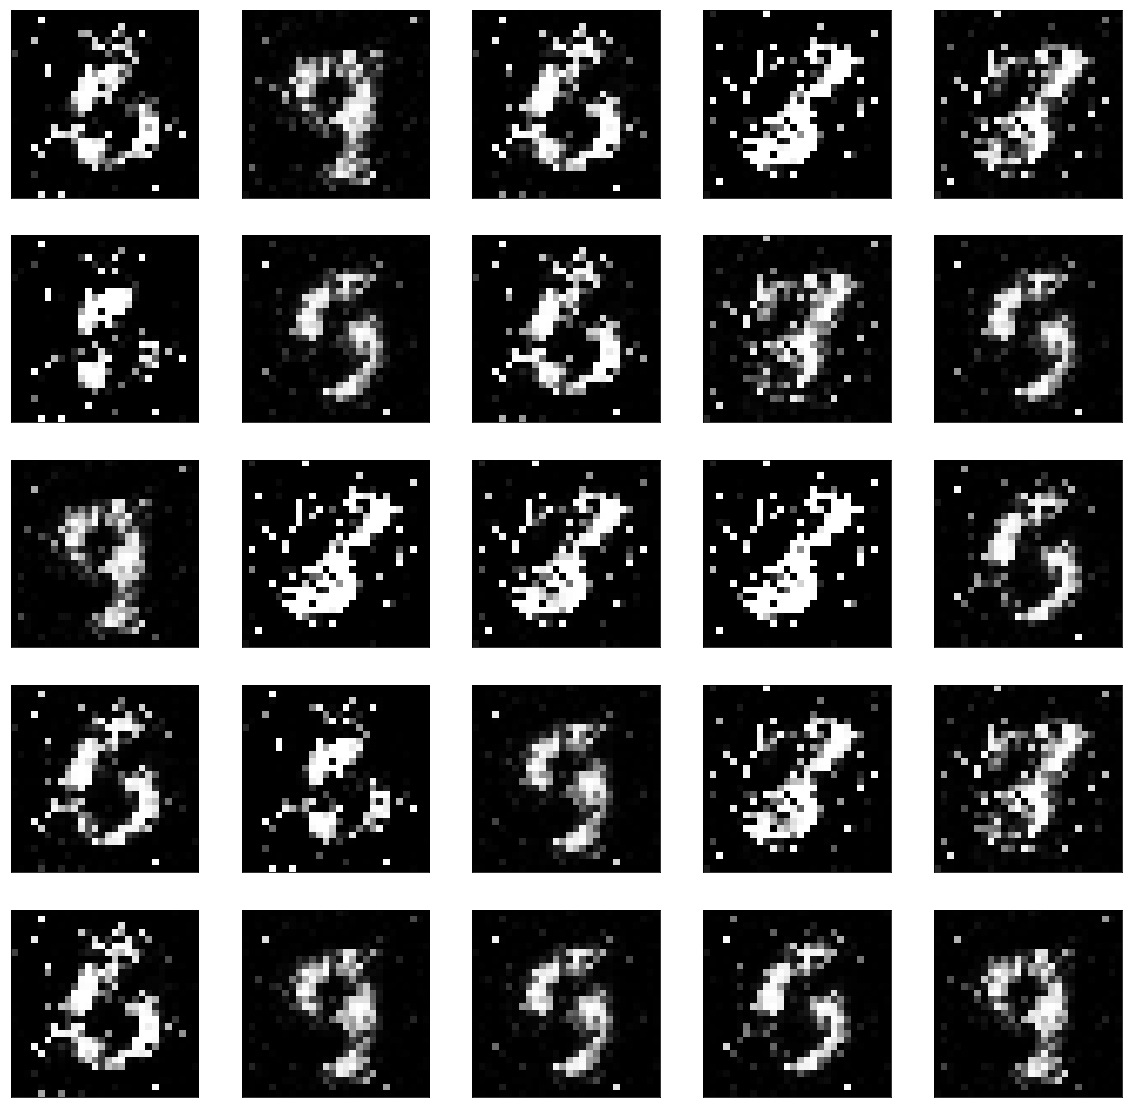

[Epoch 6/10] [Batch 773/938] [Generator loss: 1.896916] [Discriminator loss: 0.196592]
[Epoch 6/10] [Batch 774/938] [Generator loss: 2.226492] [Discriminator loss: 0.136839]
[Epoch 6/10] [Batch 775/938] [Generator loss: 2.848618] [Discriminator loss: 0.187756]
[Epoch 6/10] [Batch 776/938] [Generator loss: 1.608264] [Discriminator loss: 0.278250]
[Epoch 6/10] [Batch 777/938] [Generator loss: 2.391779] [Discriminator loss: 0.198459]
[Epoch 6/10] [Batch 778/938] [Generator loss: 1.771035] [Discriminator loss: 0.216779]
[Epoch 6/10] [Batch 779/938] [Generator loss: 1.877134] [Discriminator loss: 0.291619]
[Epoch 6/10] [Batch 780/938] [Generator loss: 1.671607] [Discriminator loss: 0.208125]
[Epoch 6/10] [Batch 781/938] [Generator loss: 2.654016] [Discriminator loss: 0.239341]
[Epoch 6/10] [Batch 782/938] [Generator loss: 1.429487] [Discriminator loss: 0.239864]
[Epoch 6/10] [Batch 783/938] [Generator loss: 2.862378] [Discriminator loss: 0.191885]
[Epoch 6/10] [Batch 784/938] [Generator los

[Epoch 6/10] [Batch 871/938] [Generator loss: 0.354325] [Discriminator loss: 0.839049]
[Epoch 6/10] [Batch 872/938] [Generator loss: 5.150291] [Discriminator loss: 0.669482]
[Epoch 6/10] [Batch 873/938] [Generator loss: 1.731181] [Discriminator loss: 0.301366]
[Epoch 6/10] [Batch 874/938] [Generator loss: 1.816739] [Discriminator loss: 0.222206]
[Epoch 6/10] [Batch 875/938] [Generator loss: 2.371290] [Discriminator loss: 0.242503]
[Epoch 6/10] [Batch 876/938] [Generator loss: 1.734920] [Discriminator loss: 0.255610]
[Epoch 6/10] [Batch 877/938] [Generator loss: 1.949501] [Discriminator loss: 0.221535]
[Epoch 6/10] [Batch 878/938] [Generator loss: 2.191139] [Discriminator loss: 0.266087]
[Epoch 6/10] [Batch 879/938] [Generator loss: 1.194952] [Discriminator loss: 0.292958]
[Epoch 6/10] [Batch 880/938] [Generator loss: 2.842479] [Discriminator loss: 0.344034]
[Epoch 6/10] [Batch 881/938] [Generator loss: 0.695346] [Discriminator loss: 0.451286]
[Epoch 6/10] [Batch 882/938] [Generator los

[Epoch 7/10] [Batch 36/938] [Generator loss: 2.357037] [Discriminator loss: 0.113667]
[Epoch 7/10] [Batch 37/938] [Generator loss: 2.365185] [Discriminator loss: 0.150532]
[Epoch 7/10] [Batch 38/938] [Generator loss: 2.383737] [Discriminator loss: 0.164174]
[Epoch 7/10] [Batch 39/938] [Generator loss: 1.657804] [Discriminator loss: 0.219207]
[Epoch 7/10] [Batch 40/938] [Generator loss: 2.462013] [Discriminator loss: 0.207865]
[Epoch 7/10] [Batch 41/938] [Generator loss: 1.920232] [Discriminator loss: 0.152870]
[Epoch 7/10] [Batch 42/938] [Generator loss: 2.201513] [Discriminator loss: 0.232776]
[Epoch 7/10] [Batch 43/938] [Generator loss: 1.547599] [Discriminator loss: 0.268862]
[Epoch 7/10] [Batch 44/938] [Generator loss: 2.262465] [Discriminator loss: 0.161345]
[Epoch 7/10] [Batch 45/938] [Generator loss: 2.363607] [Discriminator loss: 0.162633]
[Epoch 7/10] [Batch 46/938] [Generator loss: 1.683818] [Discriminator loss: 0.241845]
[Epoch 7/10] [Batch 47/938] [Generator loss: 1.917122]

[Epoch 7/10] [Batch 135/938] [Generator loss: 1.526468] [Discriminator loss: 0.238184]
[Epoch 7/10] [Batch 136/938] [Generator loss: 2.323057] [Discriminator loss: 0.281451]
[Epoch 7/10] [Batch 137/938] [Generator loss: 0.797248] [Discriminator loss: 0.398756]
[Epoch 7/10] [Batch 138/938] [Generator loss: 5.386702] [Discriminator loss: 0.693154]
[Epoch 7/10] [Batch 139/938] [Generator loss: 0.932263] [Discriminator loss: 0.334906]
[Epoch 7/10] [Batch 140/938] [Generator loss: 2.696663] [Discriminator loss: 0.152732]
[Epoch 7/10] [Batch 141/938] [Generator loss: 2.703441] [Discriminator loss: 0.148015]
[Epoch 7/10] [Batch 142/938] [Generator loss: 1.543592] [Discriminator loss: 0.175227]
[Epoch 7/10] [Batch 143/938] [Generator loss: 2.872922] [Discriminator loss: 0.190001]
[Epoch 7/10] [Batch 144/938] [Generator loss: 1.916586] [Discriminator loss: 0.226643]
[Epoch 7/10] [Batch 145/938] [Generator loss: 1.845312] [Discriminator loss: 0.155369]
[Epoch 7/10] [Batch 146/938] [Generator los

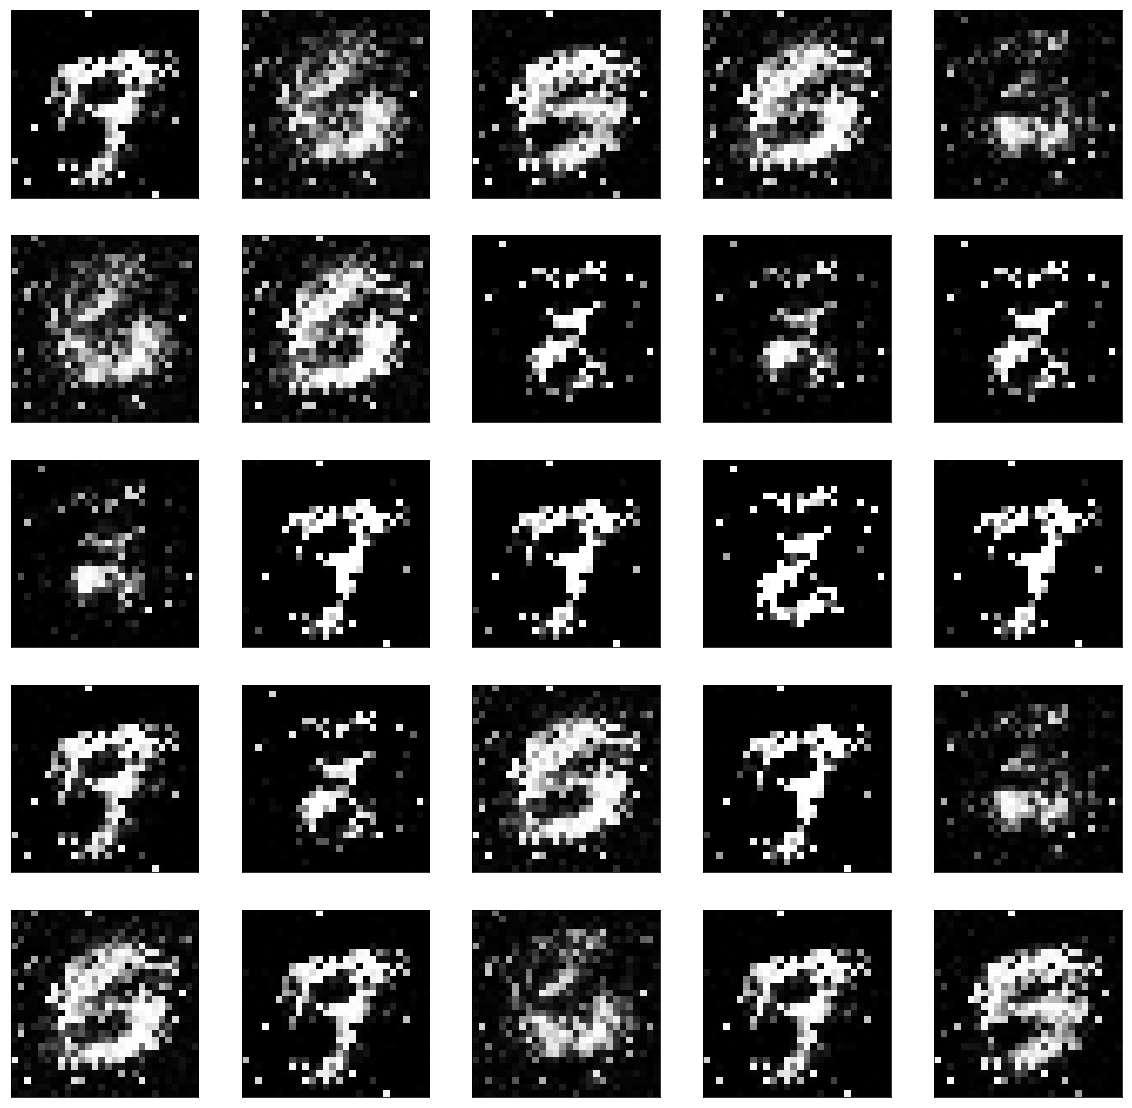

[Epoch 7/10] [Batch 235/938] [Generator loss: 1.033927] [Discriminator loss: 0.365628]
[Epoch 7/10] [Batch 236/938] [Generator loss: 2.190185] [Discriminator loss: 0.244525]
[Epoch 7/10] [Batch 237/938] [Generator loss: 1.861091] [Discriminator loss: 0.199158]
[Epoch 7/10] [Batch 238/938] [Generator loss: 1.812892] [Discriminator loss: 0.232258]
[Epoch 7/10] [Batch 239/938] [Generator loss: 2.263967] [Discriminator loss: 0.352705]
[Epoch 7/10] [Batch 240/938] [Generator loss: 0.770605] [Discriminator loss: 0.412618]
[Epoch 7/10] [Batch 241/938] [Generator loss: 4.088072] [Discriminator loss: 0.335736]
[Epoch 7/10] [Batch 242/938] [Generator loss: 2.434400] [Discriminator loss: 0.194483]
[Epoch 7/10] [Batch 243/938] [Generator loss: 1.044219] [Discriminator loss: 0.335280]
[Epoch 7/10] [Batch 244/938] [Generator loss: 2.940656] [Discriminator loss: 0.351050]
[Epoch 7/10] [Batch 245/938] [Generator loss: 0.946399] [Discriminator loss: 0.428357]
[Epoch 7/10] [Batch 246/938] [Generator los

[Epoch 7/10] [Batch 338/938] [Generator loss: 2.915962] [Discriminator loss: 0.136646]
[Epoch 7/10] [Batch 339/938] [Generator loss: 2.231467] [Discriminator loss: 0.148189]
[Epoch 7/10] [Batch 340/938] [Generator loss: 1.746317] [Discriminator loss: 0.250616]
[Epoch 7/10] [Batch 341/938] [Generator loss: 1.854260] [Discriminator loss: 0.258362]
[Epoch 7/10] [Batch 342/938] [Generator loss: 1.563936] [Discriminator loss: 0.240809]
[Epoch 7/10] [Batch 343/938] [Generator loss: 2.243542] [Discriminator loss: 0.177281]
[Epoch 7/10] [Batch 344/938] [Generator loss: 1.571538] [Discriminator loss: 0.204486]
[Epoch 7/10] [Batch 345/938] [Generator loss: 2.484603] [Discriminator loss: 0.258647]
[Epoch 7/10] [Batch 346/938] [Generator loss: 1.192576] [Discriminator loss: 0.271130]
[Epoch 7/10] [Batch 347/938] [Generator loss: 3.720282] [Discriminator loss: 0.328713]
[Epoch 7/10] [Batch 348/938] [Generator loss: 0.955007] [Discriminator loss: 0.347791]
[Epoch 7/10] [Batch 349/938] [Generator los

[Epoch 7/10] [Batch 440/938] [Generator loss: 3.524067] [Discriminator loss: 0.215739]
[Epoch 7/10] [Batch 441/938] [Generator loss: 1.656601] [Discriminator loss: 0.156619]
[Epoch 7/10] [Batch 442/938] [Generator loss: 3.211166] [Discriminator loss: 0.154079]
[Epoch 7/10] [Batch 443/938] [Generator loss: 1.809713] [Discriminator loss: 0.165759]
[Epoch 7/10] [Batch 444/938] [Generator loss: 2.546979] [Discriminator loss: 0.142162]
[Epoch 7/10] [Batch 445/938] [Generator loss: 2.425223] [Discriminator loss: 0.228934]
[Epoch 7/10] [Batch 446/938] [Generator loss: 1.012258] [Discriminator loss: 0.293315]
[Epoch 7/10] [Batch 447/938] [Generator loss: 6.394725] [Discriminator loss: 0.559827]
[Epoch 7/10] [Batch 448/938] [Generator loss: 2.410439] [Discriminator loss: 0.193948]
[Epoch 7/10] [Batch 449/938] [Generator loss: 1.530532] [Discriminator loss: 0.191055]
[Epoch 7/10] [Batch 450/938] [Generator loss: 3.851635] [Discriminator loss: 0.111462]
[Epoch 7/10] [Batch 451/938] [Generator los

[Epoch 7/10] [Batch 543/938] [Generator loss: 0.997967] [Discriminator loss: 0.319345]
[Epoch 7/10] [Batch 544/938] [Generator loss: 5.176788] [Discriminator loss: 0.400793]
[Epoch 7/10] [Batch 545/938] [Generator loss: 2.459565] [Discriminator loss: 0.208913]
[Epoch 7/10] [Batch 546/938] [Generator loss: 2.293506] [Discriminator loss: 0.173177]
[Epoch 7/10] [Batch 547/938] [Generator loss: 2.322241] [Discriminator loss: 0.115781]
[Epoch 7/10] [Batch 548/938] [Generator loss: 2.576073] [Discriminator loss: 0.201746]
[Epoch 7/10] [Batch 549/938] [Generator loss: 1.672529] [Discriminator loss: 0.177730]
[Epoch 7/10] [Batch 550/938] [Generator loss: 3.162805] [Discriminator loss: 0.229240]
[Epoch 7/10] [Batch 551/938] [Generator loss: 1.593121] [Discriminator loss: 0.247692]
[Epoch 7/10] [Batch 552/938] [Generator loss: 2.666193] [Discriminator loss: 0.244095]
[Epoch 7/10] [Batch 553/938] [Generator loss: 0.969666] [Discriminator loss: 0.343894]
[Epoch 7/10] [Batch 554/938] [Generator los

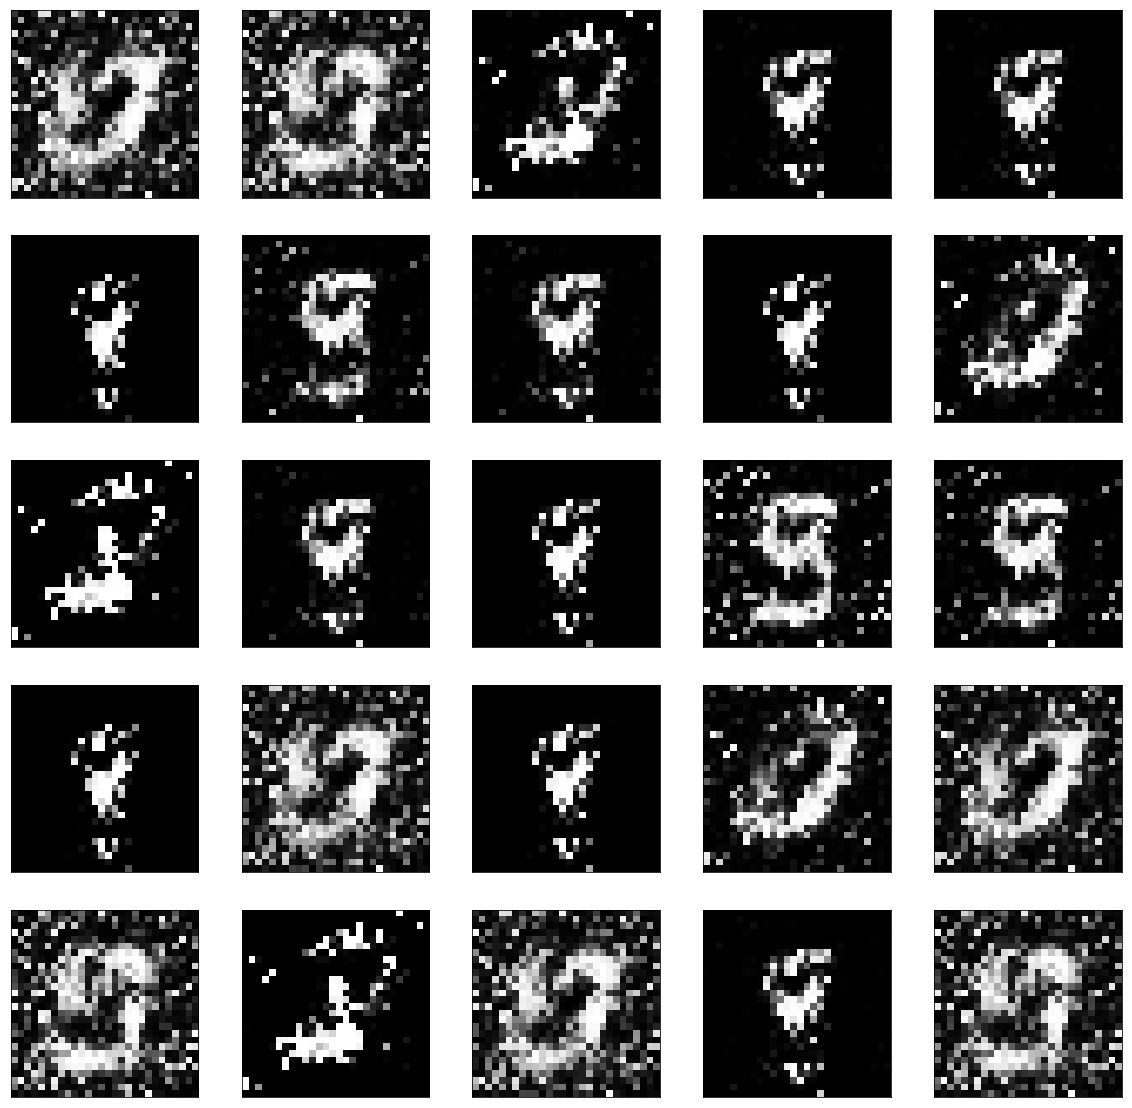

[Epoch 7/10] [Batch 635/938] [Generator loss: 1.266179] [Discriminator loss: 0.297664]
[Epoch 7/10] [Batch 636/938] [Generator loss: 2.052620] [Discriminator loss: 0.177475]
[Epoch 7/10] [Batch 637/938] [Generator loss: 2.243646] [Discriminator loss: 0.179487]
[Epoch 7/10] [Batch 638/938] [Generator loss: 1.767813] [Discriminator loss: 0.250034]
[Epoch 7/10] [Batch 639/938] [Generator loss: 1.700387] [Discriminator loss: 0.325187]
[Epoch 7/10] [Batch 640/938] [Generator loss: 1.431105] [Discriminator loss: 0.319843]
[Epoch 7/10] [Batch 641/938] [Generator loss: 2.494941] [Discriminator loss: 0.237214]
[Epoch 7/10] [Batch 642/938] [Generator loss: 0.960193] [Discriminator loss: 0.301668]
[Epoch 7/10] [Batch 643/938] [Generator loss: 4.200068] [Discriminator loss: 0.470596]
[Epoch 7/10] [Batch 644/938] [Generator loss: 1.244653] [Discriminator loss: 0.268455]
[Epoch 7/10] [Batch 645/938] [Generator loss: 1.850368] [Discriminator loss: 0.167356]
[Epoch 7/10] [Batch 646/938] [Generator los

[Epoch 7/10] [Batch 734/938] [Generator loss: 2.388802] [Discriminator loss: 0.105424]
[Epoch 7/10] [Batch 735/938] [Generator loss: 1.718102] [Discriminator loss: 0.150908]
[Epoch 7/10] [Batch 736/938] [Generator loss: 3.193251] [Discriminator loss: 0.130592]
[Epoch 7/10] [Batch 737/938] [Generator loss: 2.027781] [Discriminator loss: 0.191199]
[Epoch 7/10] [Batch 738/938] [Generator loss: 1.680194] [Discriminator loss: 0.219797]
[Epoch 7/10] [Batch 739/938] [Generator loss: 2.787110] [Discriminator loss: 0.170106]
[Epoch 7/10] [Batch 740/938] [Generator loss: 1.953826] [Discriminator loss: 0.183730]
[Epoch 7/10] [Batch 741/938] [Generator loss: 2.345407] [Discriminator loss: 0.149701]
[Epoch 7/10] [Batch 742/938] [Generator loss: 2.134505] [Discriminator loss: 0.137391]
[Epoch 7/10] [Batch 743/938] [Generator loss: 2.780132] [Discriminator loss: 0.198508]
[Epoch 7/10] [Batch 744/938] [Generator loss: 1.093921] [Discriminator loss: 0.260745]
[Epoch 7/10] [Batch 745/938] [Generator los

[Epoch 7/10] [Batch 830/938] [Generator loss: 4.087756] [Discriminator loss: 0.211804]
[Epoch 7/10] [Batch 831/938] [Generator loss: 2.514841] [Discriminator loss: 0.178746]
[Epoch 7/10] [Batch 832/938] [Generator loss: 1.003534] [Discriminator loss: 0.333052]
[Epoch 7/10] [Batch 833/938] [Generator loss: 4.821805] [Discriminator loss: 0.647902]
[Epoch 7/10] [Batch 834/938] [Generator loss: 1.172878] [Discriminator loss: 0.301445]
[Epoch 7/10] [Batch 835/938] [Generator loss: 3.558843] [Discriminator loss: 0.137380]
[Epoch 7/10] [Batch 836/938] [Generator loss: 3.236576] [Discriminator loss: 0.228739]
[Epoch 7/10] [Batch 837/938] [Generator loss: 0.838457] [Discriminator loss: 0.359938]
[Epoch 7/10] [Batch 838/938] [Generator loss: 5.082639] [Discriminator loss: 0.445715]
[Epoch 7/10] [Batch 839/938] [Generator loss: 2.689645] [Discriminator loss: 0.190569]
[Epoch 7/10] [Batch 840/938] [Generator loss: 1.831887] [Discriminator loss: 0.236635]
[Epoch 7/10] [Batch 841/938] [Generator los

[Epoch 7/10] [Batch 931/938] [Generator loss: 2.702964] [Discriminator loss: 0.410674]
[Epoch 7/10] [Batch 932/938] [Generator loss: 0.443058] [Discriminator loss: 0.597785]
[Epoch 7/10] [Batch 933/938] [Generator loss: 6.552883] [Discriminator loss: 0.972667]
[Epoch 7/10] [Batch 934/938] [Generator loss: 2.066076] [Discriminator loss: 0.141523]
[Epoch 7/10] [Batch 935/938] [Generator loss: 1.043449] [Discriminator loss: 0.273956]
[Epoch 7/10] [Batch 936/938] [Generator loss: 4.510633] [Discriminator loss: 0.111100]
[Epoch 7/10] [Batch 937/938] [Generator loss: 4.132390] [Discriminator loss: 0.074547]
[Epoch 8/10] [Batch 0/938] [Generator loss: 2.493030] [Discriminator loss: 0.110558]
[Epoch 8/10] [Batch 1/938] [Generator loss: 1.447197] [Discriminator loss: 0.236055]
[Epoch 8/10] [Batch 2/938] [Generator loss: 3.666630] [Discriminator loss: 0.302955]
[Epoch 8/10] [Batch 3/938] [Generator loss: 1.511266] [Discriminator loss: 0.239901]
[Epoch 8/10] [Batch 4/938] [Generator loss: 2.13881

[Epoch 8/10] [Batch 95/938] [Generator loss: 0.739802] [Discriminator loss: 0.480765]
[Epoch 8/10] [Batch 96/938] [Generator loss: 3.935614] [Discriminator loss: 0.356416]


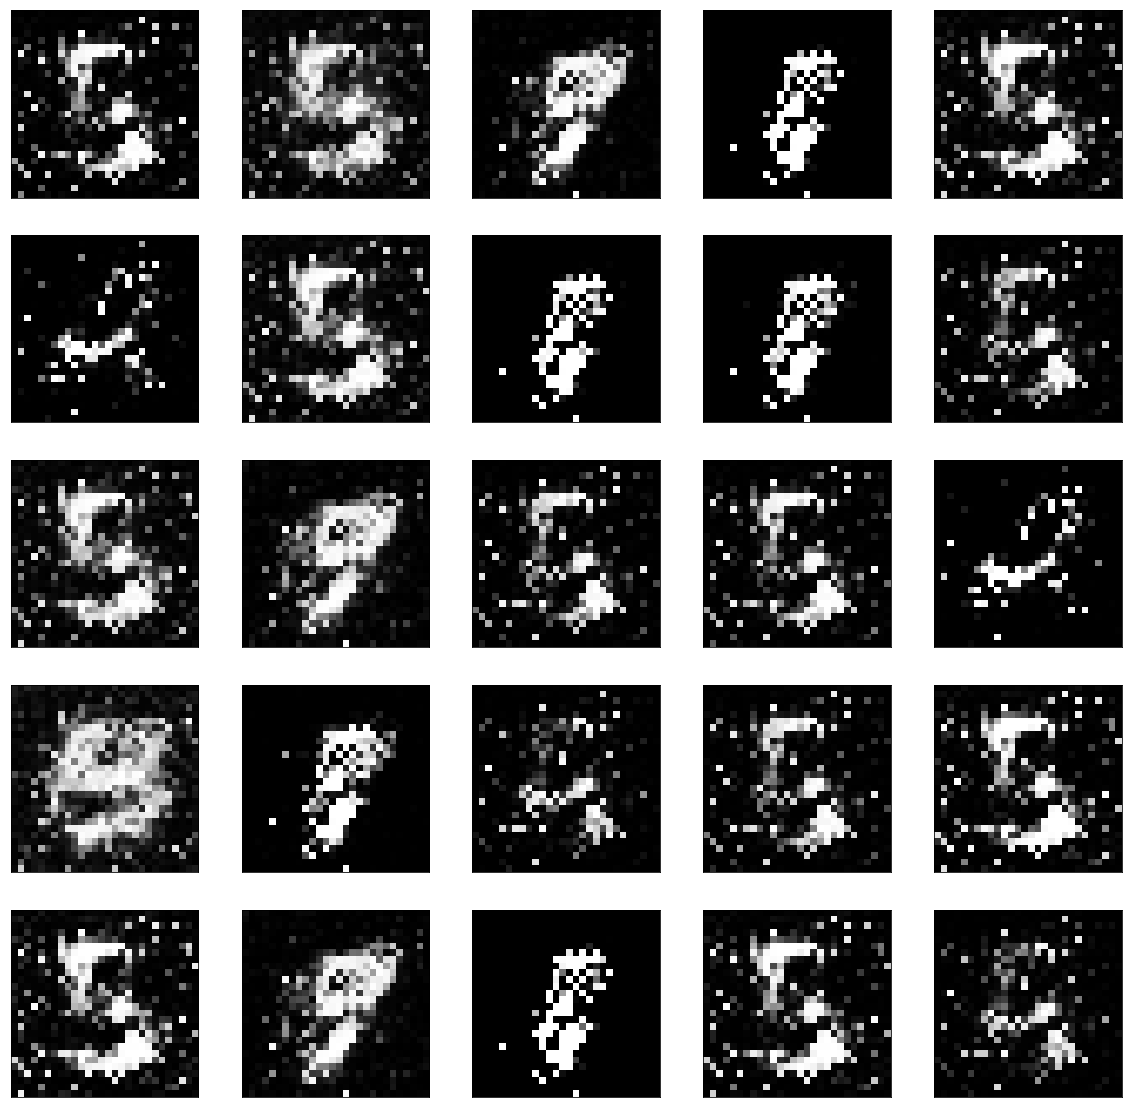

[Epoch 8/10] [Batch 97/938] [Generator loss: 1.644244] [Discriminator loss: 0.182800]
[Epoch 8/10] [Batch 98/938] [Generator loss: 2.044874] [Discriminator loss: 0.260402]
[Epoch 8/10] [Batch 99/938] [Generator loss: 1.188029] [Discriminator loss: 0.322363]
[Epoch 8/10] [Batch 100/938] [Generator loss: 2.784353] [Discriminator loss: 0.237280]
[Epoch 8/10] [Batch 101/938] [Generator loss: 1.334430] [Discriminator loss: 0.248107]
[Epoch 8/10] [Batch 102/938] [Generator loss: 2.708395] [Discriminator loss: 0.388234]
[Epoch 8/10] [Batch 103/938] [Generator loss: 0.463306] [Discriminator loss: 0.580017]
[Epoch 8/10] [Batch 104/938] [Generator loss: 6.793928] [Discriminator loss: 0.934347]
[Epoch 8/10] [Batch 105/938] [Generator loss: 2.416316] [Discriminator loss: 0.219260]
[Epoch 8/10] [Batch 106/938] [Generator loss: 0.452689] [Discriminator loss: 0.620856]
[Epoch 8/10] [Batch 107/938] [Generator loss: 6.422534] [Discriminator loss: 0.697990]
[Epoch 8/10] [Batch 108/938] [Generator loss: 

[Epoch 8/10] [Batch 193/938] [Generator loss: 0.919861] [Discriminator loss: 0.359711]
[Epoch 8/10] [Batch 194/938] [Generator loss: 3.734110] [Discriminator loss: 0.436253]
[Epoch 8/10] [Batch 195/938] [Generator loss: 1.380502] [Discriminator loss: 0.255251]
[Epoch 8/10] [Batch 196/938] [Generator loss: 2.752569] [Discriminator loss: 0.163335]
[Epoch 8/10] [Batch 197/938] [Generator loss: 2.104037] [Discriminator loss: 0.210913]
[Epoch 8/10] [Batch 198/938] [Generator loss: 1.256885] [Discriminator loss: 0.290666]
[Epoch 8/10] [Batch 199/938] [Generator loss: 2.431945] [Discriminator loss: 0.271272]
[Epoch 8/10] [Batch 200/938] [Generator loss: 1.369587] [Discriminator loss: 0.279393]
[Epoch 8/10] [Batch 201/938] [Generator loss: 2.490946] [Discriminator loss: 0.244465]
[Epoch 8/10] [Batch 202/938] [Generator loss: 1.390001] [Discriminator loss: 0.252548]
[Epoch 8/10] [Batch 203/938] [Generator loss: 2.361889] [Discriminator loss: 0.313246]
[Epoch 8/10] [Batch 204/938] [Generator los

[Epoch 8/10] [Batch 299/938] [Generator loss: 4.101358] [Discriminator loss: 0.215008]
[Epoch 8/10] [Batch 300/938] [Generator loss: 2.395935] [Discriminator loss: 0.213778]
[Epoch 8/10] [Batch 301/938] [Generator loss: 0.643220] [Discriminator loss: 0.446028]
[Epoch 8/10] [Batch 302/938] [Generator loss: 6.550949] [Discriminator loss: 0.854541]
[Epoch 8/10] [Batch 303/938] [Generator loss: 1.737032] [Discriminator loss: 0.187806]
[Epoch 8/10] [Batch 304/938] [Generator loss: 1.822090] [Discriminator loss: 0.136132]
[Epoch 8/10] [Batch 305/938] [Generator loss: 3.367440] [Discriminator loss: 0.191537]
[Epoch 8/10] [Batch 306/938] [Generator loss: 1.892131] [Discriminator loss: 0.190906]
[Epoch 8/10] [Batch 307/938] [Generator loss: 2.690152] [Discriminator loss: 0.180415]
[Epoch 8/10] [Batch 308/938] [Generator loss: 1.611235] [Discriminator loss: 0.215649]
[Epoch 8/10] [Batch 309/938] [Generator loss: 2.855135] [Discriminator loss: 0.163606]
[Epoch 8/10] [Batch 310/938] [Generator los

[Epoch 8/10] [Batch 400/938] [Generator loss: 1.765817] [Discriminator loss: 0.222754]
[Epoch 8/10] [Batch 401/938] [Generator loss: 2.400070] [Discriminator loss: 0.160254]
[Epoch 8/10] [Batch 402/938] [Generator loss: 2.053440] [Discriminator loss: 0.124209]
[Epoch 8/10] [Batch 403/938] [Generator loss: 3.084327] [Discriminator loss: 0.190779]
[Epoch 8/10] [Batch 404/938] [Generator loss: 1.169186] [Discriminator loss: 0.258439]
[Epoch 8/10] [Batch 405/938] [Generator loss: 4.930126] [Discriminator loss: 0.364903]
[Epoch 8/10] [Batch 406/938] [Generator loss: 1.555531] [Discriminator loss: 0.258709]
[Epoch 8/10] [Batch 407/938] [Generator loss: 2.820306] [Discriminator loss: 0.131227]
[Epoch 8/10] [Batch 408/938] [Generator loss: 2.291318] [Discriminator loss: 0.180699]
[Epoch 8/10] [Batch 409/938] [Generator loss: 2.294628] [Discriminator loss: 0.126463]
[Epoch 8/10] [Batch 410/938] [Generator loss: 2.970777] [Discriminator loss: 0.171399]
[Epoch 8/10] [Batch 411/938] [Generator los

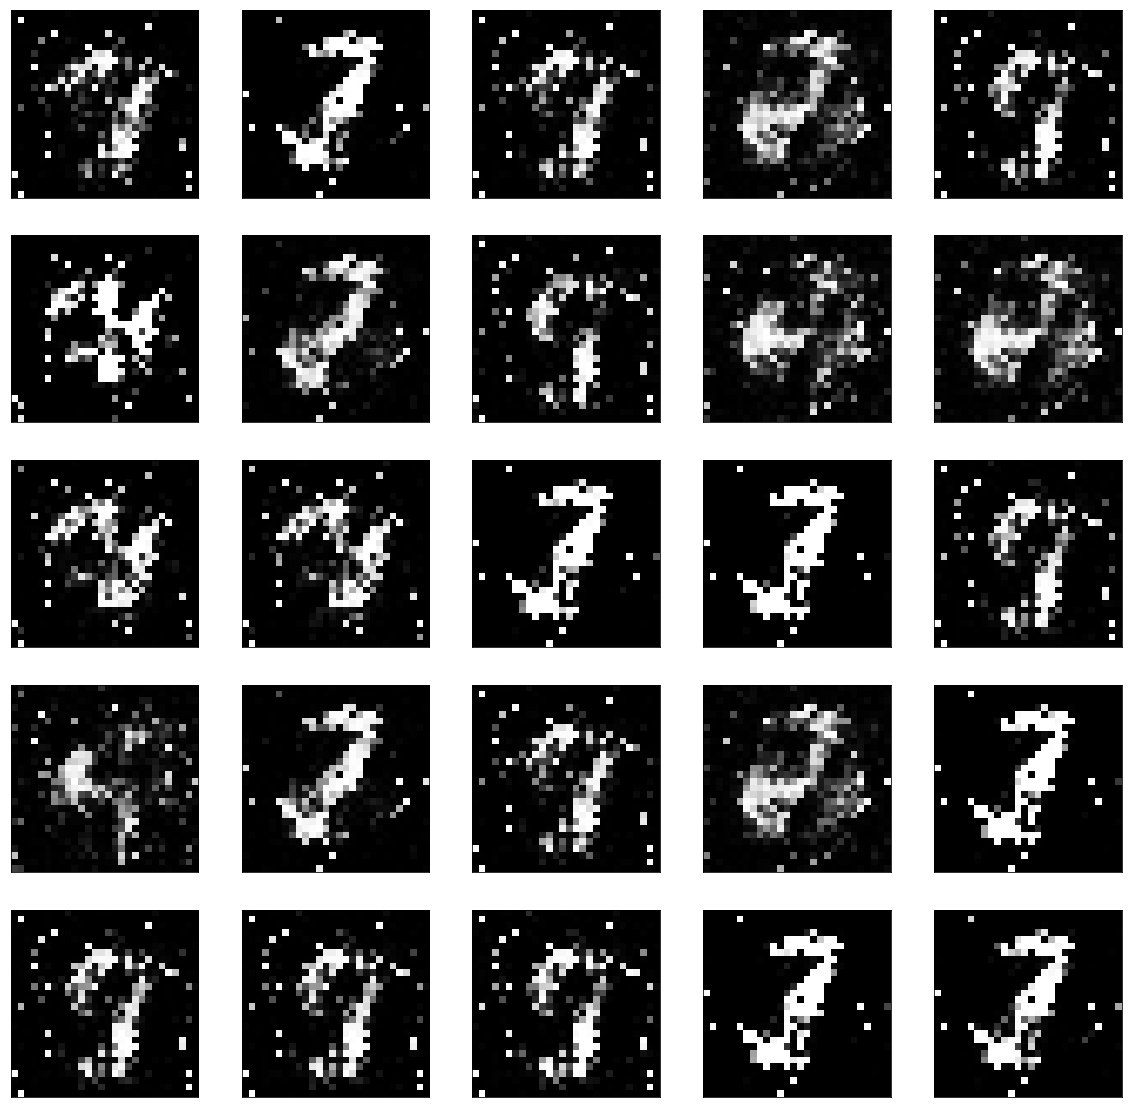

[Epoch 8/10] [Batch 497/938] [Generator loss: 3.401601] [Discriminator loss: 0.190366]
[Epoch 8/10] [Batch 498/938] [Generator loss: 1.871339] [Discriminator loss: 0.192009]
[Epoch 8/10] [Batch 499/938] [Generator loss: 1.808051] [Discriminator loss: 0.214110]
[Epoch 8/10] [Batch 500/938] [Generator loss: 2.147819] [Discriminator loss: 0.229575]
[Epoch 8/10] [Batch 501/938] [Generator loss: 1.826917] [Discriminator loss: 0.195186]
[Epoch 8/10] [Batch 502/938] [Generator loss: 2.536386] [Discriminator loss: 0.184634]
[Epoch 8/10] [Batch 503/938] [Generator loss: 1.451687] [Discriminator loss: 0.227755]
[Epoch 8/10] [Batch 504/938] [Generator loss: 3.006373] [Discriminator loss: 0.224239]
[Epoch 8/10] [Batch 505/938] [Generator loss: 1.625846] [Discriminator loss: 0.228634]
[Epoch 8/10] [Batch 506/938] [Generator loss: 2.409410] [Discriminator loss: 0.331261]
[Epoch 8/10] [Batch 507/938] [Generator loss: 0.585413] [Discriminator loss: 0.474823]
[Epoch 8/10] [Batch 508/938] [Generator los

[Epoch 8/10] [Batch 599/938] [Generator loss: 1.107952] [Discriminator loss: 0.268822]
[Epoch 8/10] [Batch 600/938] [Generator loss: 4.107063] [Discriminator loss: 0.304367]
[Epoch 8/10] [Batch 601/938] [Generator loss: 1.935596] [Discriminator loss: 0.153169]
[Epoch 8/10] [Batch 602/938] [Generator loss: 1.933140] [Discriminator loss: 0.145608]
[Epoch 8/10] [Batch 603/938] [Generator loss: 3.134846] [Discriminator loss: 0.192053]
[Epoch 8/10] [Batch 604/938] [Generator loss: 1.492671] [Discriminator loss: 0.248228]
[Epoch 8/10] [Batch 605/938] [Generator loss: 3.152845] [Discriminator loss: 0.280994]
[Epoch 8/10] [Batch 606/938] [Generator loss: 1.064666] [Discriminator loss: 0.366133]
[Epoch 8/10] [Batch 607/938] [Generator loss: 4.309042] [Discriminator loss: 0.456193]
[Epoch 8/10] [Batch 608/938] [Generator loss: 0.897164] [Discriminator loss: 0.468721]
[Epoch 8/10] [Batch 609/938] [Generator loss: 5.957955] [Discriminator loss: 0.547986]
[Epoch 8/10] [Batch 610/938] [Generator los

[Epoch 8/10] [Batch 704/938] [Generator loss: 0.935033] [Discriminator loss: 0.388303]
[Epoch 8/10] [Batch 705/938] [Generator loss: 4.103715] [Discriminator loss: 0.372394]
[Epoch 8/10] [Batch 706/938] [Generator loss: 2.028216] [Discriminator loss: 0.219660]
[Epoch 8/10] [Batch 707/938] [Generator loss: 1.307745] [Discriminator loss: 0.284606]
[Epoch 8/10] [Batch 708/938] [Generator loss: 3.090128] [Discriminator loss: 0.241082]
[Epoch 8/10] [Batch 709/938] [Generator loss: 1.785739] [Discriminator loss: 0.246369]
[Epoch 8/10] [Batch 710/938] [Generator loss: 1.139889] [Discriminator loss: 0.408679]
[Epoch 8/10] [Batch 711/938] [Generator loss: 2.813296] [Discriminator loss: 0.520085]
[Epoch 8/10] [Batch 712/938] [Generator loss: 0.382772] [Discriminator loss: 0.730711]
[Epoch 8/10] [Batch 713/938] [Generator loss: 6.098056] [Discriminator loss: 1.218897]
[Epoch 8/10] [Batch 714/938] [Generator loss: 1.236151] [Discriminator loss: 0.361897]
[Epoch 8/10] [Batch 715/938] [Generator los

[Epoch 8/10] [Batch 804/938] [Generator loss: 0.830879] [Discriminator loss: 0.338820]
[Epoch 8/10] [Batch 805/938] [Generator loss: 4.687752] [Discriminator loss: 0.543203]
[Epoch 8/10] [Batch 806/938] [Generator loss: 1.921079] [Discriminator loss: 0.221324]
[Epoch 8/10] [Batch 807/938] [Generator loss: 0.858718] [Discriminator loss: 0.329543]
[Epoch 8/10] [Batch 808/938] [Generator loss: 4.762813] [Discriminator loss: 0.402898]
[Epoch 8/10] [Batch 809/938] [Generator loss: 2.532001] [Discriminator loss: 0.173357]
[Epoch 8/10] [Batch 810/938] [Generator loss: 0.752452] [Discriminator loss: 0.351902]
[Epoch 8/10] [Batch 811/938] [Generator loss: 4.825900] [Discriminator loss: 0.441663]
[Epoch 8/10] [Batch 812/938] [Generator loss: 2.546191] [Discriminator loss: 0.167815]
[Epoch 8/10] [Batch 813/938] [Generator loss: 1.055608] [Discriminator loss: 0.265978]
[Epoch 8/10] [Batch 814/938] [Generator loss: 3.745539] [Discriminator loss: 0.247585]
[Epoch 8/10] [Batch 815/938] [Generator los

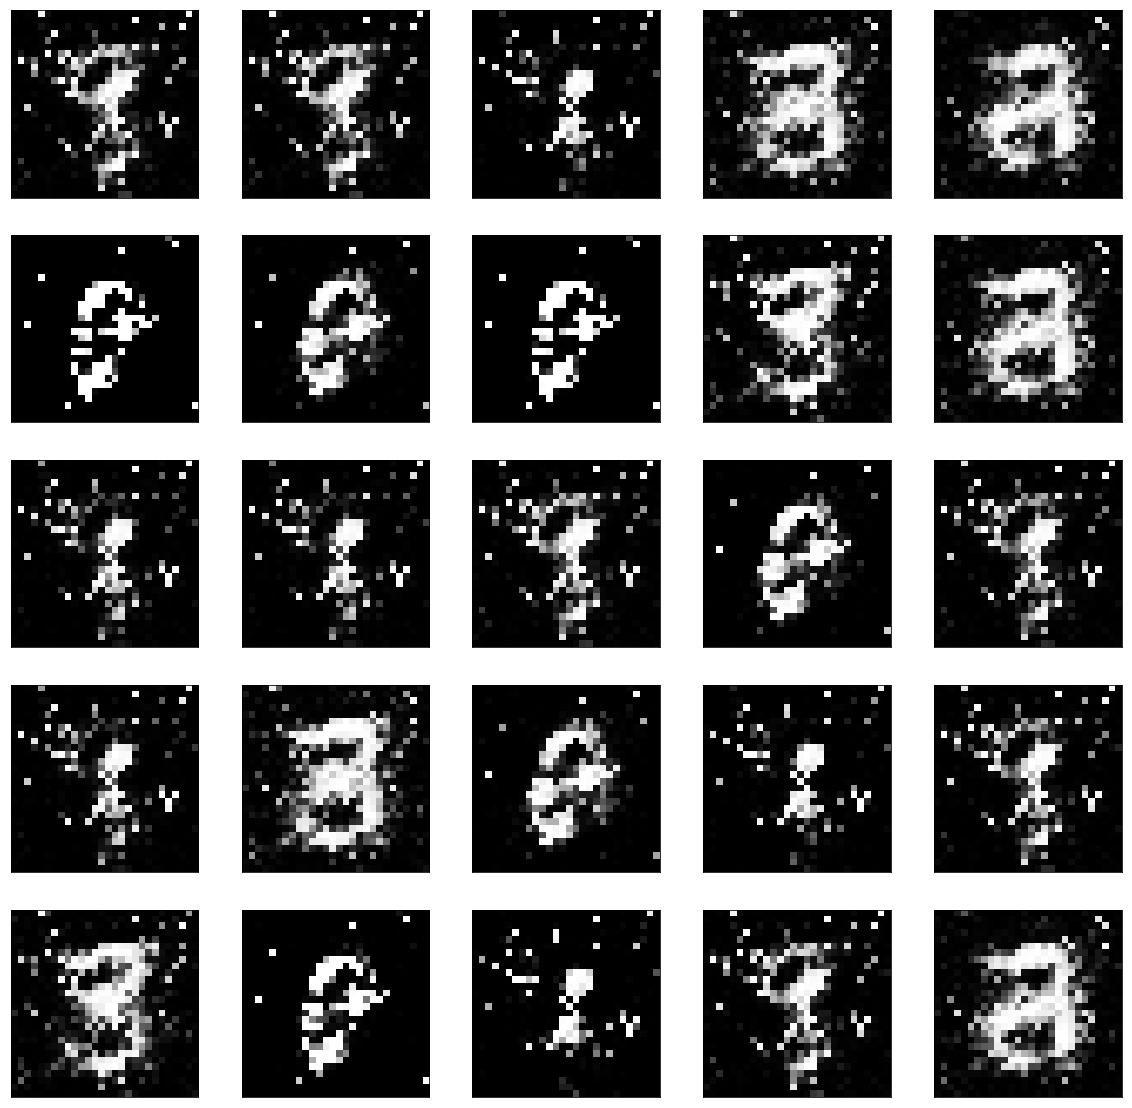

[Epoch 8/10] [Batch 897/938] [Generator loss: 1.593639] [Discriminator loss: 0.268557]
[Epoch 8/10] [Batch 898/938] [Generator loss: 2.087812] [Discriminator loss: 0.309868]
[Epoch 8/10] [Batch 899/938] [Generator loss: 0.775413] [Discriminator loss: 0.432217]
[Epoch 8/10] [Batch 900/938] [Generator loss: 5.142641] [Discriminator loss: 0.689657]
[Epoch 8/10] [Batch 901/938] [Generator loss: 0.642590] [Discriminator loss: 0.444151]
[Epoch 8/10] [Batch 902/938] [Generator loss: 4.215327] [Discriminator loss: 0.257681]
[Epoch 8/10] [Batch 903/938] [Generator loss: 2.789109] [Discriminator loss: 0.248617]
[Epoch 8/10] [Batch 904/938] [Generator loss: 0.500214] [Discriminator loss: 0.545595]
[Epoch 8/10] [Batch 905/938] [Generator loss: 6.582072] [Discriminator loss: 0.948379]
[Epoch 8/10] [Batch 906/938] [Generator loss: 1.500484] [Discriminator loss: 0.180901]
[Epoch 8/10] [Batch 907/938] [Generator loss: 2.039263] [Discriminator loss: 0.149030]
[Epoch 8/10] [Batch 908/938] [Generator los

[Epoch 9/10] [Batch 63/938] [Generator loss: 2.575054] [Discriminator loss: 0.147458]
[Epoch 9/10] [Batch 64/938] [Generator loss: 1.998529] [Discriminator loss: 0.135476]
[Epoch 9/10] [Batch 65/938] [Generator loss: 2.873872] [Discriminator loss: 0.104209]
[Epoch 9/10] [Batch 66/938] [Generator loss: 2.527369] [Discriminator loss: 0.151983]
[Epoch 9/10] [Batch 67/938] [Generator loss: 1.811916] [Discriminator loss: 0.166905]
[Epoch 9/10] [Batch 68/938] [Generator loss: 2.869828] [Discriminator loss: 0.243563]
[Epoch 9/10] [Batch 69/938] [Generator loss: 1.263550] [Discriminator loss: 0.237290]
[Epoch 9/10] [Batch 70/938] [Generator loss: 4.023311] [Discriminator loss: 0.188055]
[Epoch 9/10] [Batch 71/938] [Generator loss: 2.929537] [Discriminator loss: 0.095197]
[Epoch 9/10] [Batch 72/938] [Generator loss: 1.784477] [Discriminator loss: 0.147545]
[Epoch 9/10] [Batch 73/938] [Generator loss: 3.019444] [Discriminator loss: 0.146966]
[Epoch 9/10] [Batch 74/938] [Generator loss: 2.201459]

[Epoch 9/10] [Batch 167/938] [Generator loss: 2.578444] [Discriminator loss: 0.127044]
[Epoch 9/10] [Batch 168/938] [Generator loss: 2.131465] [Discriminator loss: 0.142708]
[Epoch 9/10] [Batch 169/938] [Generator loss: 2.256806] [Discriminator loss: 0.134654]
[Epoch 9/10] [Batch 170/938] [Generator loss: 2.624692] [Discriminator loss: 0.155329]
[Epoch 9/10] [Batch 171/938] [Generator loss: 1.947477] [Discriminator loss: 0.157361]
[Epoch 9/10] [Batch 172/938] [Generator loss: 2.688819] [Discriminator loss: 0.177150]
[Epoch 9/10] [Batch 173/938] [Generator loss: 1.658091] [Discriminator loss: 0.160132]
[Epoch 9/10] [Batch 174/938] [Generator loss: 3.732613] [Discriminator loss: 0.163619]
[Epoch 9/10] [Batch 175/938] [Generator loss: 1.984748] [Discriminator loss: 0.123062]
[Epoch 9/10] [Batch 176/938] [Generator loss: 2.236684] [Discriminator loss: 0.118772]
[Epoch 9/10] [Batch 177/938] [Generator loss: 2.874337] [Discriminator loss: 0.149210]
[Epoch 9/10] [Batch 178/938] [Generator los

[Epoch 9/10] [Batch 265/938] [Generator loss: 1.218611] [Discriminator loss: 0.273729]
[Epoch 9/10] [Batch 266/938] [Generator loss: 4.004038] [Discriminator loss: 0.193391]
[Epoch 9/10] [Batch 267/938] [Generator loss: 2.491889] [Discriminator loss: 0.198245]
[Epoch 9/10] [Batch 268/938] [Generator loss: 1.550698] [Discriminator loss: 0.189193]
[Epoch 9/10] [Batch 269/938] [Generator loss: 3.185474] [Discriminator loss: 0.220436]
[Epoch 9/10] [Batch 270/938] [Generator loss: 1.641458] [Discriminator loss: 0.210122]
[Epoch 9/10] [Batch 271/938] [Generator loss: 2.273385] [Discriminator loss: 0.118502]
[Epoch 9/10] [Batch 272/938] [Generator loss: 3.211410] [Discriminator loss: 0.259016]
[Epoch 9/10] [Batch 273/938] [Generator loss: 0.611705] [Discriminator loss: 0.472243]
[Epoch 9/10] [Batch 274/938] [Generator loss: 6.794645] [Discriminator loss: 0.864085]
[Epoch 9/10] [Batch 275/938] [Generator loss: 1.226874] [Discriminator loss: 0.311307]
[Epoch 9/10] [Batch 276/938] [Generator los

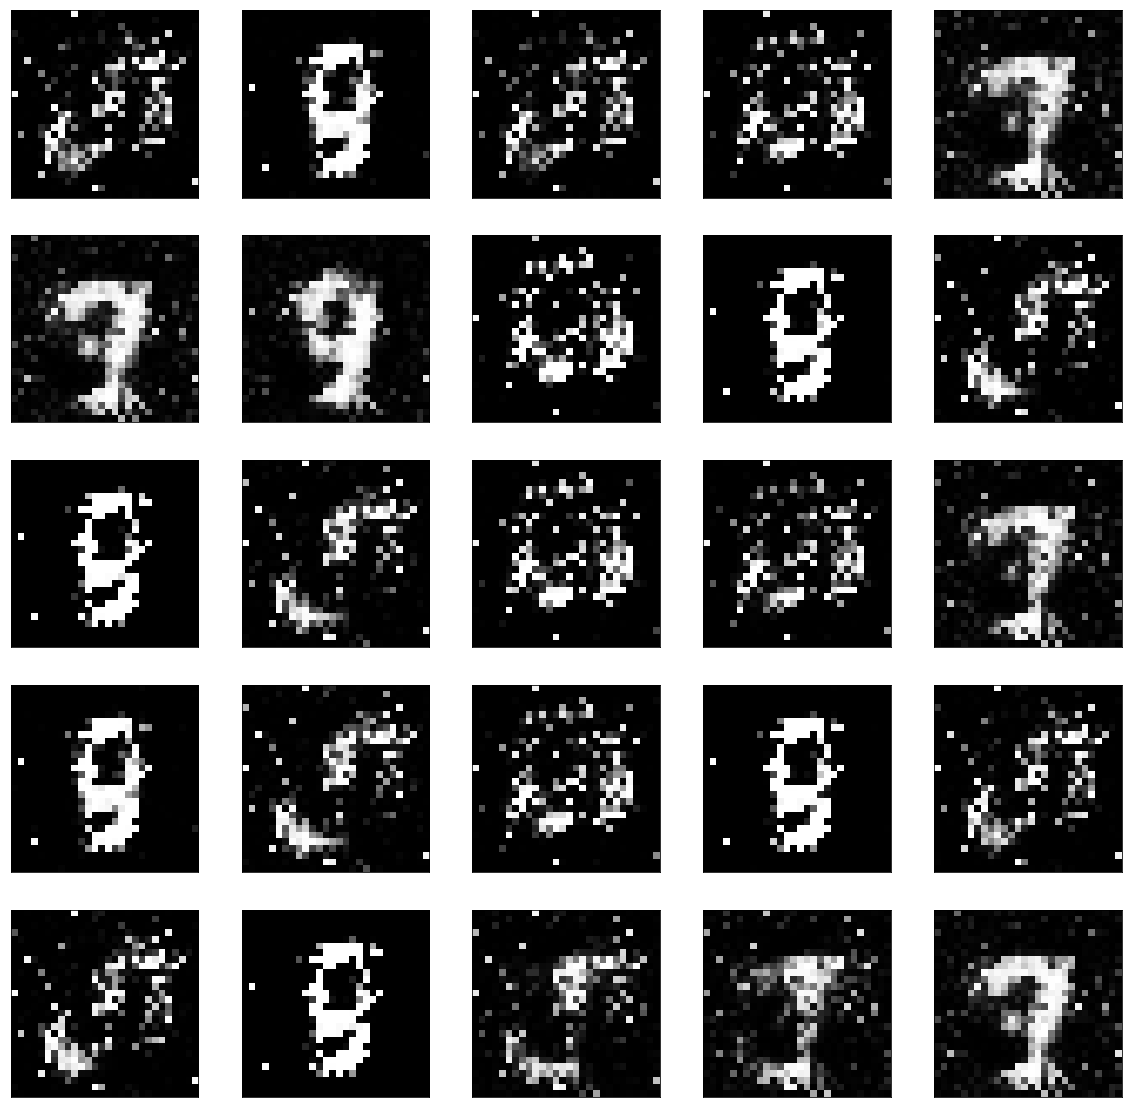

[Epoch 9/10] [Batch 359/938] [Generator loss: 3.331638] [Discriminator loss: 0.100486]
[Epoch 9/10] [Batch 360/938] [Generator loss: 1.709013] [Discriminator loss: 0.185938]
[Epoch 9/10] [Batch 361/938] [Generator loss: 2.529336] [Discriminator loss: 0.180556]
[Epoch 9/10] [Batch 362/938] [Generator loss: 2.406153] [Discriminator loss: 0.168213]
[Epoch 9/10] [Batch 363/938] [Generator loss: 2.466111] [Discriminator loss: 0.261587]
[Epoch 9/10] [Batch 364/938] [Generator loss: 1.087091] [Discriminator loss: 0.353314]
[Epoch 9/10] [Batch 365/938] [Generator loss: 4.251583] [Discriminator loss: 0.330630]
[Epoch 9/10] [Batch 366/938] [Generator loss: 1.407555] [Discriminator loss: 0.208698]
[Epoch 9/10] [Batch 367/938] [Generator loss: 3.100262] [Discriminator loss: 0.105678]
[Epoch 9/10] [Batch 368/938] [Generator loss: 2.638068] [Discriminator loss: 0.145016]
[Epoch 9/10] [Batch 369/938] [Generator loss: 1.773742] [Discriminator loss: 0.165239]
[Epoch 9/10] [Batch 370/938] [Generator los

[Epoch 9/10] [Batch 454/938] [Generator loss: 1.627004] [Discriminator loss: 0.251539]
[Epoch 9/10] [Batch 455/938] [Generator loss: 2.082542] [Discriminator loss: 0.280243]
[Epoch 9/10] [Batch 456/938] [Generator loss: 1.467564] [Discriminator loss: 0.242725]
[Epoch 9/10] [Batch 457/938] [Generator loss: 2.250340] [Discriminator loss: 0.192076]
[Epoch 9/10] [Batch 458/938] [Generator loss: 2.035575] [Discriminator loss: 0.237919]
[Epoch 9/10] [Batch 459/938] [Generator loss: 1.605021] [Discriminator loss: 0.246457]
[Epoch 9/10] [Batch 460/938] [Generator loss: 1.833139] [Discriminator loss: 0.227945]
[Epoch 9/10] [Batch 461/938] [Generator loss: 1.976723] [Discriminator loss: 0.174441]
[Epoch 9/10] [Batch 462/938] [Generator loss: 2.077757] [Discriminator loss: 0.231215]
[Epoch 9/10] [Batch 463/938] [Generator loss: 1.649164] [Discriminator loss: 0.173864]
[Epoch 9/10] [Batch 464/938] [Generator loss: 2.580537] [Discriminator loss: 0.187988]
[Epoch 9/10] [Batch 465/938] [Generator los

[Epoch 9/10] [Batch 556/938] [Generator loss: 0.593688] [Discriminator loss: 0.496997]
[Epoch 9/10] [Batch 557/938] [Generator loss: 7.295817] [Discriminator loss: 0.837571]
[Epoch 9/10] [Batch 558/938] [Generator loss: 2.062813] [Discriminator loss: 0.185348]
[Epoch 9/10] [Batch 559/938] [Generator loss: 0.813833] [Discriminator loss: 0.352167]
[Epoch 9/10] [Batch 560/938] [Generator loss: 6.466703] [Discriminator loss: 0.544239]
[Epoch 9/10] [Batch 561/938] [Generator loss: 3.219290] [Discriminator loss: 0.097617]
[Epoch 9/10] [Batch 562/938] [Generator loss: 1.077833] [Discriminator loss: 0.256071]
[Epoch 9/10] [Batch 563/938] [Generator loss: 4.562191] [Discriminator loss: 0.140764]
[Epoch 9/10] [Batch 564/938] [Generator loss: 4.025516] [Discriminator loss: 0.165084]
[Epoch 9/10] [Batch 565/938] [Generator loss: 1.641010] [Discriminator loss: 0.174227]
[Epoch 9/10] [Batch 566/938] [Generator loss: 3.304626] [Discriminator loss: 0.295259]
[Epoch 9/10] [Batch 567/938] [Generator los

[Epoch 9/10] [Batch 651/938] [Generator loss: 2.486840] [Discriminator loss: 0.095480]
[Epoch 9/10] [Batch 652/938] [Generator loss: 2.480247] [Discriminator loss: 0.165234]
[Epoch 9/10] [Batch 653/938] [Generator loss: 1.641397] [Discriminator loss: 0.194042]
[Epoch 9/10] [Batch 654/938] [Generator loss: 2.628416] [Discriminator loss: 0.221613]
[Epoch 9/10] [Batch 655/938] [Generator loss: 1.494135] [Discriminator loss: 0.253421]
[Epoch 9/10] [Batch 656/938] [Generator loss: 2.221063] [Discriminator loss: 0.216182]
[Epoch 9/10] [Batch 657/938] [Generator loss: 2.257826] [Discriminator loss: 0.291259]
[Epoch 9/10] [Batch 658/938] [Generator loss: 0.766430] [Discriminator loss: 0.422089]
[Epoch 9/10] [Batch 659/938] [Generator loss: 5.772074] [Discriminator loss: 0.760125]
[Epoch 9/10] [Batch 660/938] [Generator loss: 0.853047] [Discriminator loss: 0.406775]
[Epoch 9/10] [Batch 661/938] [Generator loss: 3.903322] [Discriminator loss: 0.301384]
[Epoch 9/10] [Batch 662/938] [Generator los

[Epoch 9/10] [Batch 751/938] [Generator loss: 1.838140] [Discriminator loss: 0.157988]
[Epoch 9/10] [Batch 752/938] [Generator loss: 2.831688] [Discriminator loss: 0.183306]
[Epoch 9/10] [Batch 753/938] [Generator loss: 1.914628] [Discriminator loss: 0.177473]
[Epoch 9/10] [Batch 754/938] [Generator loss: 2.629269] [Discriminator loss: 0.175548]
[Epoch 9/10] [Batch 755/938] [Generator loss: 1.876373] [Discriminator loss: 0.186963]
[Epoch 9/10] [Batch 756/938] [Generator loss: 2.852991] [Discriminator loss: 0.199853]
[Epoch 9/10] [Batch 757/938] [Generator loss: 1.815000] [Discriminator loss: 0.201203]
[Epoch 9/10] [Batch 758/938] [Generator loss: 2.403482] [Discriminator loss: 0.206676]


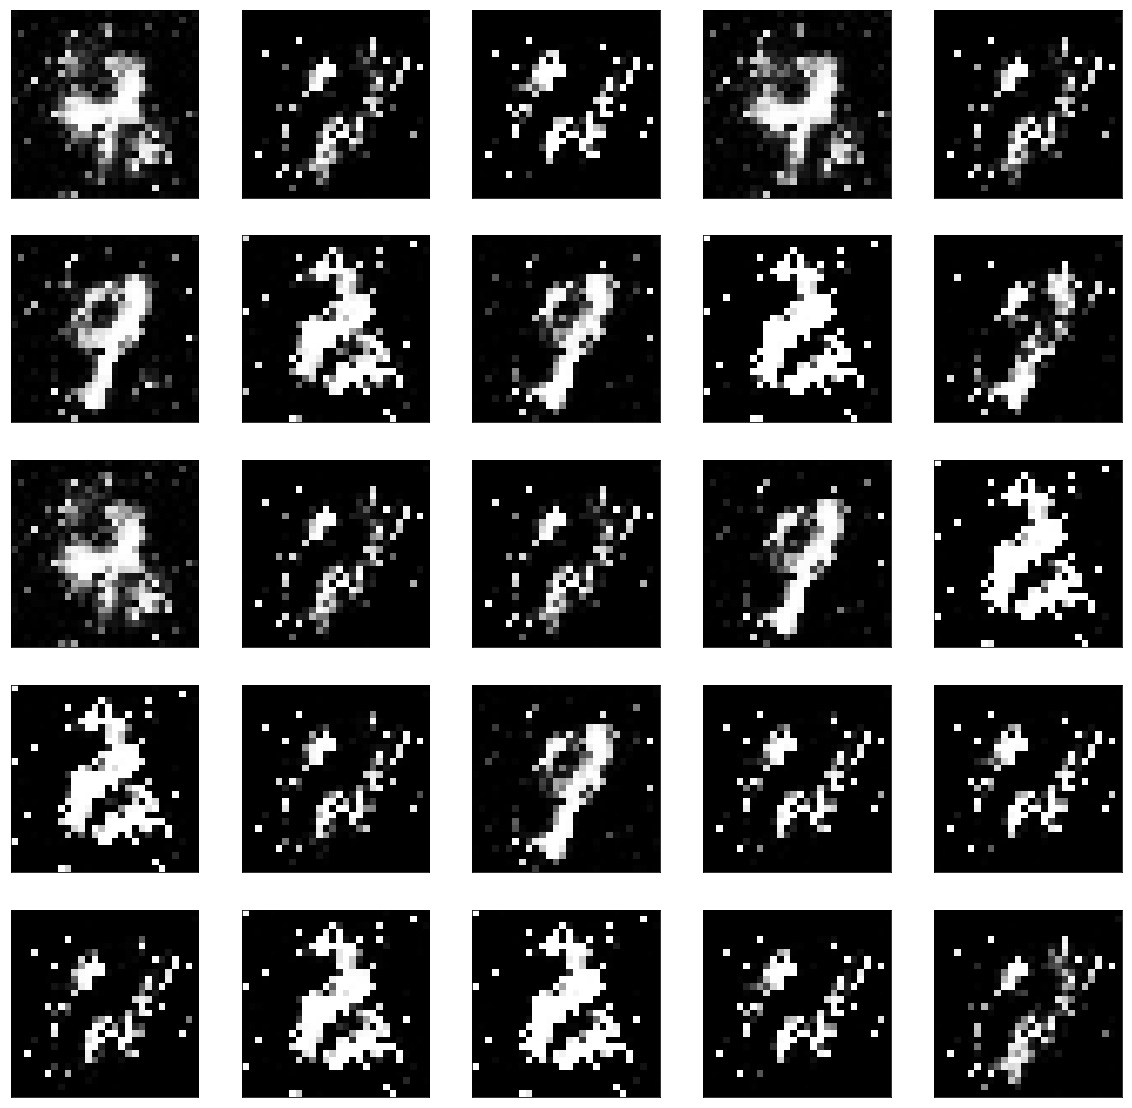

[Epoch 9/10] [Batch 759/938] [Generator loss: 1.811869] [Discriminator loss: 0.260828]
[Epoch 9/10] [Batch 760/938] [Generator loss: 1.707391] [Discriminator loss: 0.250521]
[Epoch 9/10] [Batch 761/938] [Generator loss: 2.649981] [Discriminator loss: 0.198858]
[Epoch 9/10] [Batch 762/938] [Generator loss: 2.011037] [Discriminator loss: 0.161757]
[Epoch 9/10] [Batch 763/938] [Generator loss: 2.396885] [Discriminator loss: 0.258183]
[Epoch 9/10] [Batch 764/938] [Generator loss: 1.609679] [Discriminator loss: 0.201591]
[Epoch 9/10] [Batch 765/938] [Generator loss: 3.648061] [Discriminator loss: 0.236858]
[Epoch 9/10] [Batch 766/938] [Generator loss: 1.207515] [Discriminator loss: 0.283800]
[Epoch 9/10] [Batch 767/938] [Generator loss: 4.535690] [Discriminator loss: 0.345665]
[Epoch 9/10] [Batch 768/938] [Generator loss: 1.858391] [Discriminator loss: 0.286350]
[Epoch 9/10] [Batch 769/938] [Generator loss: 1.712018] [Discriminator loss: 0.219074]
[Epoch 9/10] [Batch 770/938] [Generator los

[Epoch 9/10] [Batch 867/938] [Generator loss: 2.406335] [Discriminator loss: 0.234759]
[Epoch 9/10] [Batch 868/938] [Generator loss: 2.110255] [Discriminator loss: 0.289091]
[Epoch 9/10] [Batch 869/938] [Generator loss: 1.554147] [Discriminator loss: 0.210623]
[Epoch 9/10] [Batch 870/938] [Generator loss: 3.639394] [Discriminator loss: 0.502987]
[Epoch 9/10] [Batch 871/938] [Generator loss: 0.475272] [Discriminator loss: 0.575056]
[Epoch 9/10] [Batch 872/938] [Generator loss: 7.203245] [Discriminator loss: 0.794135]
[Epoch 9/10] [Batch 873/938] [Generator loss: 3.156641] [Discriminator loss: 0.126926]
[Epoch 9/10] [Batch 874/938] [Generator loss: 0.833678] [Discriminator loss: 0.464581]
[Epoch 9/10] [Batch 875/938] [Generator loss: 5.599267] [Discriminator loss: 0.308468]
[Epoch 9/10] [Batch 876/938] [Generator loss: 4.263920] [Discriminator loss: 0.115209]
[Epoch 9/10] [Batch 877/938] [Generator loss: 2.137591] [Discriminator loss: 0.137629]
[Epoch 9/10] [Batch 878/938] [Generator los

In [18]:
g_loss_to_display = []
d_loss_to_display = []

for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(data_loader):
        
        # adversarial ground truths
        valid = Variable(Tensor(imgs.size(0), 1).fill_(1.0), requires_grad=False)
        fake = Variable(Tensor(imgs.size(0), 1).fill_(0.0), requires_grad=False)
        
        # configure input
        real_imgs = Variable(imgs.type(Tensor))
        
        # ----------------
        # Train Generator
        # ----------------
        optimizer_G.zero_grad()
        
        # sample noise as generator input
        z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], latent_dim))))
        
        # generate a batch of images
        gen_imgs = generator(z)
        
        # loss measures the generator's ability to fool the discriminator
        g_loss = adversarial_loss(discriminator(gen_imgs), valid)
        g_loss.backward()
        
        optimizer_G.step()
        
        # -------------------
        # Train Discriminator
        # -------------------
        
        optimizer_D.zero_grad()
        
        # measure the discriminator's ability to classify real from generated samples
        real_loss = adversarial_loss(discriminator(real_imgs), valid)
        fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        
        optimizer_D.step()
        
        print(
            "[Epoch %d/%d] [Batch %d/%d] [Generator loss: %f] [Discriminator loss: %f]"
            % (epoch, n_epochs, i, len(data_loader), g_loss.item(), d_loss.item())
        )
        
        # save losses for plotting later
        g_loss_to_display.append(g_loss.item())
        d_loss_to_display.append(d_loss.item())
        
        batches_done = epoch * len(data_loader) + i
        
        if batches_done % sample_interval == 0:
            gen_imgs_to_display = np.transpose(gen_imgs[:25].cpu().detach(), (0, 2, 3, 1))
            
            # display 25 generated images in one batch and save it
            imshow(gen_imgs_to_display)
            save_image(gen_imgs.data[:25], "images/gan/%d.png" % batches_done, nrow=5, normalize=True)

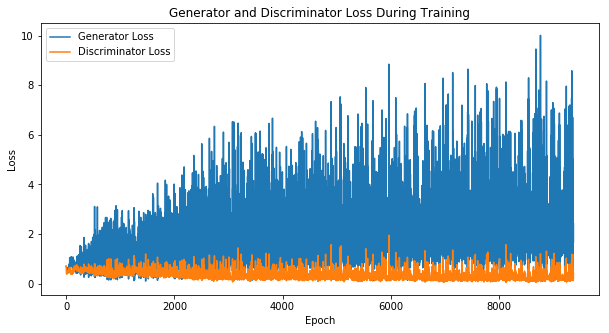

In [19]:
# plot g_loss and d_loss
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(g_loss_to_display, label='Generator Loss')
plt.plot(d_loss_to_display, label='Discriminator Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('./images/gan/final_loss.png')
plt.show()

## Final GAN Images

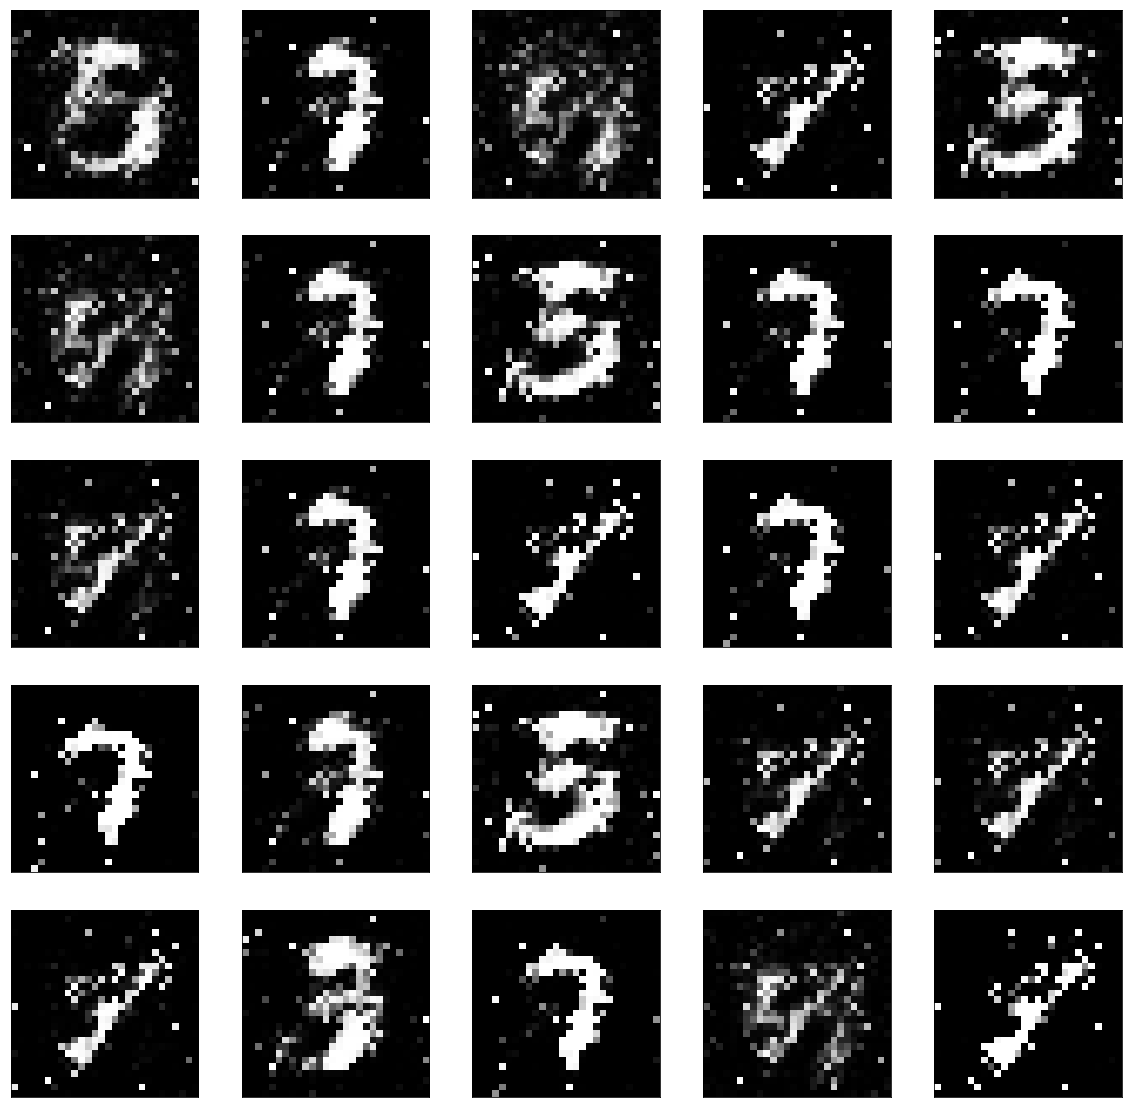

In [20]:
# obtain one batch of test images
dataiter = iter(data_loader)
imgs, _ = dataiter.next()

# sample noise as generator input
z = Variable(Tensor(np.random.normal(0, 1, (imgs.shape[0], latent_dim))))

# generate a batch of images
gen_imgs = generator(z)
gen_imgs_to_display = np.transpose(gen_imgs[:25].cpu().detach(), (0, 2, 3, 1))

# show and save these final images
imshow(gen_imgs_to_display)

<hr/>